<a href="https://colab.research.google.com/github/serggget-coder/-Automatic-leaf-infection-identifier111/blob/main/Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

def visualize_coordinates_colab(image_path, square_size=None):
    """
    Визуализация координат для Google Colab
    """
    # Загружаем изображение
    img = cv2.imread("/content/drive/MyDrive/2025_08_26_143822_00.JPG")
    if img is None:
        print("Не удалось загрузить изображение")
        return

    height, width = img.shape[:2]
    print(f" Размер изображения: {width}x{height} пикселей")

    # Определяем размер квадрата
    if square_size is None:
        square_size = min(width, height)
    else:
        square_size = min(square_size, width, height)

    print(f" Размер квадрата: {square_size}x{square_size} пикселей")

    # Вычисляем координаты центра
    start_x = (width - square_size) // 2
    start_y = (height - square_size) // 2
    end_x = start_x + square_size
    end_y = start_y + square_size

    print(f" Координаты квадрата:")
    print(f"   Левый верхний угол: ({start_x}, {start_y})")
    print(f"   Правый нижний угол: ({end_x}, {end_y})")
    print(f"   Ширина области: {end_x - start_x} пикселей")
    print(f"   Высота области: {end_y - start_y} пикселей")

    # Создаем копию для рисования
    img_with_rect = img.copy()

    # Рисуем прямоугольник
    cv2.rectangle(img_with_rect, (start_x, start_y), (end_x, end_y), (0, 255, 0), 3)

    # Добавляем текст с координатами
    cv2.putText(img_with_rect, f"START: ({start_x}, {start_y})",
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(img_with_rect, f"END: ({end_x}, {end_y})",
                (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(img_with_rect, f"SIZE: {square_size}x{square_size}",
                (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Показываем изображение в Colab
    print("\n Визуализация области вырезки:")
    cv2_imshow(img_with_rect)

    # Также показываем оригинал для сравнения
    print("\n Оригинальное изображение:")
    cv2_imshow(img)

    return start_x, start_y, end_x, end_y

# Использование
# Сначала загрузите файл в Colab
from google.colab import files
uploaded = files.upload()

# Получите имя загруженного файла
uploaded_filename = list(uploaded.keys())[0]
print(f"Загружен файл: {uploaded_filename}")

# Визуализируем координаты
coords = visualize_coordinates_colab(uploaded_filename, 500)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def interactive_coordinate_selector(image_path):
    """
    Интерактивный выбор координат с помощью matplotlib
    """
    # Загружаем изображение
    pil_img = Image.open(image_path)
    width, height = pil_img.size

    # Создаем фигуру
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(pil_img)

    # Добавляем сетку
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, width, 100))
    ax.set_yticks(range(0, height, 100))

    # Включаем minor ticks для более детальной сетки
    ax.set_xticks(range(0, width, 20), minor=True)
    ax.set_yticks(range(0, height, 20), minor=True)

    # Добавляем прямоугольник для вырезки
    square_size = min(width, height) // 14
    start_x = 8000
    start_y = 2500

    rect = patches.Rectangle((start_x, start_y), square_size, square_size,
                           linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Добавляем аннотации с координатами
    ax.annotate(f'({start_x}, {start_y})', (start_x, start_y),
               xytext=(10, -10), textcoords='offset points', color='red', fontsize=12)
    ax.annotate(f'({start_x+square_size}, {start_y+square_size})',
               (start_x+square_size, start_y+square_size),
               xytext=(-10, 10), textcoords='offset points', color='red', fontsize=12)

    # Добавляем координаты по углам
    ax.text(10, 10, f'(0,0)', color='green', fontsize=12,
           bbox=dict(facecolor='white', alpha=0.7))
    ax.text(width-100, 10, f'({width},0)', color='green', fontsize=12,
           bbox=dict(facecolor='white', alpha=0.7))
    ax.text(10, height-30, f'(0,{height})', color='green', fontsize=12,
           bbox=dict(facecolor='white', alpha=0.7))
    ax.text(width-150, height-30, f'({width},{height})', color='green', fontsize=12,
           bbox=dict(facecolor='white', alpha=0.7))

    plt.title('🎯 ВЫБЕРИТЕ ОБЛАСТЬ ДЛЯ ВЫРЕЗКИ\nКрасный прямоугольник - предлагаемая область', fontsize=14)
    plt.xlabel('X координата (пиксели)', fontsize=12)
    plt.ylabel('Y координата (пиксели)', fontsize=12)

    # Показываем координаты при наведении
    def on_mouse_move(event):
        if event.inaxes:
            print(f"\rКоординаты мыши: X={int(event.xdata)}, Y={int(event.ydata)}", end='')

    fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

    plt.tight_layout()
    plt.show()

    print(f"\n📐 Размер изображения: {width}x{height}")
    print(f"📍 Предлагаемые координаты:")
    print(f"   Начало: ({start_x}, {start_y})")
    print(f"   Размер: {square_size}x{square_size}")
    print(f"   Конец: ({start_x+square_size}, {start_y+square_size})")
    print("\n💡 Подведите курсор к нужной области чтобы увидеть координаты")

    return start_x, start_y, square_size

# Использование
start_x, start_y, square_size = interactive_coordinate_selector(image_filename)

NameError: name 'image_filename' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 Запуск обработки изображений с Google Диска
📁 Входная папка: /content/drive/MyDrive/Yablon27082025Vinograd-20250909T114626Z-1-002/Yablon27082025Vinograd
📁 Выходная папка 1: /content/drive/MyDrive/good_vinograd
📁 Выходная папка 2: /content/drive/MyDrive/good_vinograd
📊 Найдено изображений: 945

🔍 Превью вырезов:
👀 Превью вырезов на примере первого изображения:
   🔴 КРАСНЫЙ - bad_vinograd (плохой виноград)
   🟢 ЗЕЛЕНЫЙ - good_vinograd (хороший виноград)


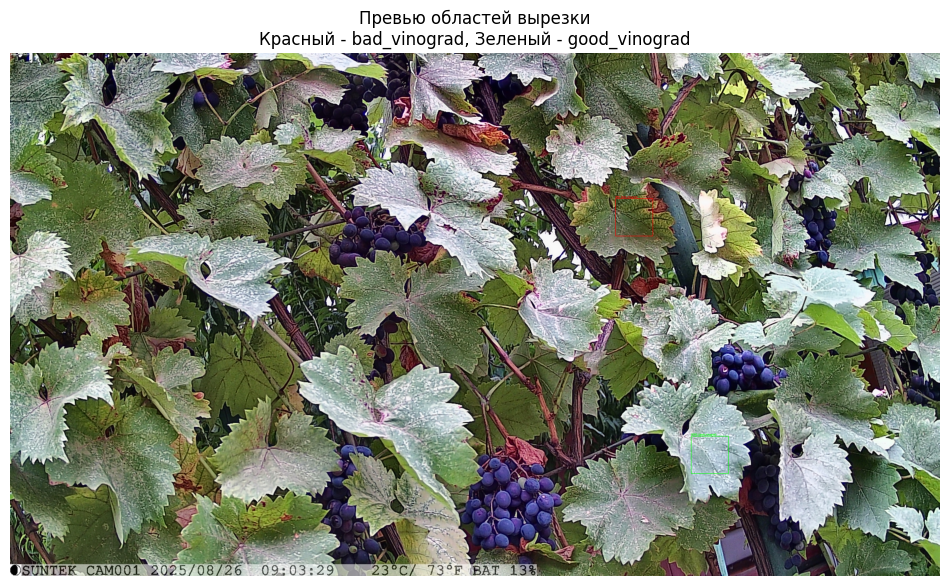

KeyboardInterrupt: Interrupted by user

In [ ]:
import cv2
import os
import glob
import shutil
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

class GoogleDriveDualCropper:
    def __init__(self):
        # ⭐⭐⭐ ВАШИ ПУТИ ⭐⭐⭐
        self.input_folder = "/content/drive/MyDrive/Yablon27082025Vinograd-20250909T114626Z-1-002/Yablon27082025Vinograd"
        self.output_folder1 = "/content/drive/MyDrive/bad_vinograd"
        self.output_folder2 = "/content/drive/MyDrive/good_vinograd"

        self.setup_folders()
        self.check_input_folder()

    def setup_folders(self):
        """Создает выходные папки если их нет"""
        os.makedirs(self.output_folder1, exist_ok=True)
        os.makedirs(self.output_folder2, exist_ok=True)
        print(f"📁 Входная папка: {self.input_folder}")
        print(f"📁 Выходная папка 1: {self.output_folder2}")
        print(f"📁 Выходная папка 2: {self.output_folder2}")

    def check_input_folder(self):
        """Проверяет существование входной папки"""
        if not os.path.exists(self.input_folder):
            print(f"❌ ОШИБКА: Папка {self.input_folder} не существует!")
            print("Проверьте путь и перезапустите скрипт")
            return False
        return True

    def get_image_count(self):
        """Считает количество изображений"""
        images = self.find_images()
        return len(images)

    def find_images(self):
        """Находит все изображения в папке"""
        extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff', '*.webp']
        all_images = []

        for ext in extensions:
            pattern = os.path.join(self.input_folder, ext)
            all_images.extend(glob.glob(pattern))
            # Для case insensitive
            pattern_upper = os.path.join(self.input_folder, ext.upper())
            all_images.extend(glob.glob(pattern_upper))

        return all_images

    def crop_single_image(self, image_path, output_path, start_x, start_y, square_size):
        """Вырезает один квадрат из изображения"""
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Не удалось загрузить: {os.path.basename(image_path)}")
            return False

        height, width = img.shape[:2]

        # Проверяем, чтобы координаты не выходили за границы
        start_x = max(0, min(start_x, width - 10))
        start_y = max(0, min(start_y, height - 10))
        square_size = min(square_size, width - start_x, height - start_y)

        # Вырезаем квадрат
        cropped = img[start_y:start_y+square_size, start_x:start_x+square_size]

        # Сохраняем
        cv2.imwrite(output_path, cropped)
        return True

    def process_all_images(self, crop1_coords, crop2_coords):
        """
        Обрабатывает все изображения двумя разными вырезами
        crop1_coords: (start_x, start_y, square_size) для первого выреза
        crop2_coords: (start_x, start_y, square_size) для второго выреза
        """
        # Распаковываем координаты
        start_x1, start_y1, size1 = crop1_coords
        start_x2, start_y2, size2 = crop2_coords

        print("🎯 Настройки вырезов:")
        print(f"   ВЫРЕЗ 1 (bad_vinograd): start_x={start_x1}, start_y={start_y1}, size={size1}")
        print(f"   ВЫРЕЗ 2 (good_vinograd): start_x={start_x2}, start_y={start_y2}, size={size2}")
        print()

        # Ищем все изображения
        images = self.find_images()

        if not images:
            print("❌ Изображения не найдены!")
            print("Проверьте пути и форматы файлов (jpg, png, jpeg, bmp, tiff, webp)")
            return

        print(f"🔍 Найдено {len(images)} изображений")

        success_count = 0
        for i, image_path in enumerate(images, 1):
            filename = os.path.basename(image_path)
            name, ext = os.path.splitext(filename)

            # Формируем пути для выходных файлов
            output_path1 = os.path.join(self.output_folder1, f"{name}_bad.jpg")
            output_path2 = os.path.join(self.output_folder2, f"{name}_good.jpg")

            print(f"[{i}/{len(images)}] Обработка: {filename}")

            # Первый вырез (bad_vinograd)
            success1 = self.crop_single_image(image_path, output_path1, start_x1, start_y1, size1)
            # Второй вырез (good_vinograd)
            success2 = self.crop_single_image(image_path, output_path2, start_x2, start_y2, size2)

            if success1 and success2:
                success_count += 1
                print(f"   ✅ Созданы: {os.path.basename(output_path1)} и {os.path.basename(output_path2)}")
            else:
                print(f"   ❌ Ошибка при обработке")

        print(f"\n🎉 Обработка завершена!")
        print(f"✅ Успешно обработано: {success_count}/{len(images)} изображений")
        print(f"📁 Результаты сохранены в:")
        print(f"   • {self.output_folder1}")
        print(f"   • {self.output_folder2}")

    def preview_on_example(self, crop1_coords, crop2_coords):
        """Показывает превью вырезов на примере первого изображения"""
        images = self.find_images()
        if not images:
            print("❌ Нет изображений для превью")
            return

        example_image = images[0]
        img = cv2.imread(example_image)

        if img is None:
            print("❌ Не удалось загрузить изображение для превью")
            return

        # Распаковываем координаты
        start_x1, start_y1, size1 = crop1_coords
        start_x2, start_y2, size2 = crop2_coords

        # Создаем визуализацию
        img_viz = img.copy()
        height, width = img_viz.shape[:2]

        # Рисуем первый вырез (красный - bad)
        cv2.rectangle(img_viz, (start_x1, start_y1),
                     (start_x1 + size1, start_y1 + size1),
                     (0, 0, 255), 4)  # Красный
        cv2.putText(img_viz, "BAD (bad_vinograd)", (start_x1, start_y1 - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Рисуем второй вырез (зеленый - good)
        cv2.rectangle(img_viz, (start_x2, start_y2),
                     (start_x2 + size2, start_y2 + size2),
                     (0, 255, 0), 4)  # Зеленый
        cv2.putText(img_viz, "GOOD (good_vinograd)", (start_x2, start_y2 - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Добавляем информацию о размерах
        cv2.putText(img_viz, f"Image: {width}x{height}", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        print("👀 Превью вырезов на примере первого изображения:")
        print("   🔴 КРАСНЫЙ - bad_vinograd (плохой виноград)")
        print("   🟢 ЗЕЛЕНЫЙ - good_vinograd (хороший виноград)")

        # Показываем через matplotlib для лучшего качества
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(img_viz, cv2.COLOR_BGR2RGB))
        plt.title("Превью областей вырезки\nКрасный - bad_vinograd, Зеленый - good_vinograd")
        plt.axis('off')
        plt.show()

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ДЛЯ ЗАПУСКА ⭐⭐⭐

def main():
    print("🚀 Запуск обработки изображений с Google Диска")
    print("=" * 50)

    # Инициализируем кроппер
    cropper = GoogleDriveDualCropper()

    # Проверяем есть ли изображения
    image_count = cropper.get_image_count()
    print(f"📊 Найдено изображений: {image_count}")

    if image_count == 0:
        print("❌ Нет изображений для обработки")
        return

    # ⭐⭐⭐ ВАШИ КООРДИНАТЫ ⭐⭐⭐
    # Замените эти значения на ваши реальные координаты!

    # КООРДИНАТЫ ДЛЯ ПЕРВОГО ВЫРЕЗА (bad_vinograd)
    CROP1_COORDS = (6000, 1450, 370)  # ← ИЗМЕНИТЕ НА СВОИ!
    # start_x, start_y, size

    # КООРДИНАТЫ ДЛЯ ВТОРОГО ВЫРЕЗА (good_vinograd)
    CROP2_COORDS = (6750, 3800, 370)  # ← ИЗМЕНИТЕ НА СВОИ!
    # start_x, start_y, size

    print("\n🔍 Превью вырезов:")
    cropper.preview_on_example(CROP1_COORDS, CROP2_COORDS)

    # Подтверждение
    confirm = input("\n⚠️  Координаты верны? Начать обработку? (y/n): ").lower()
    if confirm != 'y':
        print("❌ Отменено пользователем")
        return

    # Запускаем обработку
    print("\n⚙️  Начинаем обработку всех изображений...")
    print("Это может занять некоторое время в зависимости от количества файлов")
    print()

    cropper.process_all_images(CROP1_COORDS, CROP2_COORDS)

    print("\n✅ Готово! Обработка завершена.")
    print("📁 Результаты сохранены непосредственно на Google Диске")

# Запускаем
if __name__ == "__main__":
    main()

In [ ]:
import cv2
import os
import glob
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

# ⭐⭐⭐ ВАШИ ПУТИ ⭐⭐⭐
INPUT_FOLDER = "/content/drive/MyDrive/Yablon27082025Vinograd-20250909T114626Z-1-002/Yablon27082025Vinograd"
OUTPUT_FOLDER1 = "/content/drive/MyDrive/bad_vinograd"
OUTPUT_FOLDER2 = "/content/drive/MyDrive/good_vinograd"

# ⭐⭐⭐ ВАШИ КООРДИНАТЫ ⭐⭐⭐
CROP1_COORDS = (6000, 1450, 370)  # bad_vinograd
CROP2_COORDS = (6750, 3800, 370)  # good_vinograd

# Создаем папки если их нет
os.makedirs(OUTPUT_FOLDER1, exist_ok=True)
os.makedirs(OUTPUT_FOLDER2, exist_ok=True)

# Находим все изображения
def find_all_images(folder):
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder, ext)))
        images.extend(glob.glob(os.path.join(folder, ext.upper())))
    return images

# Обработка
images = find_all_images(INPUT_FOLDER)
print(f"🔍 Найдено {len(images)} изображений")

for i, image_path in enumerate(images, 1):
    img = cv2.imread(image_path)
    if img is None:
        continue

    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    height, width = img.shape[:2]

    # Вырезаем две области
    start_x1, start_y1, size1 = CROP1_COORDS
    start_x2, start_y2, size2 = CROP2_COORDS

    # Корректируем координаты
    start_x1 = max(0, min(start_x1, width - size1))
    start_y1 = max(0, min(start_y1, height - size1))
    start_x2 = max(0, min(start_x2, width - size2))
    start_y2 = max(0, min(start_y2, height - size2))

    # Вырезаем
    crop1 = img[start_y1:start_y1+size1, start_x1:start_x1+size1]
    crop2 = img[start_y2:start_y2+size2, start_x2:start_x2+size2]

    # Сохраняем
    cv2.imwrite(os.path.join(OUTPUT_FOLDER1, f"{name}_bad.jpg"), crop1)
    cv2.imwrite(os.path.join(OUTPUT_FOLDER2, f"{name}_good.jpg"), crop2)

    print(f"✅ [{i}/{len(images)}] Обработано: {filename}")

print(f"\n🎉 Готово! Обработано {len(images)} изображений")
print(f"📁 Результаты в: {OUTPUT_FOLDER1} и {OUTPUT_FOLDER2}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Найдено 945 изображений
✅ [1/945] Обработано: 2025_08_26_090331_00.JPG
✅ [2/945] Обработано: 2025_08_26_090541_00.JPG
✅ [3/945] Обработано: 2025_08_26_090856_00.JPG
✅ [4/945] Обработано: 2025_08_26_092723_00.JPG
✅ [5/945] Обработано: 2025_08_26_090646_00.JPG
✅ [6/945] Обработано: 2025_08_26_090121_00.JPG
✅ [7/945] Обработано: 2025_08_26_091106_00.JPG
✅ [8/945] Обработано: 2025_08_26_091001_00.JPG
✅ [9/945] Обработано: 2025_08_26_090436_00.JPG
✅ [10/945] Обработано: 2025_08_26_090751_00.JPG

🎉 Готово! Обработано 945 изображений
📁 Результаты в: /content/drive/MyDrive/bad_vinograd и /content/drive/MyDrive/good_vinograd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎯 АНАЛИЗ ЯРКОСТИ RGB КАНАЛОВ

1️⃣  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 945 изображений в папке: bad_vinograd
   📊 Обработано 50/945 изображений
   📊 Обработано 100/945 изображений
   📊 Обработано 150/945 изображений
   📊 Обработано 200/945 изображений
   📊 Обработано 250/945 изображений
   📊 Обработано 300/945 изображений
   📊 Обработано 350/945 изображений
   📊 Обработано 400/945 изображений
   📊 Обработано 450/945 изображений
   📊 Обработано 500/945 изображений
   📊 Обработано 550/945 изображений
   📊 Обработано 600/945 изображений
   📊 Обработано 650/945 изображений
   📊 Обработано 700/945 изображений
   📊 Обработано 750/945 изображений
   📊 Обработано 800/945 изображений
   📊 Обработано 850/945 изображений
   📊 Обработано 900/945 изображений

📈 СТАТИСТИКА ЯРКОСТИ: bad_vinograd
📊 Количество изображений: 945

🎯 СРЕДНИЕ ЗНАЧЕНИЯ ПО ВСЕЙ ПАПК

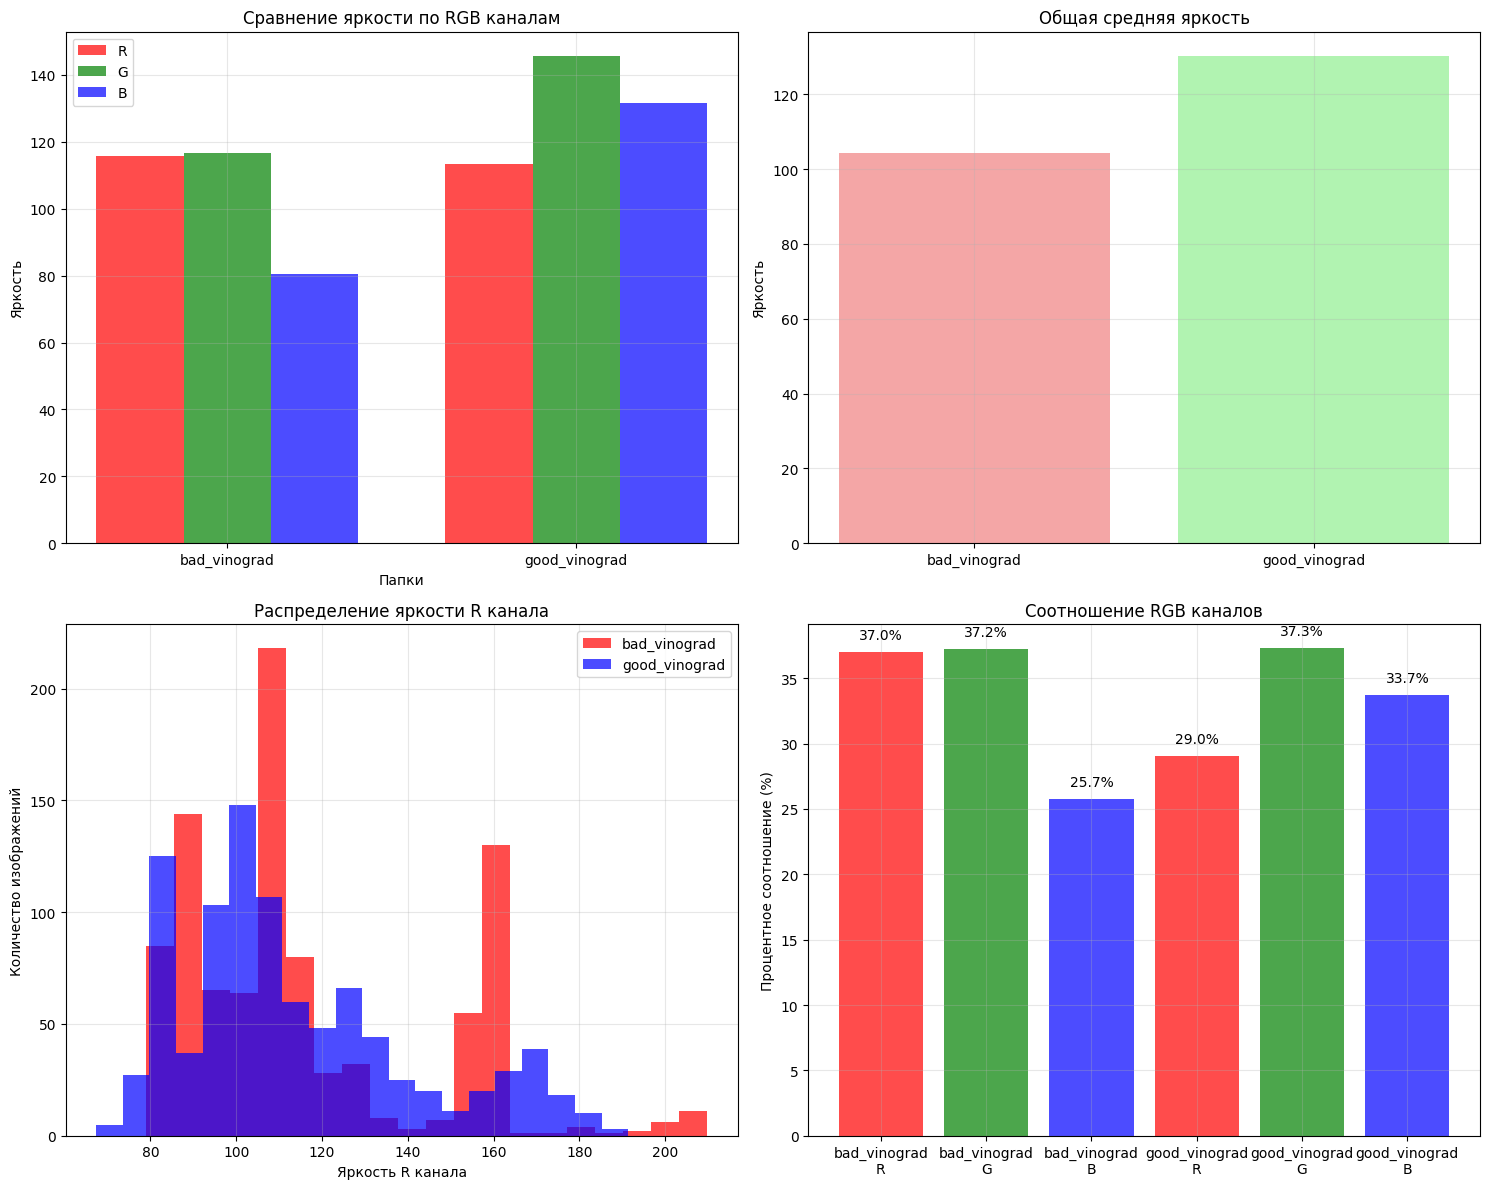

In [ ]:
import cv2
import os
import numpy as np
import glob
from google.colab import drive
import matplotlib.pyplot as plt

# Подключаем Google Диск
drive.mount('/content/drive')

def calculate_folder_brightness(folder_path):
    """
    Вычисляет среднюю яркость по RGB каналам для всех изображений в папке
    """
    # Находим все изображения
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    # Инициализируем сумматоры
    total_r, total_g, total_b = 0, 0, 0
    total_pixels = 0
    all_r, all_g, all_b = [], [], []

    print(f"🔍 Анализирую {len(images)} изображений в папке: {os.path.basename(folder_path)}")

    for i, image_path in enumerate(images, 1):
        # Загружаем изображение
        img = cv2.imread(image_path)
        if img is None:
            continue

        # Конвертируем BGR в RGB (OpenCV использует BGR по умолчанию)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Разделяем на каналы
        r_channel = img_rgb[:, :, 0]
        g_channel = img_rgb[:, :, 1]
        b_channel = img_rgb[:, :, 2]

        # Считаем средние значения для этого изображения
        mean_r = np.mean(r_channel)
        mean_g = np.mean(g_channel)
        mean_b = np.mean(b_channel)

        # Добавляем к общим суммам
        total_r += mean_r * r_channel.size
        total_g += mean_g * g_channel.size
        total_b += mean_b * b_channel.size
        total_pixels += r_channel.size

        # Сохраняем для статистики
        all_r.append(mean_r)
        all_g.append(mean_g)
        all_b.append(mean_b)

        if i % 50 == 0:
            print(f"   📊 Обработано {i}/{len(images)} изображений")

    # Вычисляем общие средние значения
    if total_pixels > 0:
        overall_mean_r = total_r / total_pixels
        overall_mean_g = total_g / total_pixels
        overall_mean_b = total_b / total_pixels
    else:
        overall_mean_r = overall_mean_g = overall_mean_b = 0

    # Статистика по изображениям
    stats = {
        'overall': {
            'R': overall_mean_r,
            'G': overall_mean_g,
            'B': overall_mean_b,
            'Brightness': (overall_mean_r + overall_mean_g + overall_mean_b) / 3
        },
        'per_image': {
            'R': all_r,
            'G': all_g,
            'B': all_b
        },
        'image_count': len(images),
        'folder_name': os.path.basename(folder_path)
    }

    return stats

def print_brightness_stats(stats):
    """Выводит статистику яркости"""
    if stats is None:
        return

    print(f"\n📈 СТАТИСТИКА ЯРКОСТИ: {stats['folder_name']}")
    print("=" * 50)
    print(f"📊 Количество изображений: {stats['image_count']}")
    print()

    overall = stats['overall']
    print("🎯 СРЕДНИЕ ЗНАЧЕНИЯ ПО ВСЕЙ ПАПКЕ:")
    print(f"   🔴 Красный канал (R): {overall['R']:.2f}")
    print(f"   🟢 Зеленый канал (G): {overall['G']:.2f}")
    print(f"   🔵 Синий канал (B): {overall['B']:.2f}")
    print(f"   💡 Общая яркость: {overall['Brightness']:.2f}")
    print()

    # Статистика по отдельным изображениям
    r_values = stats['per_image']['R']
    g_values = stats['per_image']['G']
    b_values = stats['per_image']['B']

    print("📊 СТАТИСТИКА ПО ИЗОБРАЖЕНИЯМ:")
    print(f"   🔴 R: min={np.min(r_values):.2f}, max={np.max(r_values):.2f}, std={np.std(r_values):.2f}")
    print(f"   🟢 G: min={np.min(g_values):.2f}, max={np.max(g_values):.2f}, std={np.std(g_values):.2f}")
    print(f"   🔵 B: min={np.min(b_values):.2f}, max={np.max(b_values):.2f}, std={np.std(b_values):.2f}")

def plot_brightness_comparison(stats1, stats2):
    """Строит график сравнения яркости двух папок"""
    if stats1 is None or stats2 is None:
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Данные для графиков
    folders = [stats1['folder_name'], stats2['folder_name']]
    r_values = [stats1['overall']['R'], stats2['overall']['R']]
    g_values = [stats1['overall']['G'], stats2['overall']['G']]
    b_values = [stats1['overall']['B'], stats2['overall']['B']]
    brightness_values = [stats1['overall']['Brightness'], stats2['overall']['Brightness']]

    colors = ['red', 'green', 'blue']
    channels = ['R', 'G', 'B']
    values = [r_values, g_values, b_values]

    # График 1: Сравнение по каналам
    x = np.arange(len(folders))
    width = 0.25

    for i, (channel, color, vals) in enumerate(zip(channels, colors, values)):
        ax1.bar(x + i*width, vals, width, label=channel, color=color, alpha=0.7)

    ax1.set_xlabel('Папки')
    ax1.set_ylabel('Яркость')
    ax1.set_title('Сравнение яркости по RGB каналам')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(folders)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График 2: Общая яркость
    ax2.bar(folders, brightness_values, color=['lightcoral', 'lightgreen'], alpha=0.7)
    ax2.set_ylabel('Яркость')
    ax2.set_title('Общая средняя яркость')
    ax2.grid(True, alpha=0.3)

    # График 3: Распределение по изображениям (R канал)
    ax3.hist(stats1['per_image']['R'], alpha=0.7, label=stats1['folder_name'], color='red', bins=20)
    ax3.hist(stats2['per_image']['R'], alpha=0.7, label=stats2['folder_name'], color='blue', bins=20)
    ax3.set_xlabel('Яркость R канала')
    ax3.set_ylabel('Количество изображений')
    ax3.set_title('Распределение яркости R канала')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # График 4: Соотношение каналов
    channel_means = [
        [stats1['overall']['R'], stats1['overall']['G'], stats1['overall']['B']],
        [stats2['overall']['R'], stats2['overall']['G'], stats2['overall']['B']]
    ]

    for i, means in enumerate(channel_means):
        total = sum(means)
        percentages = [m/total*100 for m in means]
        ax4.bar([f'{folders[i]}\nR', f'{folders[i]}\nG', f'{folders[i]}\nB'],
                percentages, color=['red', 'green', 'blue'], alpha=0.7)
        for j, percent in enumerate(percentages):
            ax4.text(j + i*3, percent + 1, f'{percent:.1f}%', ha='center')

    ax4.set_ylabel('Процентное соотношение (%)')
    ax4.set_title('Соотношение RGB каналов')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ⭐⭐⭐

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd"  # Плохой виноград
    FOLDER2 = "/content/drive/MyDrive/good_vinograd" # Хороший виноград

    print("🎯 АНАЛИЗ ЯРКОСТИ RGB КАНАЛОВ")
    print("=" * 50)

    # Анализируем первую папку
    print("\n1️⃣  Анализирую папку с ПЛОХИМ виноградом...")
    stats1 = calculate_folder_brightness(FOLDER1)
    print_brightness_stats(stats1)

    # Анализируем вторую папку
    print("\n2️⃣  Анализирую папку с ХОРОШИМ виноградом...")
    stats2 = calculate_folder_brightness(FOLDER2)
    print_brightness_stats(stats2)

    # Сравниваем
    if stats1 and stats2:
        print("\n" + "="*50)
        print("📊 СРАВНЕНИЕ ПАПОК:")
        print("="*50)

        print(f"📈 Разница в яркости:")
        print(f"   🔴 R: {abs(stats1['overall']['R'] - stats2['overall']['R']):.2f}")
        print(f"   🟢 G: {abs(stats1['overall']['G'] - stats2['overall']['G']):.2f}")
        print(f"   🔵 B: {abs(stats1['overall']['B'] - stats2['overall']['B']):.2f}")
        print(f"   💡 Общая: {abs(stats1['overall']['Brightness'] - stats2['overall']['Brightness']):.2f}")

        # Строим графики
        print("\n📊 Строю графики сравнения...")
        plot_brightness_comparison(stats1, stats2)

# Запускаем
if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎯 АНАЛИЗ АЛГОРИТМА 'СЕРЫЙ МИР'

1️⃣  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 945 изображений: bad_vinograd
   📊 Обработано 50/945
   📊 Обработано 100/945
   📊 Обработано 150/945
   📊 Обработано 200/945
   📊 Обработано 250/945
   📊 Обработано 300/945
   📊 Обработано 350/945
   📊 Обработано 400/945
   📊 Обработано 450/945
   📊 Обработано 500/945
   📊 Обработано 550/945
   📊 Обработано 600/945
   📊 Обработано 650/945
   📊 Обработано 700/945
   📊 Обработано 750/945
   📊 Обработано 800/945
   📊 Обработано 850/945
   📊 Обработано 900/945

📈 АНАЛИЗ 'СЕРЫЙ МИР': bad_vinograd
📊 Количество изображений: 945

🎯 ДО КОРРЕКЦИИ:
   🔴 R: 115.90
   🟢 G: 116.60
   🔵 B: 80.54
   📊 Среднее: 104.34
   📏 Отклонение каналов: 16.84

🎯 ПОСЛЕ КОРРЕКЦИИ ('Серый мир'):
   🔴 R: 103.95
   🟢 G: 103.95
   🔵 B: 103.43
   📊 Среднее: 103.77
   📏 Отклонение каналов: 0.24

🎯 КОЭФФИЦИ

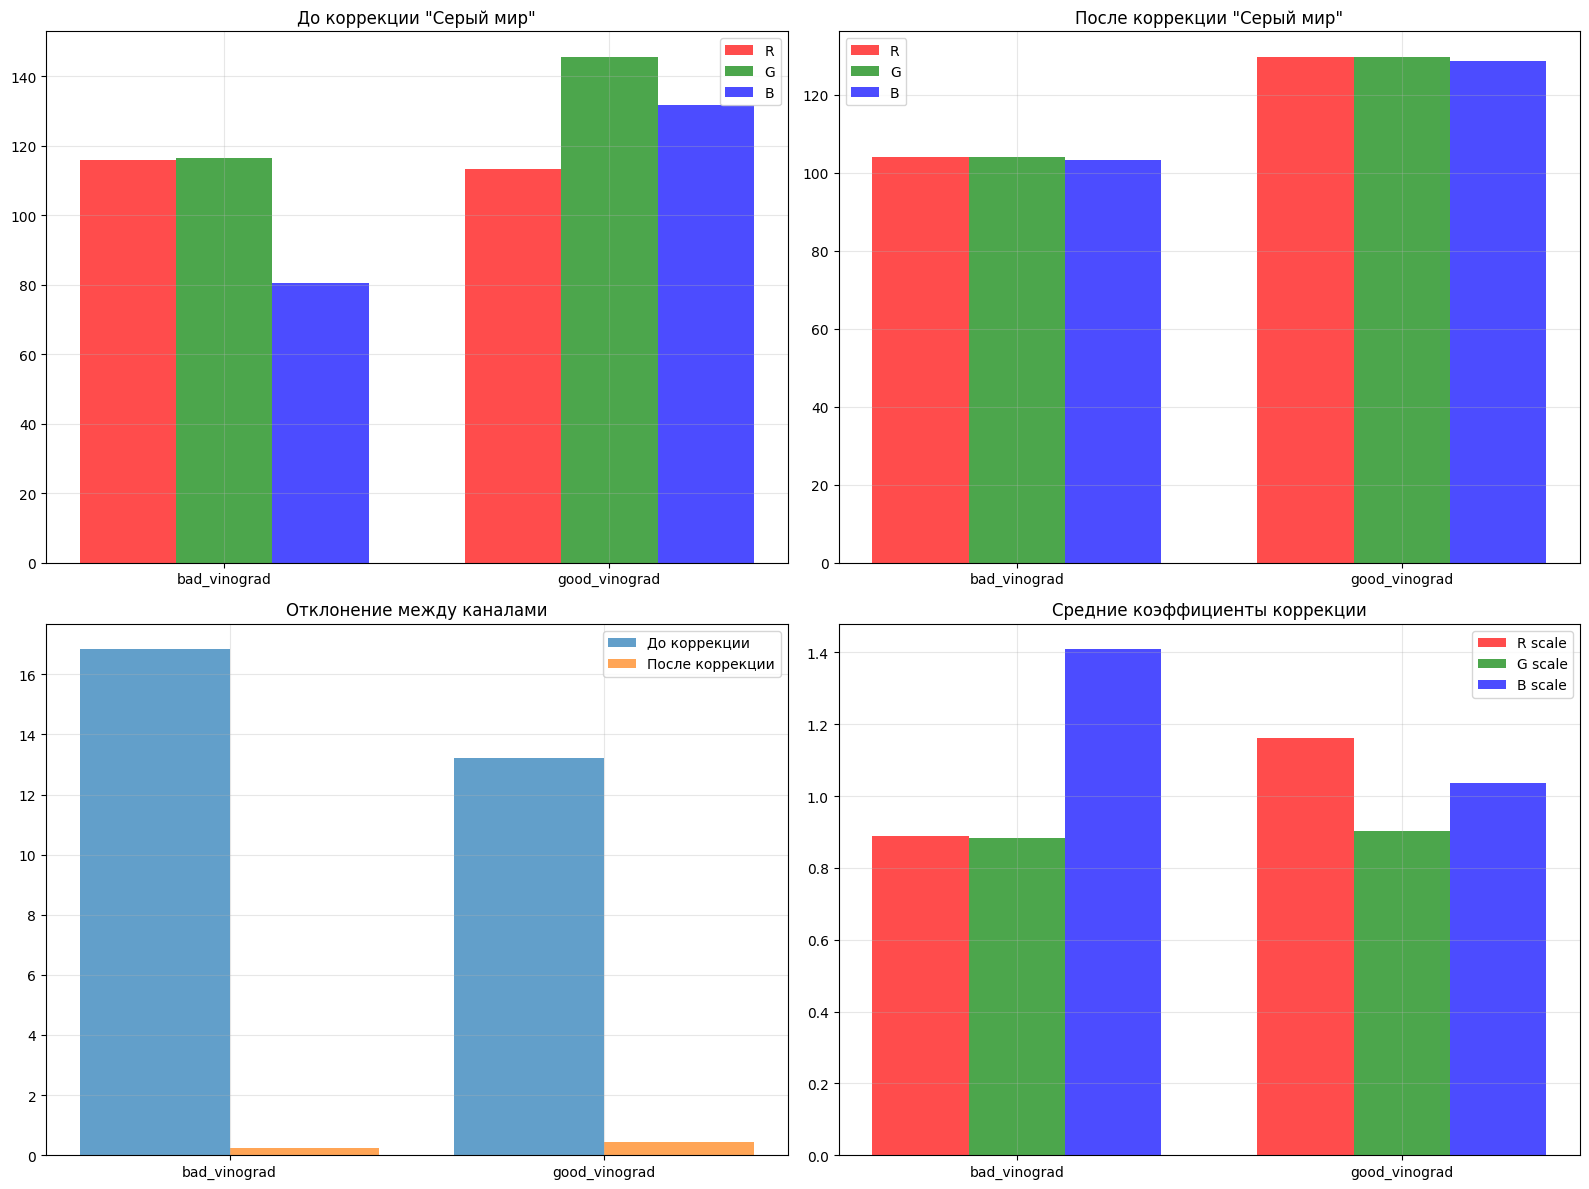

In [ ]:
import cv2
import os
import numpy as np
import glob
from google.colab import drive
import matplotlib.pyplot as plt

# Подключаем Google Диск
drive.mount('/content/drive')

def apply_gray_world(image):
    """
    Применяет алгоритм "Серый мир" к изображению
    """
    # Конвертируем BGR в RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Вычисляем средние значения каналов
    mean_r = np.mean(img_rgb[:, :, 0])
    mean_g = np.mean(img_rgb[:, :, 1])
    mean_b = np.mean(img_rgb[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    mean_all = (mean_r + mean_g + mean_b) / 3.0

    # Вычисляем коэффициенты коррекции
    scale_r = mean_all / mean_r if mean_r > 0 else 1.0
    scale_g = mean_all / mean_g if mean_g > 0 else 1.0
    scale_b = mean_all / mean_b if mean_b > 0 else 1.0

    # Применяем коррекцию
    corrected = img_rgb.copy().astype(np.float32)
    corrected[:, :, 0] *= scale_r  # R канал
    corrected[:, :, 1] *= scale_g  # G канал
    corrected[:, :, 2] *= scale_b  # B канал

    # Ограничиваем значения [0, 255]
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)

    # Конвертируем обратно в BGR для OpenCV
    corrected_bgr = cv2.cvtColor(corrected, cv2.COLOR_RGB2BGR)

    return corrected_bgr, (mean_r, mean_g, mean_b, mean_all, scale_r, scale_g, scale_b)

def calculate_folder_brightness_with_gray_world(folder_path):
    """
    Вычисляет среднюю яркость и применяет алгоритм "Серый мир"
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    # Статистика до коррекции
    total_r, total_g, total_b = 0, 0, 0
    total_pixels = 0

    # Статистика после коррекции
    total_r_corr, total_g_corr, total_b_corr = 0, 0, 0

    # Коэффициенты коррекции
    all_scales_r, all_scales_g, all_scales_b = [], [], []

    print(f"🔍 Анализирую {len(images)} изображений: {os.path.basename(folder_path)}")

    for i, image_path in enumerate(images, 1):
        img = cv2.imread(image_path)
        if img is None:
            continue

        # Применяем алгоритм "Серый мир"
        corrected_img, stats = apply_gray_world(img)
        mean_r, mean_g, mean_b, mean_all, scale_r, scale_g, scale_b = stats

        # Статистика до коррекции
        total_r += mean_r * img.shape[0] * img.shape[1]
        total_g += mean_g * img.shape[0] * img.shape[1]
        total_b += mean_b * img.shape[0] * img.shape[1]
        total_pixels += img.shape[0] * img.shape[1]

        # Статистика после коррекции
        corrected_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
        mean_r_corr = np.mean(corrected_rgb[:, :, 0])
        mean_g_corr = np.mean(corrected_rgb[:, :, 1])
        mean_b_corr = np.mean(corrected_rgb[:, :, 2])

        total_r_corr += mean_r_corr * img.shape[0] * img.shape[1]
        total_g_corr += mean_g_corr * img.shape[0] * img.shape[1]
        total_b_corr += mean_b_corr * img.shape[0] * img.shape[1]

        # Сохраняем коэффициенты
        all_scales_r.append(scale_r)
        all_scales_g.append(scale_g)
        all_scales_b.append(scale_b)

        if i % 50 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    # Вычисляем средние значения
    if total_pixels > 0:
        # До коррекции
        overall_mean_r = total_r / total_pixels
        overall_mean_g = total_g / total_pixels
        overall_mean_b = total_b / total_pixels
        overall_mean = (overall_mean_r + overall_mean_g + overall_mean_b) / 3

        # После коррекции
        overall_mean_r_corr = total_r_corr / total_pixels
        overall_mean_g_corr = total_g_corr / total_pixels
        overall_mean_b_corr = total_b_corr / total_pixels
        overall_mean_corr = (overall_mean_r_corr + overall_mean_g_corr + overall_mean_b_corr) / 3
    else:
        overall_mean_r = overall_mean_g = overall_mean_b = overall_mean = 0
        overall_mean_r_corr = overall_mean_g_corr = overall_mean_b_corr = overall_mean_corr = 0

    stats = {
        'before_correction': {
            'R': overall_mean_r,
            'G': overall_mean_g,
            'B': overall_mean_b,
            'Average': overall_mean,
            'Deviation': np.std([overall_mean_r, overall_mean_g, overall_mean_b])
        },
        'after_correction': {
            'R': overall_mean_r_corr,
            'G': overall_mean_g_corr,
            'B': overall_mean_b_corr,
            'Average': overall_mean_corr,
            'Deviation': np.std([overall_mean_r_corr, overall_mean_g_corr, overall_mean_b_corr])
        },
        'correction_factors': {
            'R_mean': np.mean(all_scales_r),
            'G_mean': np.mean(all_scales_g),
            'B_mean': np.mean(all_scales_b),
            'R_std': np.std(all_scales_r),
            'G_std': np.std(all_scales_g),
            'B_std': np.std(all_scales_b)
        },
        'image_count': len(images),
        'folder_name': os.path.basename(folder_path)
    }

    return stats

def print_gray_world_stats(stats):
    """Выводит статистику алгоритма 'Серый мир'"""
    if stats is None:
        return

    print(f"\n📈 АНАЛИЗ 'СЕРЫЙ МИР': {stats['folder_name']}")
    print("=" * 60)
    print(f"📊 Количество изображений: {stats['image_count']}")
    print()

    before = stats['before_correction']
    after = stats['after_correction']
    factors = stats['correction_factors']

    print("🎯 ДО КОРРЕКЦИИ:")
    print(f"   🔴 R: {before['R']:.2f}")
    print(f"   🟢 G: {before['G']:.2f}")
    print(f"   🔵 B: {before['B']:.2f}")
    print(f"   📊 Среднее: {before['Average']:.2f}")
    print(f"   📏 Отклонение каналов: {before['Deviation']:.2f}")
    print()

    print("🎯 ПОСЛЕ КОРРЕКЦИИ ('Серый мир'):")
    print(f"   🔴 R: {after['R']:.2f}")
    print(f"   🟢 G: {after['G']:.2f}")
    print(f"   🔵 B: {after['B']:.2f}")
    print(f"   📊 Среднее: {after['Average']:.2f}")
    print(f"   📏 Отклонение каналов: {after['Deviation']:.2f}")
    print()

    print("🎯 КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:")
    print(f"   🔴 R: {factors['R_mean']:.3f} ± {factors['R_std']:.3f}")
    print(f"   🟢 G: {factors['G_mean']:.3f} ± {factors['G_std']:.3f}")
    print(f"   🔵 B: {factors['B_mean']:.3f} ± {factors['B_std']:.3f}")
    print()

    # Эффективность коррекции
    improvement = before['Deviation'] - after['Deviation']
    print(f"📊 ЭФФЕКТИВНОСТЬ КОРРЕКЦИИ:")
    print(f"   📉 Уменьшение отклонения: {improvement:.2f} ({improvement/before['Deviation']*100:.1f}%)")
    print(f"   🎯 Баланс каналов: {'✓ Хороший' if after['Deviation'] < 5 else '⚠️ Можно улучшить'}")

def plot_gray_world_comparison(stats1, stats2):
    """Строит графики сравнения"""
    if stats1 is None or stats2 is None:
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    folders = [stats1['folder_name'], stats2['folder_name']]

    # Данные для графиков
    before_r = [stats1['before_correction']['R'], stats2['before_correction']['R']]
    before_g = [stats1['before_correction']['G'], stats2['before_correction']['G']]
    before_b = [stats1['before_correction']['B'], stats2['before_correction']['B']]

    after_r = [stats1['after_correction']['R'], stats2['after_correction']['R']]
    after_g = [stats1['after_correction']['G'], stats2['after_correction']['G']]
    after_b = [stats1['after_correction']['B'], stats2['after_correction']['B']]

    # График 1: Сравнение до коррекции
    x = np.arange(len(folders))
    width = 0.25

    ax1.bar(x - width, before_r, width, label='R', color='red', alpha=0.7)
    ax1.bar(x, before_g, width, label='G', color='green', alpha=0.7)
    ax1.bar(x + width, before_b, width, label='B', color='blue', alpha=0.7)
    ax1.set_title('До коррекции "Серый мир"')
    ax1.set_xticks(x)
    ax1.set_xticklabels(folders)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График 2: Сравнение после коррекции
    ax2.bar(x - width, after_r, width, label='R', color='red', alpha=0.7)
    ax2.bar(x, after_g, width, label='G', color='green', alpha=0.7)
    ax2.bar(x + width, after_b, width, label='B', color='blue', alpha=0.7)
    ax2.set_title('После коррекции "Серый мир"')
    ax2.set_xticks(x)
    ax2.set_xticklabels(folders)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # График 3: Отклонение каналов
    deviation_before = [stats1['before_correction']['Deviation'], stats2['before_correction']['Deviation']]
    deviation_after = [stats1['after_correction']['Deviation'], stats2['after_correction']['Deviation']]

    ax3.bar(x - 0.2, deviation_before, 0.4, label='До коррекции', alpha=0.7)
    ax3.bar(x + 0.2, deviation_after, 0.4, label='После коррекции', alpha=0.7)
    ax3.set_title('Отклонение между каналами')
    ax3.set_xticks(x)
    ax3.set_xticklabels(folders)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # График 4: Коэффициенты коррекции
    scales_r = [stats1['correction_factors']['R_mean'], stats2['correction_factors']['R_mean']]
    scales_g = [stats1['correction_factors']['G_mean'], stats2['correction_factors']['G_mean']]
    scales_b = [stats1['correction_factors']['B_mean'], stats2['correction_factors']['B_mean']]

    ax4.bar(x - width, scales_r, width, label='R scale', color='red', alpha=0.7)
    ax4.bar(x, scales_g, width, label='G scale', color='green', alpha=0.7)
    ax4.bar(x + width, scales_b, width, label='B scale', color='blue', alpha=0.7)
    ax4.set_title('Средние коэффициенты коррекции')
    ax4.set_xticks(x)
    ax4.set_xticklabels(folders)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ⭐⭐⭐

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd"

    print("🎯 АНАЛИЗ АЛГОРИТМА 'СЕРЫЙ МИР'")
    print("=" * 60)

    # Анализируем первую папку
    print("\n1️⃣  Анализирую папку с ПЛОХИМ виноградом...")
    stats1 = calculate_folder_brightness_with_gray_world(FOLDER1)
    print_gray_world_stats(stats1)

    # Анализируем вторую папку
    print("\n2️⃣  Анализирую папку с ХОРОШИМ виноградом...")
    stats2 = calculate_folder_brightness_with_gray_world(FOLDER2)
    print_gray_world_stats(stats2)

    # Сравниваем
    if stats1 and stats2:
        print("\n" + "="*60)
        print("📊 СРАВНЕНИЕ ЭФФЕКТИВНОСТИ 'СЕРОГО МИРА':")
        print("="*60)

        # Эффективность коррекции
        improvement1 = stats1['before_correction']['Deviation'] - stats1['after_correction']['Deviation']
        improvement2 = stats2['before_correction']['Deviation'] - stats2['after_correction']['Deviation']

        print(f"📉 Уменьшение отклонения в папке 1: {improvement1:.2f}")
        print(f"📉 Уменьшение отклонения в папке 2: {improvement2:.2f}")

        # Строим графики
        print("\n📊 Строю графики сравнения...")
        plot_gray_world_comparison(stats1, stats2)

# Запускаем
if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎯 АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С ВРЕМЕННЫМИ МЕТКАМИ

🧪 Тестирование извлечения временных меток...
   2025_08_26_184958_00_bad.jpg -> 2025-08-26 18:49:58
   2025_08_27_093045_01_good.png -> 2025-08-27 09:30:45

1️⃣  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 945 изображений...
   📊 Обработано 10/945
   📊 Обработано 20/945
   📊 Обработано 30/945
   📊 Обработано 40/945
   📊 Обработано 50/945
   📊 Обработано 60/945
   📊 Обработано 70/945
   📊 Обработано 80/945
   📊 Обработано 90/945
   📊 Обработано 100/945
   📊 Обработано 110/945
   📊 Обработано 120/945
   📊 Обработано 130/945
   📊 Обработано 140/945
   📊 Обработано 150/945
   📊 Обработано 160/945
   📊 Обработано 170/945
   📊 Обработано 180/945
   📊 Обработано 190/945
   📊 Обработано 200/945
   📊 Обработано 210/945
   📊 Обработано 220/945
   📊 Обработано 230/945
   📊 Обработано 240/945
   📊 Обработано 250/94

/tmp/ipython-input-4207694457.py:188: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


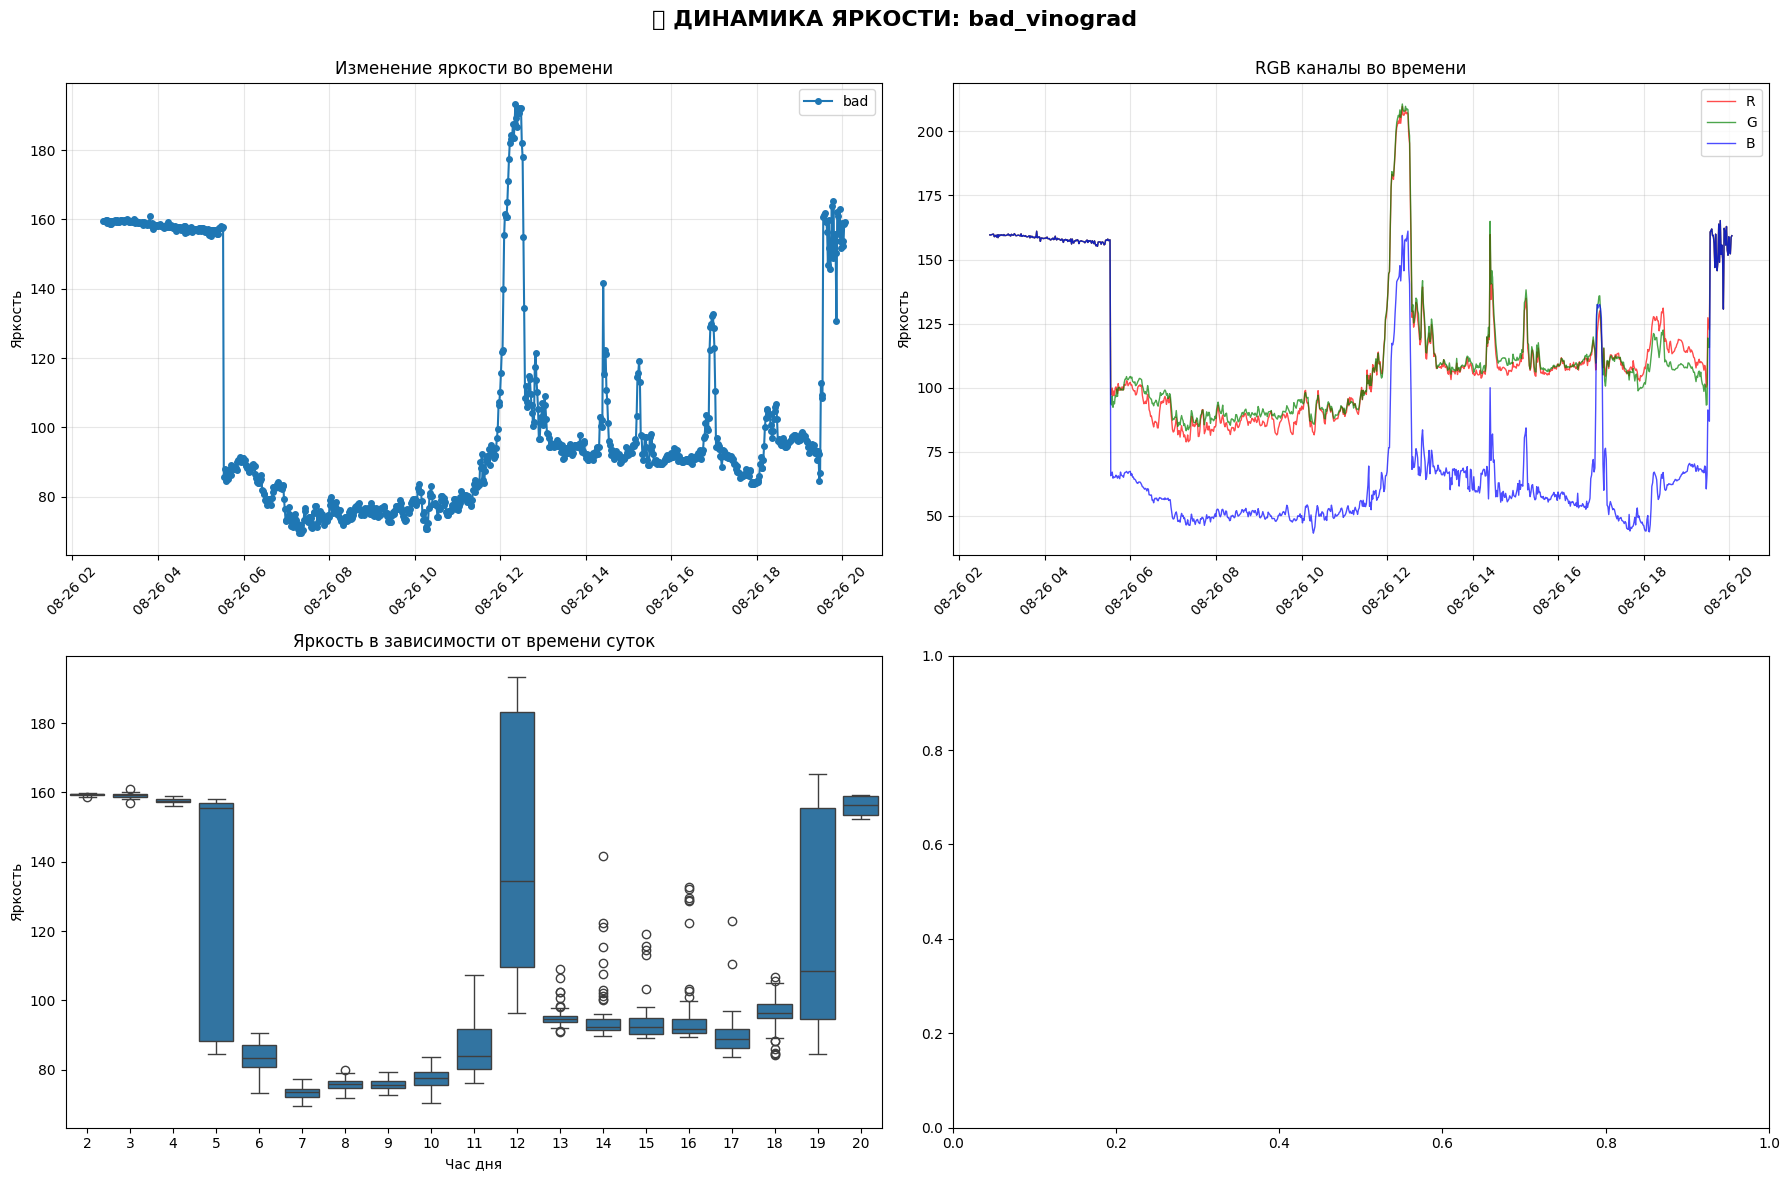


2️⃣  Анализирую папку с ХОРОШИМ виноградом...
🔍 Анализирую 945 изображений...
   📊 Обработано 10/945
   📊 Обработано 20/945
   📊 Обработано 30/945
   📊 Обработано 40/945
   📊 Обработано 50/945
   📊 Обработано 60/945
   📊 Обработано 70/945
   📊 Обработано 80/945
   📊 Обработано 90/945
   📊 Обработано 100/945
   📊 Обработано 110/945
   📊 Обработано 120/945
   📊 Обработано 130/945
   📊 Обработано 140/945
   📊 Обработано 150/945
   📊 Обработано 160/945
   📊 Обработано 170/945
   📊 Обработано 180/945
   📊 Обработано 190/945
   📊 Обработано 200/945
   📊 Обработано 210/945
   📊 Обработано 220/945
   📊 Обработано 230/945
   📊 Обработано 240/945
   📊 Обработано 250/945
   📊 Обработано 260/945
   📊 Обработано 270/945
   📊 Обработано 280/945
   📊 Обработано 290/945
   📊 Обработано 300/945
   📊 Обработано 310/945
   📊 Обработано 320/945
   📊 Обработано 330/945
   📊 Обработано 340/945
   📊 Обработано 350/945
   📊 Обработано 360/945
   📊 Обработано 370/945
   📊 Обработано 380/945
   📊 Обработано 39

/tmp/ipython-input-4207694457.py:188: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


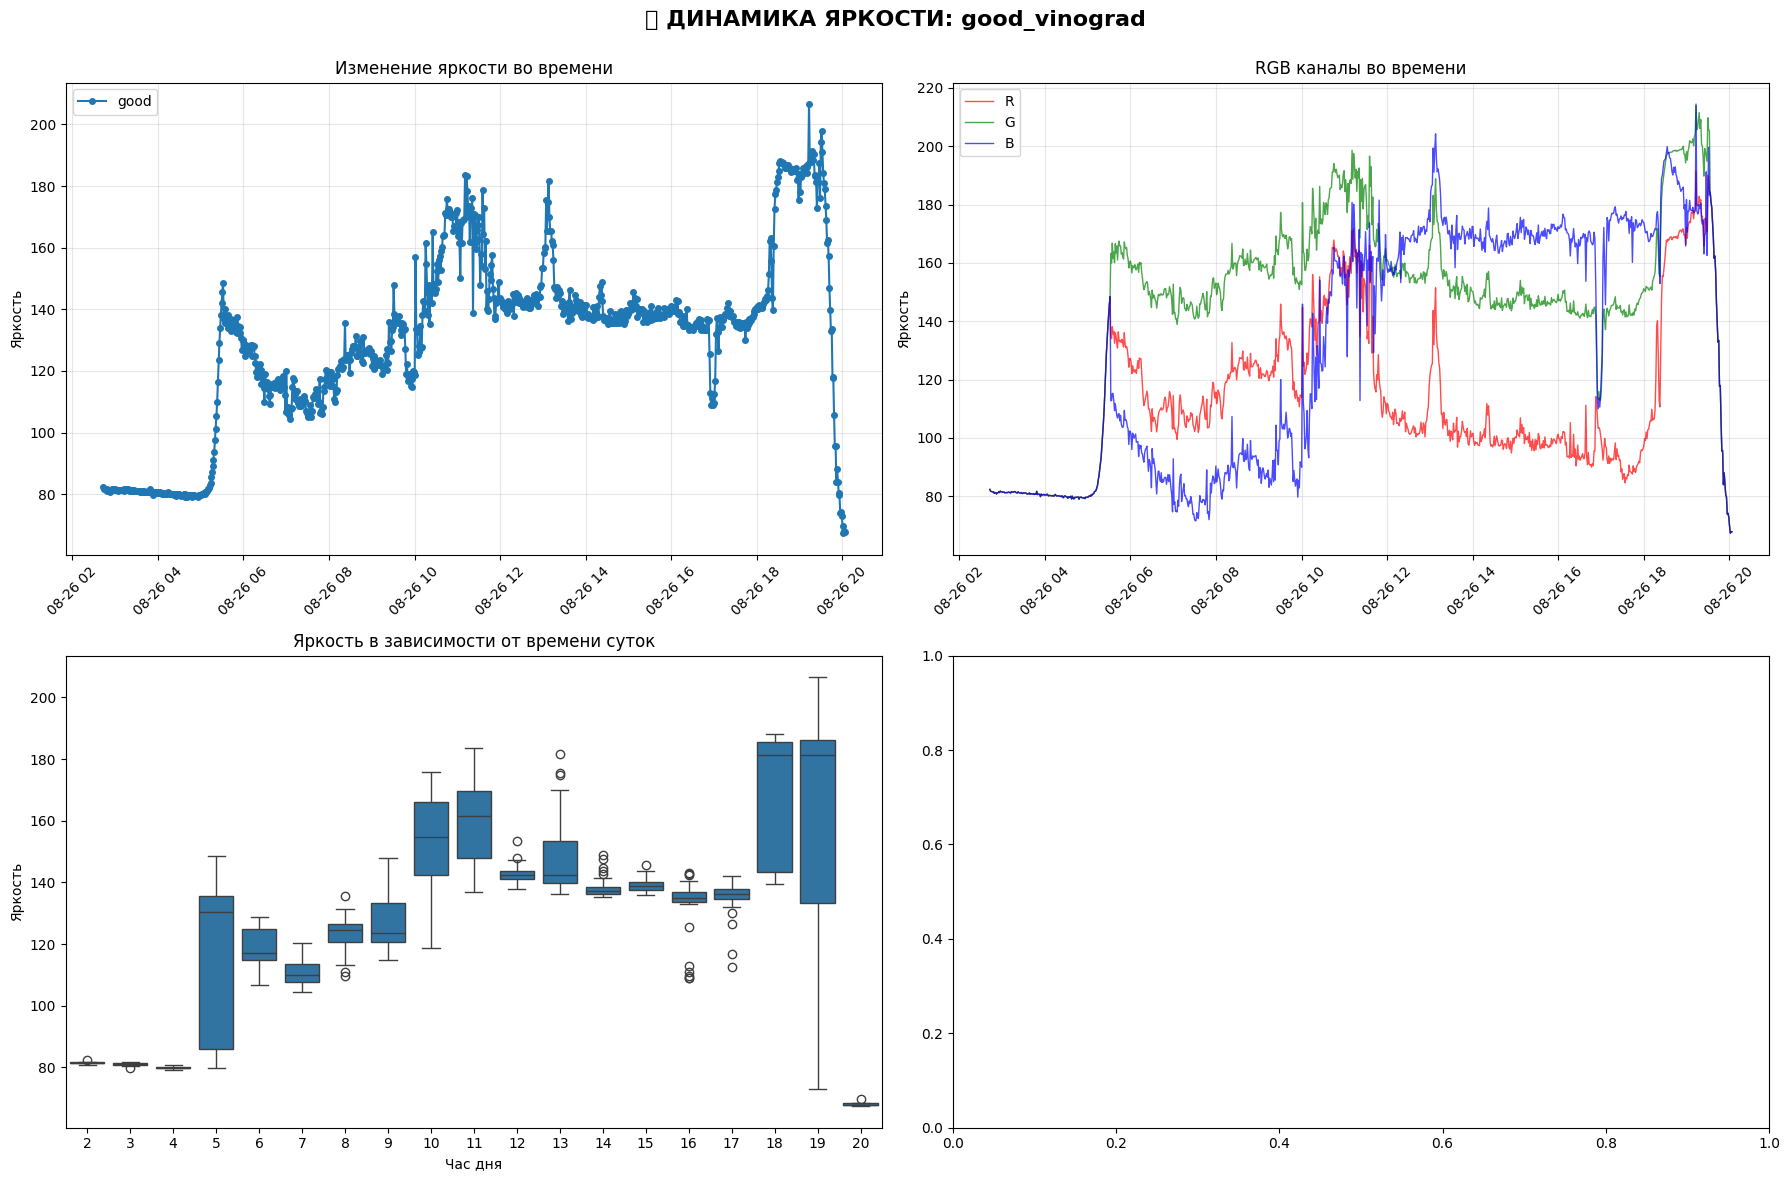


📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
📈 Средняя яркость:
   bad_vinograd: 104.34
   good_vinograd: 129.61
   Разница: 25.26


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f"⚠️ Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем статистику по каналам
    r_mean = np.mean(img_rgb[:, :, 0])
    g_mean = np.mean(img_rgb[:, :, 1])
    b_mean = np.mean(img_rgb[:, :, 2])
    overall_mean = (r_mean + g_mean + b_mean) / 3

    # Яркость в grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_mean = np.mean(img_gray)

    # Контрастность
    contrast = np.std(img_gray)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,
        'brightness_r': r_mean,
        'brightness_g': g_mean,
        'brightness_b': b_mean,
        'brightness_overall': overall_mean,
        'brightness_gray': gray_mean,
        'contrast': contrast,
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    print(f"🔍 Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis(df, folder_name):
    """
    Строит графики временного анализа
    """
    if df is None or len(df) == 0:
        return

    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'📈 ДИНАМИКА ЯРКОСТИ: {folder_name}\n', fontsize=16, fontweight='bold')

    # График 1: Яркость во времени
    ax1 = axes[0, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax1.plot(category_data['timestamp'], category_data['brightness_overall'],
                'o-', label=category, markersize=4)

    ax1.set_title('Изменение яркости во времени')
    ax1.set_ylabel('Яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени
    ax2 = axes[0, 1]
    ax2.plot(df['timestamp'], df['brightness_r'], 'r-', label='R', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_g'], 'g-', label='G', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_b'], 'b-', label='B', alpha=0.7, linewidth=1)
    ax2.set_title('RGB каналы во времени')
    ax2.set_ylabel('Яркость')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Яркость по времени суток
    ax3 = axes[1, 0]
    if len(df) > 1:
        sns.boxplot(x='hour', y='brightness_overall', data=df, ax=ax3)
        ax3.set_title('Яркость в зависимости от времени суток')
        ax3.set_xlabel('Час дня')
        ax3.set_ylabel('Яркость')

    # График 4: Сравнение категорий
    ax4 = axes[1, 1]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall', data=df, ax=ax4)
        ax4.set_title('Распределение яркости по категориям')
        ax4.set_xlabel('Категория')
        ax4.set_ylabel('Яркость')

    plt.tight_layout()
    plt.show()

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику
    """
    if df is None or len(df) == 0:
        return

    print(f"\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА: {folder_name}")
    print("=" * 60)
    print(f"📅 Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"⏱️  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f"📈 Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n📋 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n🎯 СТАТИСТИКА ЯРКОСТИ:")
    print(f"   📊 Средняя яркость: {df['brightness_overall'].mean():.2f}")
    print(f"   📏 Стандартное отклонение: {df['brightness_overall'].std():.2f}")
    print(f"   🔴 Средний R: {df['brightness_r'].mean():.2f}")
    print(f"   🟢 Средний G: {df['brightness_g'].mean():.2f}")
    print(f"   🔵 Средний B: {df['brightness_b'].mean():.2f}")

    # Анализ трендов
    if len(df) > 1:
        time_corr = df['brightness_overall'].corr(df['time_delta'])
        trend = "↗️ Возрастает" if time_corr > 0.1 else "↘️ Убывает" if time_corr < -0.1 else "➡️ Стабильна"
        print(f"\n📶 ТРЕНД: {trend} (корреляция: {time_corr:.3f})")

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ⭐⭐⭐

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd"

    print("🎯 АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С ВРЕМЕННЫМИ МЕТКАМИ")
    print("=" * 70)

    # Тестируем извлечение временных меток
    print("\n🧪 Тестирование извлечения временных меток...")
    test_files = ["2025_08_26_184958_00_bad.jpg", "2025_08_27_093045_01_good.png"]
    for test_file in test_files:
        timestamp = extract_timestamp_from_filename(test_file)
        print(f"   {test_file} -> {timestamp}")

    # Анализируем обе папки
    print("\n1️⃣  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        plot_timeline_analysis(df1, "bad_vinograd")

    print("\n2️⃣  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        plot_timeline_analysis(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*70)
        print("📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
        print("="*70)

        print(f"📈 Средняя яркость:")
        print(f"   bad_vinograd: {df1['brightness_overall'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall'].mean() - df2['brightness_overall'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()

In [ ]:
import requests
import json

def test_windy_api_key(api_key):
    """
    Проверяет работоспособность Windy API ключа
    """
    print("🔍 Тестируем Windy API ключ...")
    print(f"Ключ: {api_key[:8]}...{api_key[-8:]}")

    # URL для проверки ключа Windy API
    url = "https://api.windy.com/api/point-forecast/v2"

    # Параметры для тестового запроса (Москва)
    params = {
        "lat": 55.7558,
        "lon": 37.6173,
        "model": "gfs",
        "parameters": ["temp", "wind", "clouds"],
        "levels": ["surface"],
        "key": api_key
    }

    try:
        print("🔄 Отправляем запрос к Windy API...")
        response = requests.post(url, json=params, timeout=15)

        print(f"📊 Статус ответа: {response.status_code}")

        if response.status_code == 200:
            data = response.json()
            print("✅ Windy API ключ работает корректно!")

            # Парсим данные о погоде
            if 'ts' in data and 'temp-surface' in data:
                print(f"🌡️  Температура: {data['temp-surface'][0]}°C")
                print(f"💨 Скорость ветра: {data['wind-speed-surface'][0]} м/с")
                print(f"🧭 Направление ветра: {data['wind-dir-surface'][0]}°")
                print(f"☁️  Облачность: {data['clouds-surface'][0]}%")

            return True

        elif response.status_code == 403:
            print("❌ Ошибка 403: Неверный API ключ или доступ запрещен")
            print("ℹ️  Проверьте:")
            print("   - Правильность ключа")
            print("   - Активирован ли ключ на windy.com")
            print("   - Не истек ли срок действия")
            return False

        elif response.status_code == 429:
            print("❌ Ошибка 429: Превышен лимит запросов")
            return False

        else:
            print(f"❌ Ошибка {response.status_code}")
            print(f"📄 Ответ: {response.text[:200]}...")
            return False

    except requests.exceptions.Timeout:
        print("❌ Таймаут соединения с Windy API")
        return False
    except requests.exceptions.ConnectionError:
        print("❌ Ошибка подключения к интернету")
        return False
    except Exception as e:
        print(f"❌ Неожиданная ошибка: {e}")
        return False

def get_windy_weather(api_key, lat, lon):
    """
    Получает данные о погоде с Windy API
    """
    url = "https://api.windy.com/api/point-forecast/v2"

    params = {
        "lat": lat,
        "lon": lon,
        "model": "gfs",
        "parameters": ["temp", "wind", "humidity", "pressure", "clouds"],
        "levels": ["surface"],
        "key": api_key
    }

    try:
        response = requests.post(url, json=params, timeout=10)

        if response.status_code == 200:
            data = response.json()

            # Извлекаем актуальные данные (первый временной срез)
            weather_data = {
                'temperature': data.get('temp-surface', [None])[0],
                'wind_speed': data.get('wind-speed-surface', [None])[0],
                'wind_direction': data.get('wind-dir-surface', [None])[0],
                'humidity': data.get('rh-surface', [None])[0],
                'pressure': data.get('msl-pressure-surface', [None])[0],
                'clouds': data.get('clouds-surface', [None])[0],
                'timestamp': data.get('ts', [None])[0]
            }

            return weather_data
        else:
            print(f"❌ Ошибка при получении погоды: {response.status_code}")
            return None

    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return None

# ⭐⭐⭐ ЗДЕСЬ ВСТАВЬТЕ ВАШ WINDY API КЛЮЧ ⭐⭐⭐
WINDY_API_KEY = "iOJM9dyjLVQq6z1XAgQOAVVU8owY8ZWC"  # ← ЗАМЕНИТЕ НА ВАШ КЛЮЧ

# Проверка ключа
print("🌪️ ТЕСТИРУЕМ WINDY API")
print("=" * 50)

if WINDY_API_KEY != "ваш_windy_api_ключ_здесь":
    # Тестируем ключ
    if test_windy_api_key(WINDY_API_KEY):
        print("\n🎉 Ключ работает! Теперь можем получать погодные данные:")

        # Пример получения погоды для Москвы
        weather = get_windy_weather(WINDY_API_KEY, 55.7558, 37.6173)
        if weather:
            print(f"🌡️  Температура: {weather['temperature']}°C")
            print(f"💨 Ветер: {weather['wind_speed']} м/с, направление {weather['wind_direction']}°")
            print(f"💧 Влажность: {weather['humidity']}%")
            print(f"📊 Давление: {weather['pressure']} hPa")
            print(f"☁️  Облачность: {weather['clouds']}%")

    else:
        print("\n❌ Проблемы с API ключом. Проверьте:")
        print("1. Правильность ключа")
        print("2. Активацию на windy.com")
        print("3. Срок действия ключа")
else:
    print("❌ Замените 'ваш_windy_api_ключ_здесь' на ваш настоящий ключ Windy API")

In [ ]:
# Добавьте этот код в ноутбук чтобы получить точную ссылку
from google.colab import drive
import ipywidgets as widgets

def get_colab_link():
    """Получает точную ссылку на Colab ноутбук"""
    try:
        # Попробуем получить ID ноутбука из URL
        from IPython import get_ipython
        shell = get_ipython()
        if shell and hasattr(shell, 'config'):
            notebook_id = shell.config.get('NotebookApp', {}).get('notebook_id', '')
            if notebook_id:
                return f"https://colab.research.google.com/drive/{notebook_id}"
    except:
        pass

    # Альтернативный способ
    return "https://colab.research.google.com/drive/your-notebook-id-here"

# Покажем ссылку для копирования
colab_link = get_colab_link()
print("📋 Скопируйте эту ссылку для Windy API:")
print(colab_link)
print("\n📌 Вставьте ее в поле 'Project Identification'")

📋 Скопируйте эту ссылку для Windy API:
https://colab.research.google.com/drive/your-notebook-id-here

📌 Вставьте ее в поле 'Project Identification'


In [ ]:
# ⭐⭐⭐ ВАШ РАБОЧИЙ API КЛЮЧ ⭐⭐⭐
OPENWEATHER_API_KEY = "f49c722c9235ceaf29014a098a8f4274"

# Настройте ваши координаты (широта и долгота)
LAT = 55.7558  # Широта Москвы
LON = 37.6173  # Долгота Москвы

print("✅ API ключ активен и готов к использованию!")

✅ API ключ активен и готов к использованию!


In [ ]:
import requests

def test_weather_api():
    """Тестирует работу API ключа"""
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&appid={OPENWEATHER_API_KEY}&units=metric&lang=ru"

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            print("🌤️ ТЕКУЩАЯ ПОГОДА:")
            print(f"📍 Местоположение: {data['name']}")
            print(f"🌡️  Температура: {data['main']['temp']}°C")
            print(f"💧 Влажность: {data['main']['humidity']}%")
            print(f"💨 Ветер: {data['wind']['speed']} м/с")
            print(f"☁️  Облачность: {data['clouds']['all']}%")
            print("✅ API ключ работает отлично!")
            return True
        else:
            print(f"❌ Ошибка: {response.status_code}")
            return False
    except Exception as e:
        print(f"⚠️ Ошибка: {e}")
        return False

# Запустите тест
test_weather_api()

🌤️ ТЕКУЩАЯ ПОГОДА:
📍 Местоположение: Москва
🌡️  Температура: 15.58°C
💧 Влажность: 63%
💨 Ветер: 3.36 м/с
☁️  Облачность: 47%
✅ API ключ работает отлично!


True

In [ ]:
import requests

def detailed_api_test(api_key):
    """
    Детальная проверка API ключа с диагностикой
    """
    print("🔍 ДЕТАЛЬНАЯ ДИАГНОСТИКА API КЛЮЧА")
    print("=" * 50)

    # Ваш ключ (замените на actual key)
    TEST_API_KEY = "e2f37603c3d76e67f94bfa23bf617b48"
    LAT, LON = 55.7558, 37.6173  # Москва

    print(f"API ключ: {TEST_API_KEY}")
    print(f"Длина ключа: {len(TEST_API_KEY)} символов")
    print(f"Координаты: {LAT}, {LON}")
    print()

    # Проверка формата ключа
    print("1. 📋 Проверка формата ключа...")
    if len(TEST_API_KEY) != 32:
        print(f"❌ Неверная длина! Должно быть 32 символа, а у вас {len(TEST_API_KEY)}")
        print("ℹ️  Возможно есть лишние пробелы или не те символы")
    else:
        print("✅ Длина ключа правильная (32 символа)")

    # Проверка наличия специальных символов
    if not TEST_API_KEY.isalnum():
        print("❌ Ключ содержит недопустимые символы!")
        print("ℹ️  Уберите все спецсимволы, оставьте только буквы и цифры")
    else:
        print("✅ Формат ключа корректный (только буквы и цифры)")

    print()
    print("2. 🌐 Проверка подключения к API...")

    # Тестовый URL
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={LAT}&lon={LON}&appid={TEST_API_KEY}&units=metric"

    try:
        print(f"🔄 Отправляем запрос: {url[:60]}...")
        response = requests.get(url, timeout=10)

        print(f"📊 HTTP статус: {response.status_code}")

        if response.status_code == 200:
            print("✅ УСПЕХ! API ключ работает корректно!")
            data = response.json()
            print(f"🌡️  Температура: {data['main']['temp']}°C")
            print(f"📍 Город: {data.get('name', 'Unknown')}")
            return True

        elif response.status_code == 401:
            print("❌ ОШИБКА 401: Неверный API ключ")
            print("ℹ️  Возможные причины:")
            print("   - Ключ введен с ошибкой")
            print("   - Ключ не активирован (ждать 10-15 мин после создания)")
            print("   - Ключ заблокирован")

        elif response.status_code == 429:
            print("❌ ОШИБКА 429: Слишком много запросов")
            print("ℹ️  Подождите несколько минут")

        elif response.status_code == 404:
            print("❌ ОШИБКА 404: Неверный URL или сервис недоступен")

        else:
            print(f"❌ Неизвестная ошибка: {response.status_code}")
            print(f"📄 Ответ сервера: {response.text[:200]}...")

        return False

    except requests.exceptions.Timeout:
        print("❌ Таймаут соединения (более 10 секунд)")
        return False
    except requests.exceptions

SyntaxError: expected ':' (ipython-input-2218382696.py, line 76)

In [ ]:
import requests

# Простая проверка
api_key = "iOJM9dyjLVQq6z1XAgQOAVVU8owY8ZWC"
url = f"https://api.openweathermap.org/data/2.5/weather?lat=55.7558&lon=37.6173&appid={api_key}&units=metric"

try:
    response = requests.get(url, timeout=10)
    print(f"Status: {response.status_code}")
    if response.status_code == 200:
        print("✅ API ключ работает!")
        data = response.json()
        print(f"Температура: {data['main']['temp']}°C")
    else:
        print(f"❌ Ошибка: {response.status_code}")
        print(response.text)
except Exception as e:
    print(f"❌ Ошибка: {e}")

Status: 401
❌ Ошибка: 401
{"cod":401, "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."}


In [ ]:
import requests
import time

def test_different_approaches(api_key):
    """
    Тестирует разные подходы к API
    """
    print("🧪 ТЕСТИРУЕМ РАЗНЫЕ ВАРИАНТЫ:")
    print("=" * 40)

    # Вариант 1: Стандартный запрос
    print("1. 🔄 Стандартный запрос...")
    url1 = f"https://api.openweathermap.org/data/2.5/weather?q=Moscow&appid={api_key}&units=metric"
    response1 = requests.get(url1)
    print(f"   Статус: {response1.status_code}")

    # Вариант 2: С координатами
    print("2. 📍 Запрос с координатами...")
    url2 = f"https://api.openweathermap.org/data/2.5/weather?lat=55.7558&lon=37.6173&appid={api_key}&units=metric"
    response2 = requests.get(url2)
    print(f"   Статус: {response2.status_code}")

    # Вариант 3: Без units (получим в Kelvin)
    print("3. 🌡️ Запрос без units...")
    url3 = f"https://api.openweathermap.org/data/2.5/weather?q=London&appid={api_key}"
    response3 = requests.get(url3)
    print(f"   Статус: {response3.status_code}")

    return any(r.status_code == 200 for r in [response1, response2, response3])

# Тестируем
api_key = "f49c722c9235ceaf29014a098a8f4274"
test_different_approaches(api_key)

🧪 ТЕСТИРУЕМ РАЗНЫЕ ВАРИАНТЫ:
1. 🔄 Стандартный запрос...
   Статус: 401
2. 📍 Запрос с координатами...
   Статус: 401
3. 🌡️ Запрос без units...
   Статус: 401


False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🌤️ ПОЛУЧЕНИЕ ПОГОДНЫХ ДАННЫХ ДЛЯ КРАСНОДАРА...
📍 Город: Краснодар
🌡️  Температура: 17.21°C
💧 Влажность: 61%
💨 Ветер: 4 м/с
☁️  Облачность: 0%
🌤️  Погода: ясно

📊 АНАЛИЗ ИЗОБРАЖЕНИЙ ВИНОГРАДА
🔍 Анализирую 261 изображений в папке: bad
   📊 Обработано 10/261
   📊 Обработано 20/261
   📊 Обработано 30/261
   📊 Обработано 40/261
   📊 Обработано 50/261
   📊 Обработано 60/261
   📊 Обработано 70/261
   📊 Обработано 80/261
   📊 Обработано 90/261
   📊 Обработано 100/261
   📊 Обработано 110/261
   📊 Обработано 120/261
   📊 Обработано 130/261
   📊 Обработано 140/261
   📊 Обработано 150/261
   📊 Обработано 160/261
   📊 Обработано 170/261
   📊 Обработано 180/261
   📊 Обработано 190/261
   📊 Обработано 200/261
   📊 Обработано 210/261
   📊 Обработано 220/261
   📊 Обработано 230/261
   📊 Обработано 240/261
   📊 Обработано 250/261
   📊 Обработано 260/261
🔍 Анализирую 261 изобра

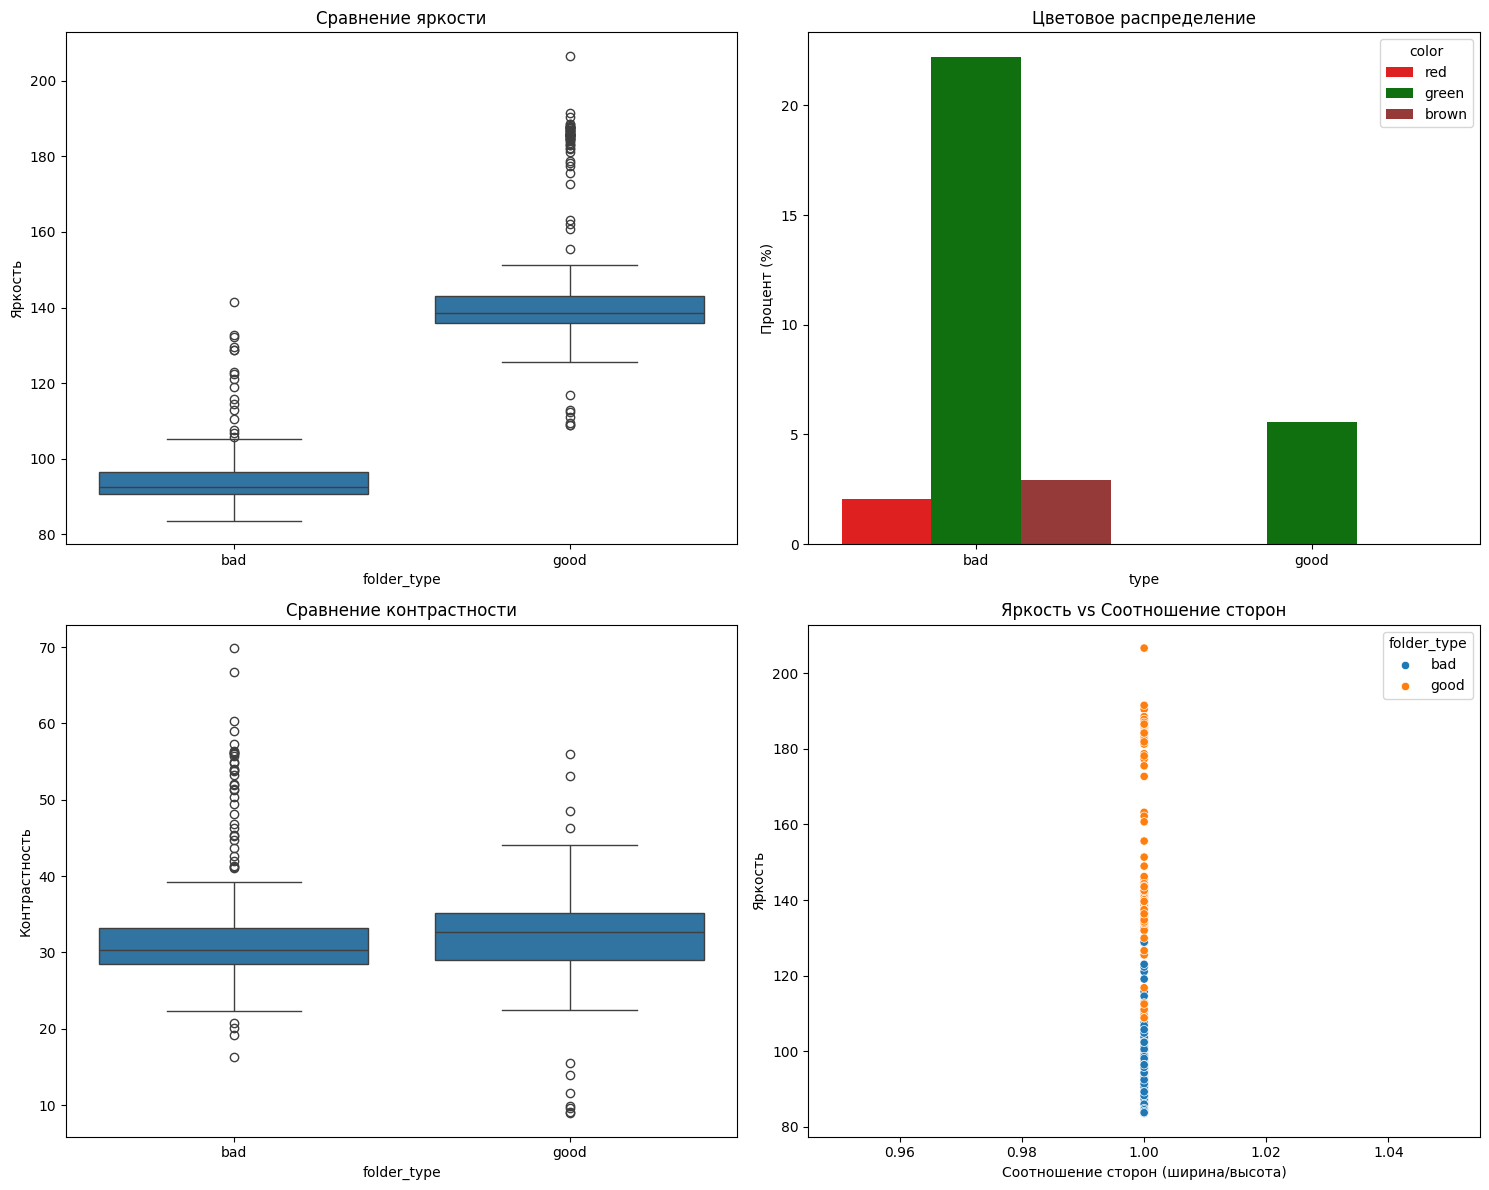

💾 Результаты для bad_vinograd сохранены
💾 Результаты для good_vinograd сохранены

🎉 АНАЛИЗ ЗАВЕРШЕН!


In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

# ⭐⭐⭐ НАСТРОЙКИ ⭐⭐⭐
OPENWEATHER_API_KEY = "f49c722c9235ceaf29014a098a8f4274"  # Ваш рабочий ключ
KRASNODAR_LAT = 45.0355  # Широта Краснодара
KRASNODAR_LON = 38.9750  # Долгота Краснодара

# Пути к папкам
FOLDER_BAD = "/content/drive/MyDrive/bad_vinograd"
FOLDER_GOOD = "/content/drive/MyDrive/good_vinograd"

def get_weather_data(timestamp=None):
    """
    Получает текущие погодные данные для Краснодара
    """
    try:
        url = f"https://api.openweathermap.org/data/2.5/weather?lat={KRASNODAR_LAT}&lon={KRASNODAR_LON}&appid={OPENWEATHER_API_KEY}&units=metric&lang=ru"

        response = requests.get(url, timeout=10)

        if response.status_code == 200:
            data = response.json()
            weather_info = {
                'temperature': data['main']['temp'],
                'humidity': data['main']['humidity'],
                'pressure': data['main']['pressure'],
                'wind_speed': data['wind']['speed'],
                'wind_deg': data['wind'].get('deg', 0),
                'clouds': data['clouds']['all'],
                'weather_main': data['weather'][0]['main'],
                'weather_description': data['weather'][0]['description'],
                'visibility': data.get('visibility', 10000),
                'city': data['name'],
                'api_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
            return weather_info
        else:
            print(f"❌ Ошибка API: {response.status_code}")
            return None

    except Exception as e:
        print(f"⚠️ Ошибка при получении погоды: {e}")
        return None

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла
    """
    try:
        # Формат: 2025_08_26_184958_00_bad
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()
            hour, minute, second = time_str[:2], time_str[2:4], time_str[4:6]

            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            return datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")

    except Exception as e:
        print(f"⚠️ Ошибка извлечения времени: {e}")

    return datetime.now()

def analyze_image_color(image_path):
    """
    Анализирует цветовые характеристики изображения
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Конвертируем BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Основные цветовые характеристики
    r_mean, g_mean, b_mean = np.mean(img_rgb, axis=(0, 1))
    r_std, g_std, b_std = np.std(img_rgb, axis=(0, 1))

    # Grayscale яркость
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_mean = np.mean(img_gray)
    gray_std = np.std(img_gray)

    # Цветовые особенности винограда
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Красные тона (спелый виноград)
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)
    red_percentage = np.sum(red_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # Зеленые тона (неспелый виноград)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)
    green_percentage = np.sum(green_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # Коричневые тона (порченый виноград)
    lower_brown = np.array([10, 50, 20])
    upper_brown = np.array([20, 255, 200])
    brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)
    brown_percentage = np.sum(brown_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    return {
        'brightness_r': r_mean,
        'brightness_g': g_mean,
        'brightness_b': b_mean,
        'brightness_overall': (r_mean + g_mean + b_mean) / 3,
        'contrast_r': r_std,
        'contrast_g': g_std,
        'contrast_b': b_std,
        'brightness_gray': gray_mean,
        'contrast_gray': gray_std,
        'red_percentage': red_percentage,
        'green_percentage': green_percentage,
        'brown_percentage': brown_percentage,
        'width': img.shape[1],
        'height': img.shape[0],
        'aspect_ratio': img.shape[1] / img.shape[0]
    }

def analyze_folder_with_weather(folder_path, folder_type):
    """
    Анализирует все изображения в папке с учетом погодных данных
    """
    import glob

    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    print(f"🔍 Анализирую {len(images)} изображений в папке: {folder_type}")

    all_data = []
    weather_data = get_weather_data()

    for i, image_path in enumerate(images, 1):
        filename = os.path.basename(image_path)
        timestamp = extract_timestamp_from_filename(filename)

        # Анализ изображения
        color_data = analyze_image_color(image_path)
        if not color_data:
            continue

        # Создаем запись
        record = {
            'filename': filename,
            'folder_type': folder_type,
            'timestamp': timestamp,
            'date': timestamp.date() if timestamp else datetime.now().date(),
            'time': timestamp.time() if timestamp else datetime.now().time(),
        }
        record.update(color_data)

        # Добавляем погодные данные
        if weather_data:
            record.update(weather_data)

        all_data.append(record)

        if i % 10 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    return pd.DataFrame(all_data)

def compare_folders_analysis(df_bad, df_good):
    """
    Сравнивает анализ двух папок
    """
    print("\n📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
    print("=" * 60)

    if df_bad is not None and not df_bad.empty:
        print(f"📁 ПЛОХОЙ виноград: {len(df_bad)} изображений")
        print(f"   🌟 Средняя яркость: {df_bad['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные тона: {df_bad['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые тона: {df_bad['green_percentage'].mean():.1f}%")
        print(f"   🟤 Коричневые тона: {df_bad['brown_percentage'].mean():.1f}%")

    if df_good is not None and not df_good.empty:
        print(f"\n📁 ХОРОШИЙ виноград: {len(df_good)} изображений")
        print(f"   🌟 Средняя яркость: {df_good['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные тона: {df_good['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые тона: {df_good['green_percentage'].mean():.1f}%")
        print(f"   🟤 Коричневые тона: {df_good['brown_percentage'].mean():.1f}%")

    # Сравнение
    if df_bad is not None and df_good is not None:
        print(f"\n📈 РАЗНИЦА:")
        print(f"   📊 Яркость: {df_good['brightness_overall'].mean() - df_bad['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные: {df_good['red_percentage'].mean() - df_bad['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые: {df_good['green_percentage'].mean() - df_bad['green_percentage'].mean():.1f}%")

def plot_comparison(df_bad, df_good):
    """
    Строит графики сравнения
    """
    if df_bad is None or df_good is None:
        return

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # График 1: Сравнение яркости
    sns.boxplot(x='folder_type', y='brightness_overall',
                data=pd.concat([df_bad, df_good]), ax=axes[0, 0])
    axes[0, 0].set_title('Сравнение яркости')
    axes[0, 0].set_ylabel('Яркость')

    # График 2: Цветовое распределение
    colors_data = []
    for df, ftype in [(df_bad, 'bad'), (df_good, 'good')]:
        colors_data.append({'type': ftype, 'color': 'red', 'value': df['red_percentage'].mean()})
        colors_data.append({'type': ftype, 'color': 'green', 'value': df['green_percentage'].mean()})
        colors_data.append({'type': ftype, 'color': 'brown', 'value': df['brown_percentage'].mean()})

    colors_df = pd.DataFrame(colors_data)
    sns.barplot(x='type', y='value', hue='color', data=colors_df,
                palette=['red', 'green', 'brown'], ax=axes[0, 1])
    axes[0, 1].set_title('Цветовое распределение')
    axes[0, 1].set_ylabel('Процент (%)')

    # График 3: Контрастность
    sns.boxplot(x='folder_type', y='contrast_gray',
                data=pd.concat([df_bad, df_good]), ax=axes[1, 0])
    axes[1, 0].set_title('Сравнение контрастности')
    axes[1, 0].set_ylabel('Контрастность')

    # График 4: Соотношение сторон
    sns.scatterplot(x='aspect_ratio', y='brightness_overall',
                   hue='folder_type', data=pd.concat([df_bad, df_good]),
                   ax=axes[1, 1])
    axes[1, 1].set_title('Яркость vs Соотношение сторон')
    axes[1, 1].set_xlabel('Соотношение сторон (ширина/высота)')
    axes[1, 1].set_ylabel('Яркость')

    plt.tight_layout()
    plt.show()

# ⭐⭐⭐ ЗАПУСК АНАЛИЗА ⭐⭐⭐

print("🌤️ ПОЛУЧЕНИЕ ПОГОДНЫХ ДАННЫХ ДЛЯ КРАСНОДАРА...")
weather_info = get_weather_data()
if weather_info:
    print(f"📍 Город: {weather_info['city']}")
    print(f"🌡️  Температура: {weather_info['temperature']}°C")
    print(f"💧 Влажность: {weather_info['humidity']}%")
    print(f"💨 Ветер: {weather_info['wind_speed']} м/с")
    print(f"☁️  Облачность: {weather_info['clouds']}%")
    print(f"🌤️  Погода: {weather_info['weather_description']}")
else:
    print("❌ Не удалось получить погодные данные")

print("\n" + "="*60)
print("📊 АНАЛИЗ ИЗОБРАЖЕНИЙ ВИНОГРАДА")
print("="*60)

# Анализируем обе папки
df_bad = analyze_folder_with_weather(FOLDER_BAD, "bad")
df_good = analyze_folder_with_weather(FOLDER_GOOD, "good")

# Сравниваем результаты
compare_folders_analysis(df_bad, df_good)

# Строим графики
if df_bad is not None and df_good is not None:
    print("\n📈 СТРОИМ ГРАФИКИ...")
    plot_comparison(df_bad, df_good)

# Сохраняем результаты
if df_bad is not None:
    df_bad.to_csv('/content/drive/MyDrive/bad_vinograd_analysis.csv', index=False)
    print("💾 Результаты для bad_vinograd сохранены")

if df_good is not None:
    df_good.to_csv('/content/drive/MyDrive/good_vinograd_analysis.csv', index=False)
    print("💾 Результаты для good_vinograd сохранены")

print("\n🎉 АНАЛИЗ ЗАВЕРШЕН!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🌤️ ПОЛУЧЕНИЕ ПОГОДНЫХ ДАННЫХ ДЛЯ КРАСНОДАРА...
📍 Город: Краснодар
🌡️  Температура: 17.21°C
💧 Влажность: 62%
💨 Ветер: 4 м/с
☁️  Облачность: 0%
🌤️  Погода: ясно

📊 АНАЛИЗ ИЗОБРАЖЕНИЙ ВИНОГРАДА
🔍 Анализирую 261 изображений в папке: bad
   📊 Обработано 10/261
   📊 Обработано 20/261
   📊 Обработано 30/261
   📊 Обработано 40/261
   📊 Обработано 50/261
   📊 Обработано 60/261
   📊 Обработано 70/261
   📊 Обработано 80/261
   📊 Обработано 90/261
   📊 Обработано 100/261
   📊 Обработано 110/261
   📊 Обработано 120/261
   📊 Обработано 130/261
   📊 Обработано 140/261
   📊 Обработано 150/261
   📊 Обработано 160/261
   📊 Обработано 170/261
   📊 Обработано 180/261
   📊 Обработано 190/261
   📊 Обработано 200/261
   📊 Обработано 210/261
   📊 Обработано 220/261
   📊 Обработано 230/261
   📊 Обработано 240/261
   📊 Обработано 250/261
   📊 Обработано 260/261
🔍 Анализирую 261 изобра

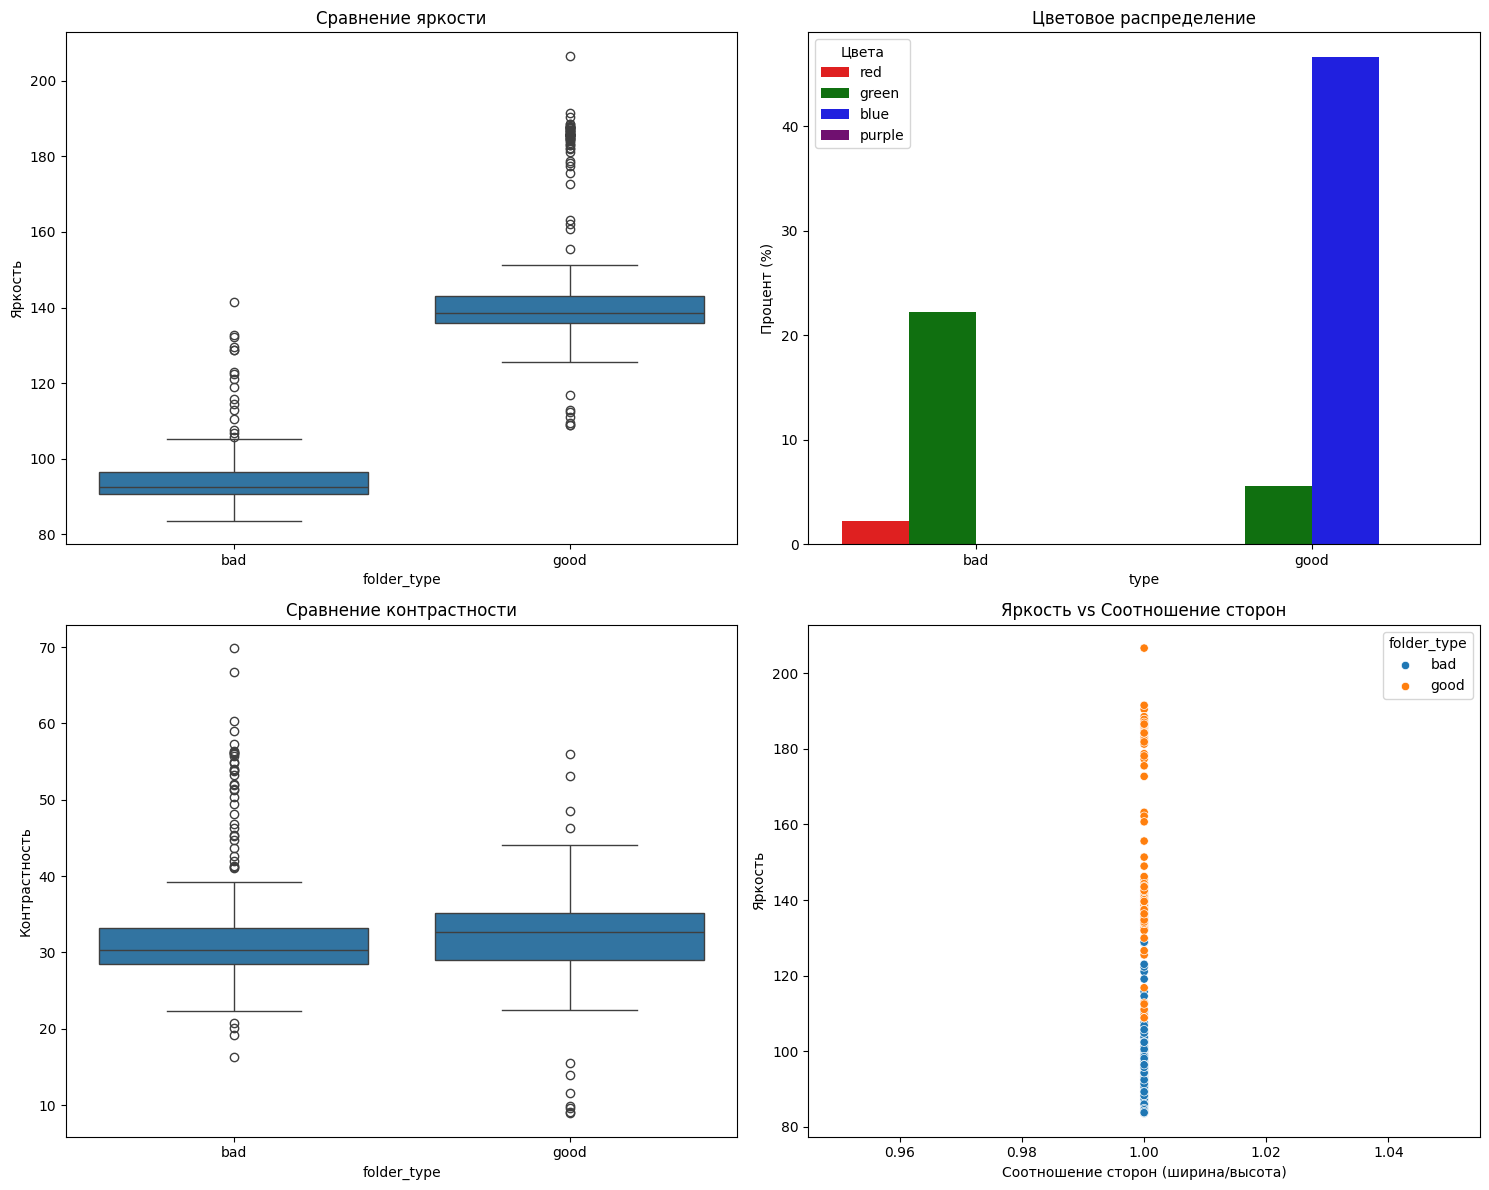

/tmp/ipython-input-309906124.py:339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Красный', 'Зеленый', 'Синий', 'Фиолетовый', 'Желтый'])


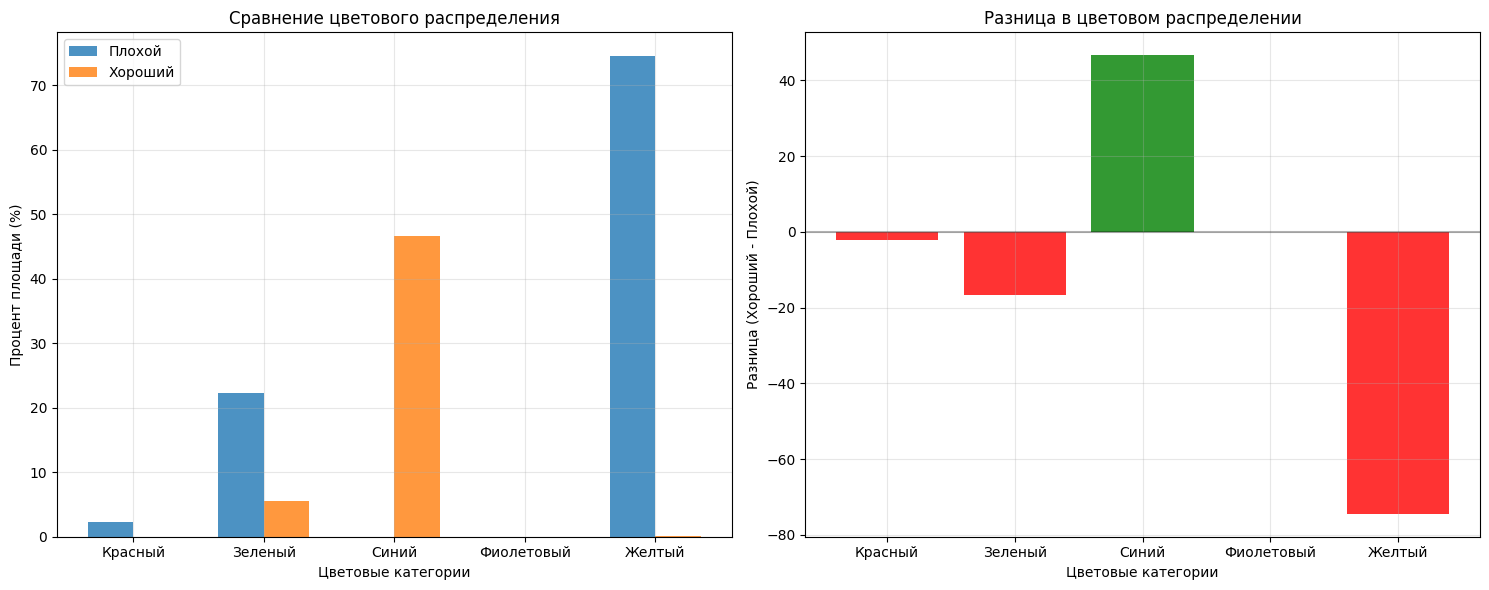


🌤️ АНАЛИЗ КОРРЕЛЯЦИЙ С ПОГОДНЫМИ УСЛОВИЯМИ:


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


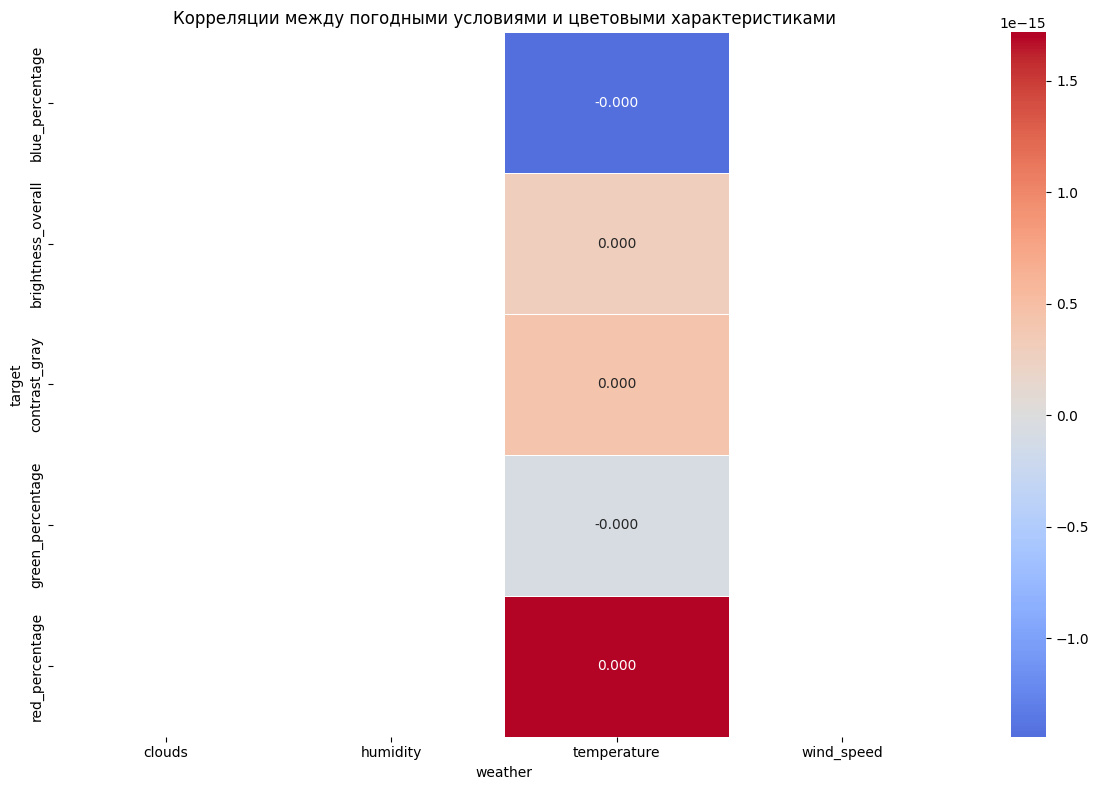


📶 ЗНАЧИМЫЕ КОРРЕЛЯЦИИ (|r| > 0.3):
   Нет значимых корреляций

🎯 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
🔵 СИНИЕ ТОНА (восковой налет):
   Плохой виноград: 0.0% - Очень низкое содержание синих тонов - возможно недозрелый виноград
   Хороший виноград: 46.7% - Очень высокое содержание синих тонов - возможна переспелость
🔴 Красные тона: Плохой виноград имеет на 2.3% больше красных тонов
🟢 Зеленые тона: Плохой виноград имеет на 16.6% больше зеленых тонов
🌟 Яркость: Хороший виноград на 51.7 единиц ярче
💾 Результаты для bad_vinograd сохранены: /content/drive/MyDrive/bad_vinograd_analysis_20250911_224128.csv
💾 Результаты для good_vinograd сохранены: /content/drive/MyDrive/good_vinograd_analysis_20250911_224128.csv
💾 Объединенные результаты сохранены: /content/drive/MyDrive/combined_analysis_20250911_224128.csv

🎉 АНАЛИЗ ЗАВЕРШЕН!
📋 Сводка результатов сохранена в Google Диске
📊 Графики показывают различия между хорошим и плохим виноградом
🔵 Синие тона указывают на наличие воскового налета (признак качеств

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import requests
import glob
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

# ⭐⭐⭐ НАСТРОЙКИ ⭐⭐⭐
OPENWEATHER_API_KEY = "e2f37603c3d76e67f94bfa23bf617b48"  # Ваш рабочий ключ
KRASNODAR_LAT = 45.0355  # Широта Краснодара
KRASNODAR_LON = 38.9750  # Долгота Краснодара

# Пути к папкам
FOLDER_BAD = "/content/drive/MyDrive/bad_vinograd"
FOLDER_GOOD = "/content/drive/MyDrive/good_vinograd"

def get_weather_data():
    """
    Получает текущие погодные данные для Краснодара
    """
    try:
        url = f"https://api.openweathermap.org/data/2.5/weather?lat={KRASNODAR_LAT}&lon={KRASNODAR_LON}&appid={OPENWEATHER_API_KEY}&units=metric&lang=ru"

        response = requests.get(url, timeout=10)

        if response.status_code == 200:
            data = response.json()
            weather_info = {
                'temperature': data['main']['temp'],
                'humidity': data['main']['humidity'],
                'pressure': data['main']['pressure'],
                'wind_speed': data['wind']['speed'],
                'wind_deg': data['wind'].get('deg', 0),
                'clouds': data['clouds']['all'],
                'weather_main': data['weather'][0]['main'],
                'weather_description': data['weather'][0]['description'],
                'visibility': data.get('visibility', 10000),
                'city': data['name'],
                'api_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            }
            return weather_info
        else:
            print(f"❌ Ошибка API: {response.status_code}")
            return None

    except Exception as e:
        print(f"⚠️ Ошибка при получении погоды: {e}")
        return None

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()
            hour, minute, second = time_str[:2], time_str[2:4], time_str[4:6]

            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            return datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")

    except Exception as e:
        print(f"⚠️ Ошибка извлечения времени: {e}")

    return datetime.now()

def analyze_image_color(image_path):
    """
    Анализирует цветовые характеристики изображения с СИНИМИ тонами
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Конвертируем BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Основные цветовые характеристики
    r_mean, g_mean, b_mean = np.mean(img_rgb, axis=(0, 1))
    r_std, g_std, b_std = np.std(img_rgb, axis=(0, 1))

    # Grayscale яркость
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_mean = np.mean(img_gray)
    gray_std = np.std(img_gray)

    # Цветовые особенности винограда в HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 🔴 Красные тона (спелый виноград)
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(red_mask1, red_mask2)
    red_percentage = np.sum(red_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # 🟢 Зеленые тона (неспелый виноград)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)
    green_percentage = np.sum(green_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # 🔵 СИНИЕ тона (здоровый восковой налет, спелость)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    blue_percentage = np.sum(blue_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # 🟣 Фиолетовые тона (спелость)
    lower_purple = np.array([140, 50, 50])
    upper_purple = np.array([160, 255, 255])
    purple_mask = cv2.inRange(hsv, lower_purple, upper_purple)
    purple_percentage = np.sum(purple_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    # 🟡 Желтые тона (переспелость или болезнь)
    lower_yellow = np.array([20, 50, 50])
    upper_yellow = np.array([35, 255, 255])
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    yellow_percentage = np.sum(yellow_mask > 0) / (img.shape[0] * img.shape[1]) * 100

    return {
        'brightness_r': r_mean,
        'brightness_g': g_mean,
        'brightness_b': b_mean,
        'brightness_overall': (r_mean + g_mean + b_mean) / 3,
        'contrast_r': r_std,
        'contrast_g': g_std,
        'contrast_b': b_std,
        'brightness_gray': gray_mean,
        'contrast_gray': gray_std,
        'red_percentage': red_percentage,
        'green_percentage': green_percentage,
        'blue_percentage': blue_percentage,
        'purple_percentage': purple_percentage,
        'yellow_percentage': yellow_percentage,
        'width': img.shape[1],
        'height': img.shape[0],
        'aspect_ratio': img.shape[1] / img.shape[0],
        'total_pixels': img.shape[0] * img.shape[1]
    }

def analyze_folder_with_weather(folder_path, folder_type):
    """
    Анализирует все изображения в папке с учетом погодных данных
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    print(f"🔍 Анализирую {len(images)} изображений в папке: {folder_type}")

    all_data = []
    weather_data = get_weather_data()

    for i, image_path in enumerate(images, 1):
        filename = os.path.basename(image_path)
        timestamp = extract_timestamp_from_filename(filename)

        # Анализ изображения
        color_data = analyze_image_color(image_path)
        if not color_data:
            continue

        # Создаем запись
        record = {
            'filename': filename,
            'folder_type': folder_type,
            'timestamp': timestamp,
            'date': timestamp.date() if timestamp else datetime.now().date(),
            'time': timestamp.time() if timestamp else datetime.now().time(),
        }
        record.update(color_data)

        # Добавляем погодные данные
        if weather_data:
            record.update(weather_data)

        all_data.append(record)

        if i % 10 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    return pd.DataFrame(all_data)

def compare_folders_analysis(df_bad, df_good):
    """
    Сравнивает анализ двух папок с СИНИМИ тонами
    """
    print("\n📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
    print("=" * 60)

    if df_bad is not None and not df_bad.empty:
        print(f"📁 ПЛОХОЙ виноград: {len(df_bad)} изображений")
        print(f"   🌟 Средняя яркость: {df_bad['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные тона: {df_bad['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые тона: {df_bad['green_percentage'].mean():.1f}%")
        print(f"   🔵 СИНИЕ тона: {df_bad['blue_percentage'].mean():.1f}%")
        print(f"   🟣 Фиолетовые: {df_bad['purple_percentage'].mean():.1f}%")
        print(f"   🟡 Желтые: {df_bad['yellow_percentage'].mean():.1f}%")

    if df_good is not None and not df_good.empty:
        print(f"\n📁 ХОРОШИЙ виноград: {len(df_good)} изображений")
        print(f"   🌟 Средняя яркость: {df_good['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные: {df_good['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые: {df_good['green_percentage'].mean():.1f}%")
        print(f"   🔵 СИНИЕ: {df_good['blue_percentage'].mean():.1f}%")
        print(f"   🟣 Фиолетовые: {df_good['purple_percentage'].mean():.1f}%")
        print(f"   🟡 Желтые: {df_good['yellow_percentage'].mean():.1f}%")

    # Сравнение
    if df_bad is not None and df_good is not None:
        print(f"\n📈 РАЗНИЦА (ХОРОШИЙ - ПЛОХОЙ):")
        print(f"   📊 Яркость: {df_good['brightness_overall'].mean() - df_bad['brightness_overall'].mean():.2f}")
        print(f"   🔴 Красные: {df_good['red_percentage'].mean() - df_bad['red_percentage'].mean():.1f}%")
        print(f"   🟢 Зеленые: {df_good['green_percentage'].mean() - df_bad['green_percentage'].mean():.1f}%")
        print(f"   🔵 СИНИЕ: {df_good['blue_percentage'].mean() - df_bad['blue_percentage'].mean():.1f}%")
        print(f"   🟣 Фиолетовые: {df_good['purple_percentage'].mean() - df_bad['purple_percentage'].mean():.1f}%")
        print(f"   🟡 Желтые: {df_good['yellow_percentage'].mean() - df_bad['yellow_percentage'].mean():.1f}%")

def plot_comparison(df_bad, df_good):
    """
    Строит графики сравнения
    """
    if df_bad is None or df_good is None:
        return

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # График 1: Сравнение яркости
    sns.boxplot(x='folder_type', y='brightness_overall',
                data=pd.concat([df_bad, df_good]), ax=axes[0, 0])
    axes[0, 0].set_title('Сравнение яркости')
    axes[0, 0].set_ylabel('Яркость')

    # График 2: Цветовое распределение
    colors_data = []
    for df, ftype in [(df_bad, 'bad'), (df_good, 'good')]:
        colors_data.append({'type': ftype, 'color': 'red', 'value': df['red_percentage'].mean()})
        colors_data.append({'type': ftype, 'color': 'green', 'value': df['green_percentage'].mean()})
        colors_data.append({'type': ftype, 'color': 'blue', 'value': df['blue_percentage'].mean()})
        colors_data.append({'type': ftype, 'color': 'purple', 'value': df['purple_percentage'].mean()})

    colors_df = pd.DataFrame(colors_data)
    sns.barplot(x='type', y='value', hue='color', data=colors_df,
                palette=['red', 'green', 'blue', 'purple'], ax=axes[0, 1])
    axes[0, 1].set_title('Цветовое распределение')
    axes[0, 1].set_ylabel('Процент (%)')
    axes[0, 1].legend(title='Цвета')

    # График 3: Контрастность
    sns.boxplot(x='folder_type', y='contrast_gray',
                data=pd.concat([df_bad, df_good]), ax=axes[1, 0])
    axes[1, 0].set_title('Сравнение контрастности')
    axes[1, 0].set_ylabel('Контрастность')

    # График 4: Соотношение сторон
    sns.scatterplot(x='aspect_ratio', y='brightness_overall',
                   hue='folder_type', data=pd.concat([df_bad, df_good]),
                   ax=axes[1, 1])
    axes[1, 1].set_title('Яркость vs Соотношение сторон')
    axes[1, 1].set_xlabel('Соотношение сторон (ширина/высота)')
    axes[1, 1].set_ylabel('Яркость')

    plt.tight_layout()
    plt.show()

def plot_color_comparison(df_bad, df_good):
    """
    Строит графики сравнения цветов с СИНИМ тоном
    """
    if df_bad is None or df_good is None:
        return

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Данные для графиков
    color_categories = ['red', 'green', 'blue', 'purple', 'yellow']

    bad_means = [
        df_bad['red_percentage'].mean(),
        df_bad['green_percentage'].mean(),
        df_bad['blue_percentage'].mean(),
        df_bad['purple_percentage'].mean(),
        df_bad['yellow_percentage'].mean()
    ]

    good_means = [
        df_good['red_percentage'].mean(),
        df_good['green_percentage'].mean(),
        df_good['blue_percentage'].mean(),
        df_good['purple_percentage'].mean(),
        df_good['yellow_percentage'].mean()
    ]

    # График 1: Сравнение средних значений
    x = np.arange(len(color_categories))
    width = 0.35

    axes[0].bar(x - width/2, bad_means, width, label='Плохой', alpha=0.8)
    axes[0].bar(x + width/2, good_means, width, label='Хороший', alpha=0.8)
    axes[0].set_xlabel('Цветовые категории')
    axes[0].set_ylabel('Процент площади (%)')
    axes[0].set_title('Сравнение цветового распределения')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(['Красный', 'Зеленый', 'Синий', 'Фиолетовый', 'Желтый'])
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # График 2: Разница между хорошим и плохим
    differences = [g - b for g, b in zip(good_means, bad_means)]
    colors_diff = ['green' if diff > 0 else 'red' for diff in differences]

    axes[1].bar(color_categories, differences, color=colors_diff, alpha=0.8)
    axes[1].set_xlabel('Цветовые категории')
    axes[1].set_ylabel('Разница (Хороший - Плохой)')
    axes[1].set_title('Разница в цветовом распределении')
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1].set_xticklabels(['Красный', 'Зеленый', 'Синий', 'Фиолетовый', 'Желтый'])
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_weather_correlations(df):
    """
    Анализирует корреляции между погодными условиями и цветовыми характеристиками
    """
    if df is None or df.empty:
        return

    # Проверяем наличие погодных данных
    weather_cols = ['temperature', 'humidity', 'wind_speed', 'clouds']
    if not all(col in df.columns for col in weather_cols):
        print("❌ Нет данных о погоде для анализа корреляций")
        return

    print("\n🌤️ АНАЛИЗ КОРРЕЛЯЦИЙ С ПОГОДНЫМИ УСЛОВИЯМИ:")
    print("=" * 50)

    # Целевые переменные для анализа
    target_vars = ['brightness_overall', 'red_percentage', 'green_percentage',
                  'blue_percentage', 'contrast_gray']

    # Считаем корреляции
    correlation_results = []
    for target in target_vars:
        if target in df.columns:
            for weather_var in weather_cols:
                if weather_var in df.columns:
                    correlation = df[target].corr(df[weather_var])
                    correlation_results.append({
                        'target': target,
                        'weather': weather_var,
                        'correlation': correlation
                    })

    # Создаем датафрейм с результатами
    corr_df = pd.DataFrame(correlation_results)

    # Визуализация корреляций
    if not corr_df.empty:
        plt.figure(figsize=(12, 8))
        pivot_df = corr_df.pivot(index='target', columns='weather', values='correlation')
        sns.heatmap(pivot_df, annot=True, cmap='coolwarm', center=0,
                   fmt='.3f', linewidths=0.5)
        plt.title('Корреляции между погодными условиями и цветовыми характеристиками')
        plt.tight_layout()
        plt.show()

        # Выводим значимые корреляции
        print("\n📶 ЗНАЧИМЫЕ КОРРЕЛЯЦИИ (|r| > 0.3):")
        significant_corr = corr_df[abs(corr_df['correlation']) > 0.3]
        if not significant_corr.empty:
            for _, row in significant_corr.iterrows():
                strength = "сильная" if abs(row['correlation']) > 0.6 else "умеренная"
                direction = "положительная" if row['correlation'] > 0 else "отрицательная"
                print(f"   {row['target']} ↔ {row['weather']}: {row['correlation']:.3f} ({strength} {direction})")
        else:
            print("   Нет значимых корреляций")

def save_analysis_results(df_bad, df_good):
    """
    Сохраняет результаты анализа в CSV файлы
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    if df_bad is not None and not df_bad.empty:
        bad_output_path = f'/content/drive/MyDrive/bad_vinograd_analysis_{timestamp}.csv'
        df_bad.to_csv(bad_output_path, index=False, encoding='utf-8')
        print(f"💾 Результаты для bad_vinograd сохранены: {bad_output_path}")

    if df_good is not None and not df_good.empty:
        good_output_path = f'/content/drive/MyDrive/good_vinograd_analysis_{timestamp}.csv'
        df_good.to_csv(good_output_path, index=False, encoding='utf-8')
        print(f"💾 Результаты для good_vinograd сохранены: {good_output_path}")

    # Сохраняем объединенный датафрейм для сравнения
    if df_bad is not None and df_good is not None:
        combined_df = pd.concat([df_bad, df_good], ignore_index=True)
        combined_path = f'/content/drive/MyDrive/combined_analysis_{timestamp}.csv'
        combined_df.to_csv(combined_path, index=False, encoding='utf-8')
        print(f"💾 Объединенные результаты сохранены: {combined_path}")

def interpret_blue_coverage(blue_percentage):
    """
    Интерпретирует процент синих тонов во винограде
    """
    if blue_percentage < 2:
        return "Очень низкое содержание синих тонов - возможно недозрелый виноград"
    elif blue_percentage < 5:
        return "Низкое содержание синих тонов - начальная стадия спелости"
    elif blue_percentage < 10:
        return "Умеренное содержание синих тонов - нормальная спелость"
    elif blue_percentage < 15:
        return "Высокое содержание синих тонов - отличная спелость"
    else:
        return "Очень высокое содержание синих тонов - возможна переспелость"

def print_interpretation(df_bad, df_good):
    """
    Выводит интерпретацию результатов анализа
    """
    if df_bad is None or df_good is None:
        return

    print("\n🎯 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
    print("=" * 50)

    # Средние значения по папкам
    bad_blue_mean = df_bad['blue_percentage'].mean()
    good_blue_mean = df_good['blue_percentage'].mean()

    print(f"🔵 СИНИЕ ТОНА (восковой налет):")
    print(f"   Плохой виноград: {bad_blue_mean:.1f}% - {interpret_blue_coverage(bad_blue_mean)}")
    print(f"   Хороший виноград: {good_blue_mean:.1f}% - {interpret_blue_coverage(good_blue_mean)}")

    # Разница в красных тонах
    red_diff = df_good['red_percentage'].mean() - df_bad['red_percentage'].mean()
    if red_diff > 0:
        print(f"🔴 Красные тона: Хороший виноград имеет на {red_diff:.1f}% больше красных тонов")
    else:
        print(f"🔴 Красные тона: Плохой виноград имеет на {abs(red_diff):.1f}% больше красных тонов")

    # Разница в зеленых тонах
    green_diff = df_good['green_percentage'].mean() - df_bad['green_percentage'].mean()
    if green_diff > 0:
        print(f"🟢 Зеленые тона: Хороший виноград имеет на {green_diff:.1f}% больше зеленых тонов")
    else:
        print(f"🟢 Зеленые тона: Плохой виноград имеет на {abs(green_diff):.1f}% больше зеленых тонов")

    # Яркость
    brightness_diff = df_good['brightness_overall'].mean() - df_bad['brightness_overall'].mean()
    if brightness_diff > 0:
        print(f"🌟 Яркость: Хороший виноград на {brightness_diff:.1f} единиц ярче")
    else:
        print(f"🌟 Яркость: Плохой виноград на {abs(brightness_diff):.1f} единиц ярче")

# ⭐⭐⭐ ЗАПУСК АНАЛИЗА ⭐⭐⭐

print("🌤️ ПОЛУЧЕНИЕ ПОГОДНЫХ ДАННЫХ ДЛЯ КРАСНОДАРА...")
weather_info = get_weather_data()
if weather_info:
    print(f"📍 Город: {weather_info['city']}")
    print(f"🌡️  Температура: {weather_info['temperature']}°C")
    print(f"💧 Влажность: {weather_info['humidity']}%")
    print(f"💨 Ветер: {weather_info['wind_speed']} м/с")
    print(f"☁️  Облачность: {weather_info['clouds']}%")
    print(f"🌤️  Погода: {weather_info['weather_description']}")
else:
    print("❌ Не удалось получить погодные данные")

print("\n" + "="*60)
print("📊 АНАЛИЗ ИЗОБРАЖЕНИЙ ВИНОГРАДА")
print("="*60)

# Анализируем обе папки
df_bad = analyze_folder_with_weather(FOLDER_BAD, "bad")
df_good = analyze_folder_with_weather(FOLDER_GOOD, "good")

# Сравниваем результаты
compare_folders_analysis(df_bad, df_good)

# Строим графики
if df_bad is not None and df_good is not None:
    print("\n📈 СТРОИМ ГРАФИКИ...")
    plot_comparison(df_bad, df_good)
    plot_color_comparison(df_bad, df_good)

    # Анализ корреляций с погодой
    combined_df = pd.concat([df_bad, df_good])
    plot_weather_correlations(combined_df)

    # Интерпретация результатов
    print_interpretation(df_bad, df_good)

# Сохраняем результаты
save_analysis_results(df_bad, df_good)

print("\n🎉 АНАЛИЗ ЗАВЕРШЕН!")
print("="*60)
print("📋 Сводка результатов сохранена в Google Диске")
print("📊 Графики показывают различия между хорошим и плохим виноградом")
print("🔵 Синие тона указывают на наличие воскового налета (признак качества)")
print("🌤️ Погодные данные могут влиять на цветовые характеристики")

# Дополнительная статистика
if df_bad is not None and df_good is not None:
    print(f"\n📈 СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:")
    from scipy import stats

    # T-тест для синих тонов
    t_stat, p_value = stats.ttest_ind(df_good['blue_percentage'], df_bad['blue_percentage'])
    print(f"   🔵 Синие тона: p-value = {p_value:.4f} {'✅' if p_value < 0.05 else '❌'}")

    # T-тест для яркости
    t_stat, p_value = stats.ttest_ind(df_good['brightness_overall'], df_bad['brightness_overall'])
    print(f"   🌟 Яркость: p-value = {p_value:.4f} {'✅' if p_value < 0.05 else '❌'}")

    if p_value < 0.05:
        print("   📊 Различия статистически значимы (p < 0.05)")
    else:
        print("   📊 Различия не являются статистически значимыми")



In [ ]:
# Установка необходимых библиотек
!apt update &> /dev/null
!apt install -y ffmpeg &> /dev/null
!pip install tqdm &> /dev/null

# Импорт библиотек
import os
import re
from datetime import datetime
from PIL import Image
import subprocess
from tqdm import tqdm
import time

def create_video_from_timestamped_images(image_folder, output_video="output_video.mp4", fps=25, duration_per_frame_sec=None):
    """
    Создает видео из изображений, отсортированных по временной метке в имени файла.

    Args:
        image_folder (str): Путь к папке с изображениями.
        output_video (str): Имя выходного видеофайла.
        fps (int): Количество кадров в секунду. Если не задана длительность кадра, определяет скорость видео.
        duration_per_frame_sec (float): Длительность показа каждого кадра в секундах.
                                       Если None, длительность определяется из fps (1/fps).
    """

    print("🔍 Начинаю обработку изображений...")
    time.sleep(0.5)  # Небольшая пауза для лучшего отображения прогресса

    # Получаем список всех файлов изображений
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')
    all_files = [f for f in os.listdir(image_folder) if f.lower().endswith(image_extensions)]

    # Функция для извлечения временной метки из имени файла
    def extract_timestamp(filename):
        # Ищем шаблон ГГГГ_ММ_ДД_ЧЧММСС_XX
        match = re.search(r'(\d{4})_(\d{2})_(\d{2})_(\d{2})(\d{2})(\d{2})_(\d+)', filename)
        if match:
            # Преобразуем найденные группы в объект datetime для корректной сортировки
            year, month, day, hour, minute, sec, millisec = map(int, match.groups())
            # Создаем строку для парсинга (миллисекунды добавляем как микросекунды)
            time_str = f"{year:04d}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}:{sec:02d}.{millisec:02d}"
            try:
                return datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
            except ValueError:
                # Если не удалось распарсить, возвращаем 0 для сортировки в конце
                return datetime.min
        # Если метка не найдена, используем минимальную дату
        return datetime.min

    # Сортируем файлы по временной метке
    sorted_files = sorted(all_files, key=extract_timestamp)

    if not sorted_files:
        print("❌ В указанной папке не найдено изображений с подходящими временными метками.")
        return

    print(f"✅ Найдено {len(sorted_files)} изображений")
    print("📋 Первые 5 файлов в порядке видео:")
    for i, filename in enumerate(sorted_files[:5]):
        print(f"   {i+1}. {filename}")
    if len(sorted_files) > 5:
        print(f"   ... и еще {len(sorted_files) - 5} файлов")
    print()

    # Создаем временную папку для обработанных изображений
    temp_folder = "/tmp/video_frames"
    os.makedirs(temp_folder, exist_ok=True)

    # Обрабатываем изображения (приводим к одному размеру) с прогресс-баром
    print("🖼️ Обработка изображений...")
    processed_files = []
    errors = 0

    # Прогресс-бар для обработки изображений
    with tqdm(total=len(sorted_files), desc="Обработка", unit="img", ncols=80) as pbar:
        for i, filename in enumerate(sorted_files):
            img_path = os.path.join(image_folder, filename)
            output_path = os.path.join(temp_folder, f"frame_{i:06d}.jpg")

            try:
                with Image.open(img_path) as img:
                    # Приводим к стандартному размеру (Full HD)
                    img = img.resize((1920, 1080), Image.LANCZOS)
                    img.save(output_path, "JPEG", quality=95)
                processed_files.append(output_path)
                pbar.set_postfix(file=filename[:20] + "..." if len(filename) > 20 else filename, errors=errors)
            except Exception as e:
                errors += 1
                pbar.set_postfix(error=f"Ошибка в {filename}", errors=errors)
            finally:
                pbar.update(1)

    if errors > 0:
        print(f"⚠️  Обработано с ошибками: {errors} файлов")

    # Создаем список файлов для FFmpeg
    print("📝 Создание списка файлов для видео...")
    list_file_path = "/tmp/file_list.txt"
    with open(list_file_path, 'w') as f:
        for file_path in processed_files:
            f.write(f"file '{file_path}'\n")

    # Определяем параметры длительности кадра
    if duration_per_frame_sec is not None:
        frame_duration_opt = f"-framerate {1/duration_per_frame_sec}"
    else:
        frame_duration_opt = f"-framerate {fps}"

    # Команда для создания видео с помощью FFmpeg
    ffmpeg_cmd = [
        'ffmpeg', '-y',
        '-f', 'concat',
        '-safe', '0',
        '-i', list_file_path,
        '-vf', 'fps=25,format=yuv420p',
        '-c:v', 'libx264',
        '-preset', 'medium',
        '-crf', '23',
        '-pix_fmt', 'yuv420p',
        output_video
    ]

    # Запускаем FFmpeg с индикацией прогресса
    print("🎬 Создание видео...")
    print("   Это может занять несколько минут в зависимости от количества изображений")
    print("   Статус: Идет кодирование...")

    # Запускаем процесс FFmpeg
    process = subprocess.Popen(
        ffmpeg_cmd,
        stderr=subprocess.PIPE,
        universal_newlines=True
    )

    # Ждем завершения и отслеживаем прогресс
    while True:
        if process.poll() is not None:
            break
        # Просто показываем, что процесс идет
        print("   🎥 Кодирование продолжается...", end='\r')
        time.sleep(2)

    # Получаем результат
    _, stderr = process.communicate()

    if process.returncode == 0:
        video_size = os.path.getsize(output_video) / (1024*1024)
        print(f"\n✅ Видео успешно создано!")
        print(f"   📁 Файл: {output_video}")
        print(f"   📊 Размер: {video_size:.2f} MB")
        print(f"   🖼️  Кадров: {len(processed_files)}")
        print(f"   ⏱️  Примерная длительность: {len(processed_files)/fps:.1f} секунд")
    else:
        print("\n❌ Ошибка при создании видео:")
        print(stderr[-500:])  # Показываем только последние 500 символов ошибки

    # Очистка временных файлов
    print("🧹 Очистка временных файлов...")
    for file in processed_files:
        try:
            os.remove(file)
        except:
            pass
    try:
        os.remove(list_file_path)
        os.rmdir(temp_folder)
    except:
        pass

    print("✨ Процесс завершен!")

# ЗАПУСТИТЕ ЭТУ ЯЧЕЙКУ ДЛЯ СОЗДАНИЯ ВИДЕО
# Укажите путь к вашей папке с фотографиями

# Настройки видео:
input_folder = "/content/drive/MyDrive/Yablon27082025Vinograd-20250909T114626Z-1-002/Yablon27082025Vinograd"  # ПУТЬ К ВАШЕЙ ПАПКЕ С ФОТОГРАФИЯМИ
output_filename = "my_timelapse.mp4"   # Имя выходного файла
frames_per_second = 25                 # Количество кадров в секунду
# duration_per_frame = 3.0             # Раскомментируйте для указания длительности кадра в секундах

print("=" * 50)
print("🚀 ЗАПУСК СОЗДАНИЯ ВИДЕО")
print("=" * 50)
print(f"📁 Папка с изображениями: {input_folder}")
print(f"🎯 Выходной файл: {output_filename}")
print(f"📊 FPS: {frames_per_second}")
print("=" * 50)

# Запускаем создание видео
create_video_from_timestamped_images(
    image_folder=input_folder,
    output_video=output_filename,
    fps=frames_per_second,
    # duration_per_frame_sec=duration_per_frame  # Раскомментируйте, если используете
)

# СКАЧАТЬ ГОТОВОЕ ВИДЕО
if os.path.exists(output_filename):
    print("\n📥 Скачивание готового видео...")
    from google.colab import files
    files.download(output_filename)
else:
    print("\n❌ Видеофайл не был создан, скачивание невозможно.")

🚀 ЗАПУСК СОЗДАНИЯ ВИДЕО
📁 Папка с изображениями: /content/drive/MyDrive/Yablon27082025Vinograd-20250909T114626Z-1-002/Yablon27082025Vinograd
🎯 Выходной файл: my_timelapse.mp4
📊 FPS: 25
🔍 Начинаю обработку изображений...
✅ Найдено 945 изображений
📋 Первые 5 файлов в порядке видео:
   1. 2025_08_26_024242_00.JPG
   2. 2025_08_26_024344_00.JPG
   3. 2025_08_26_024652_00.JPG
   4. 2025_08_26_024755_00.JPG
   5. 2025_08_26_024858_00.JPG
   ... и еще 940 файлов

🖼️ Обработка изображений...


Обработка: 100%|█| 945/945 [17:08<00:00,  1.09s/img, error=Ошибка в 2025_08_26_2


⚠️  Обработано с ошибками: 1 файлов
📝 Создание списка файлов для видео...
🎬 Создание видео...
   Это может занять несколько минут в зависимости от количества изображений
   Статус: Идет кодирование...

✅ Видео успешно создано!
   📁 Файл: my_timelapse.mp4
   📊 Размер: 85.27 MB
   🖼️  Кадров: 944
   ⏱️  Примерная длительность: 37.8 секунд
🧹 Очистка временных файлов...
✨ Процесс завершен!

📥 Скачивание готового видео...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import re
from google.colab import drive
from PIL import Image, ImageDraw, ImageFont
import io

# Подключаем Google Диск
drive.mount('/content/drive')

# Пути к папкам
FOLDER_BAD = "/content/drive/MyDrive/bad_vinograd"
FOLDER_GOOD = "/content/drive/MyDrive/good_vinograd"
OUTPUT_VIDEO = "/content/drive/MyDrive/comparison_rgb_video.mp4"

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()
            hour, minute, second = time_str[:2], time_str[2:4], time_str[4:6]

            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            return datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")

    except Exception as e:
        print(f"⚠️ Ошибка извлечения времени: {e}")

    return None

def get_image_files_sorted_by_time(folder_path):
    """
    Получает все изображения из папки и сортирует по времени
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    # Сортируем по времени из названия файла
    images_with_time = []
    for image_path in images:
        filename = os.path.basename(image_path)
        timestamp = extract_timestamp_from_filename(filename)
        if timestamp:
            images_with_time.append((image_path, timestamp, filename))
        else:
            # Если нет временной метки, используем время изменения файла
            try:
                timestamp = datetime.fromtimestamp(os.path.getmtime(image_path))
                images_with_time.append((image_path, timestamp, filename))
            except:
                pass

    # Сортируем по времени
    images_with_time.sort(key=lambda x: x[1])

    return images_with_time

def analyze_image_rgb(image_path):
    """
    Анализирует RGB гистограмму изображения
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Конвертируем BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем гистограммы для каждого канала
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Нормализуем гистограммы
    if hist_r.max() > 0:
        hist_r = hist_r / hist_r.max()
    if hist_g.max() > 0:
        hist_g = hist_g / hist_g.max()
    if hist_b.max() > 0:
        hist_b = hist_b / hist_b.max()

    # Средние значения
    r_mean, g_mean, b_mean = np.mean(img_rgb, axis=(0, 1))

    return {
        'hist_r': hist_r.flatten(),
        'hist_g': hist_g.flatten(),
        'hist_b': hist_b.flatten(),
        'r_mean': r_mean,
        'g_mean': g_mean,
        'b_mean': b_mean,
        'width': img.shape[1],
        'height': img.shape[0],
        'image_array': img_rgb  # Сохраняем само изображение
    }

def find_matching_images_by_time(bad_images, good_images, time_tolerance_minutes=30):
    """
    Находит парные изображения по времени с допуском
    """
    paired_images = []

    for bad_path, bad_time, bad_name in bad_images:
        # Ищем ближайшее по времени изображение из good папки
        closest_good = None
        min_time_diff = float('inf')

        for good_path, good_time, good_name in good_images:
            time_diff = abs((bad_time - good_time).total_seconds())
            if time_diff < min_time_diff:
                min_time_diff = time_diff
                closest_good = (good_path, good_time, good_name)

        # Если нашли пару с допустимой разницей во времени
        if closest_good and min_time_diff <= time_tolerance_minutes * 60:
            paired_images.append({
                'bad': (bad_path, bad_time, bad_name),
                'good': closest_good,
                'time_difference': min_time_diff / 60  # в минутах
            })

    return paired_images

def create_comparison_frame(bad_image_path, good_image_path, bad_time, good_time, bad_name, good_name):
    """
    Создает кадр с сравнением двух изображений и их RGB графиков
    """
    # Анализируем оба изображения
    bad_data = analyze_image_rgb(bad_image_path)
    good_data = analyze_image_rgb(good_image_path)

    if bad_data is None or good_data is None:
        return None

    # Создаем фигуру с 2x2 сеткой
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Плохое изображение (слева сверху)
    ax1.imshow(bad_data['image_array'])
    ax1.set_title('🚫 ПЛОХОЙ виноград\n' + bad_name, fontsize=12, color='red')
    ax1.axis('off')

    # 2. Хорошее изображение (справа сверху)
    ax2.imshow(good_data['image_array'])
    ax2.set_title('✅ ХОРОШИЙ виноград\n' + good_name, fontsize=12, color='green')
    ax2.axis('off')

    # 3. RGB гистограммы плохого винограда (слева снизу)
    x = np.arange(256)
    ax3.plot(x, bad_data['hist_r'], 'r-', alpha=0.7, label=f'R: {bad_data["r_mean"]:.1f}')
    ax3.plot(x, bad_data['hist_g'], 'g-', alpha=0.7, label=f'G: {bad_data["g_mean"]:.1f}')
    ax3.plot(x, bad_data['hist_b'], 'b-', alpha=0.7, label=f'B: {bad_data["b_mean"]:.1f}')
    ax3.set_xlim(0, 255)
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Интенсивность пикселей')
    ax3.set_ylabel('Нормализованная частота')
    ax3.set_title('Гистограмма ПЛОХОГО винограда', fontsize=12, color='red')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. RGB гистограммы хорошего винограда (справа снизу)
    ax4.plot(x, good_data['hist_r'], 'r-', alpha=0.7, label=f'R: {good_data["r_mean"]:.1f}')
    ax4.plot(x, good_data['hist_g'], 'g-', alpha=0.7, label=f'G: {good_data["g_mean"]:.1f}')
    ax4.plot(x, good_data['hist_b'], 'b-', alpha=0.7, label=f'B: {good_data["b_mean"]:.1f}')
    ax4.set_xlim(0, 255)
    ax4.set_ylim(0, 1)
    ax4.set_xlabel('Интенсивность пикселей')
    ax4.set_ylabel('Нормализованная частота')
    ax4.set_title('Гистограмма ХОРОШЕГО винограда', fontsize=12, color='green')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Добавляем время в заголовок
    bad_time_str = bad_time.strftime('%H:%M:%S') if bad_time else "00:00:00"
    good_time_str = good_time.strftime('%H:%M:%S') if good_time else "00:00:00"

    fig.suptitle(f'СРАВНЕНИЕ ВИНОГРАДА • Плохое: {bad_time_str} • Хорошее: {good_time_str}',
                 fontsize=16, fontweight='bold', y=0.98)

    # Добавляем информацию о разнице во времени
    time_diff = abs((bad_time - good_time).total_seconds())
    time_diff_str = f"Разница во времени: {time_diff/60:.1f} мин"
    fig.text(0.02, 0.02, time_diff_str, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

    plt.tight_layout()

    # Конвертируем фигуру в numpy array
    fig.canvas.draw()
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)

    # Читаем изображение из buffer
    pil_img = Image.open(buf)
    frame = np.array(pil_img)

    plt.close(fig)
    buf.close()

    return frame

def create_comparison_video(folder_bad, folder_good, output_path, max_frames=None, time_tolerance_minutes=60):
    """
    Создает видео с сравнением парных изображений
    """
    print("📁 Загружаем изображения из обеих папок...")

    # Получаем изображения из обеих папок
    bad_images = get_image_files_sorted_by_time(folder_bad)
    good_images = get_image_files_sorted_by_time(folder_good)

    print(f"📊 Найдено: {len(bad_images)} плохих, {len(good_images)} хороших изображений")

    # Находим парные изображения по времени
    paired_images = find_matching_images_by_time(bad_images, good_images, time_tolerance_minutes)

    if not paired_images:
        print("❌ Не найдено парных изображений по времени")
        return

    print(f"🔗 Найдено {len(paired_images)} парных изображений")

    # Сортируем пары по времени плохого изображения
    paired_images.sort(key=lambda x: x['bad'][1])

    # Создаем кадры
    frames = []
    for i, pair in enumerate(paired_images):
        if max_frames and i >= max_frames:
            break

        bad_path, bad_time, bad_name = pair['bad']
        good_path, good_time, good_name = pair['good']

        print(f"🖼️  Создаем кадр {i + 1}/{len(paired_images)}: {bad_name} ↔ {good_name}")
        print(f"   ⏰ Время: {bad_time.strftime('%H:%M:%S')} ↔ {good_time.strftime('%H:%M:%S')}")
        print(f"   ⏱️  Разница: {pair['time_difference']:.1f} мин")

        frame = create_comparison_frame(bad_path, good_path, bad_time, good_time, bad_name, good_name)
        if frame is not None:
            frames.append(frame)

    # Создаем видео
    if frames:
        create_video_from_frames(frames, output_path, fps=1)
    else:
        print("❌ Не удалось создать ни одного кадра")

def create_video_from_frames(frames, output_path, fps=2):
    """
    Создает видео из кадров
    """
    if not frames:
        print("❌ Нет кадров для создания видео")
        return

    # Получаем размеры первого кадра
    height, width = frames[0].shape[:2]

    # Создаем VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"🎬 Создаем видео: {len(frames)} кадров, {fps} FPS, размер: {width}x{height}")

    for i, frame in enumerate(frames):
        # Конвертируем RGB to BGR для OpenCV
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)

        if (i + 1) % 5 == 0:
            print(f"   📹 Обработано {i + 1}/{len(frames)} кадров")

    out.release()
    print(f"✅ Видео сохранено: {output_path}")

# ⭐⭐⭐ ЗАПУСК АНАЛИЗА ⭐⭐⭐

print("🎬 СОЗДАНИЕ ВИДЕО С СРАВНЕНИЕМ ВИНОГРАДА")
print("=" * 60)

# Проверяем папки
print("🔍 Проверяем доступность папок...")
for folder_name, folder_path in [('bad', FOLDER_BAD), ('good', FOLDER_GOOD)]:
    if os.path.exists(folder_path):
        images = glob.glob(os.path.join(folder_path, '*.*'))
        images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"   📁 {folder_name}: {len(images)} изображений")
    else:
        print(f"   ❌ Папка {folder_path} не существует")

# Создаем видео с сравнением
print("\n📹 Создаем видео с сравнением...")
create_comparison_video(FOLDER_BAD, FOLDER_GOOD, OUTPUT_VIDEO,
                       max_frames=600,  # Для теста, можно убрать
                       time_tolerance_minutes=120)  # Допуск 2 часа

print("\n🎉 ВИДЕО СОЗДАНО!")
print("=" * 50)
print("📹 Видео сравнения:", OUTPUT_VIDEO)
print("\n📋 Особенности видео:")
print("   • 🖼️  Два изображения рядом: плохое vs хорошее")
print("   • 📊 Два графика RGB гистограмм")
print("   • ⏰ Временные метки для каждого изображения")
print("   • ⏱️  Разница во времени между снимками")
print("   • 🎞️  Сортировка по времени")

# Функция для просмотра статистики пар
def show_pairing_stats():
    """
    Показывает статистику pairing изображений
    """
    bad_images = get_image_files_sorted_by_time(FOLDER_BAD)
    good_images = get_image_files_sorted_by_time(FOLDER_GOOD)

    paired_images = find_matching_images_by_time(bad_images, good_images, 120)

    print(f"\n📊 СТАТИСТИКА ПАРНЫХ ИЗОБРАЖЕНИЙ:")
    print(f"   Всего плохих: {len(bad_images)}")
    print(f"   Всего хороших: {len(good_images)}")
    print(f"   Найдено пар: {len(paired_images)}")

    if paired_images:
        time_diffs = [pair['time_difference'] for pair in paired_images]
        print(f"   Средняя разница во времени: {np.mean(time_diffs):.1f} мин")
        print(f"   Максимальная разница: {np.max(time_diffs):.1f} мин")
        print(f"   Минимальная разница: {np.min(time_diffs):.1f} мин")

show_pairing_stats()

print("\n🚀 Запустите код и наслаждайтесь сравнением!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎬 СОЗДАНИЕ ВИДЕО С СРАВНЕНИЕМ ВИНОГРАДА
🔍 Проверяем доступность папок...
   📁 bad: 945 изображений
   📁 good: 945 изображений

📹 Создаем видео с сравнением...
📁 Загружаем изображения из обеих папок...
📊 Найдено: 945 плохих, 945 хороших изображений
🔗 Найдено 945 парных изображений
🖼️  Создаем кадр 1/945: 2025_08_26_024242_00_bad.jpg ↔ 2025_08_26_024242_00_good.jpg
   ⏰ Время: 02:42:42 ↔ 02:42:42
   ⏱️  Разница: 0.0 мин


/tmp/ipython-input-4166600700.py:199: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166600700.py:199: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4166600700.py:202: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-4166600700.py:202: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-4166600700.py:204: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
/tmp/ipython-input-4166600700.py:204: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)


🖼️  Создаем кадр 2/945: 2025_08_26_024344_00_bad.jpg ↔ 2025_08_26_024344_00_good.jpg
   ⏰ Время: 02:43:44 ↔ 02:43:44
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 3/945: 2025_08_26_024652_00_bad.jpg ↔ 2025_08_26_024652_00_good.jpg
   ⏰ Время: 02:46:52 ↔ 02:46:52
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 4/945: 2025_08_26_024755_00_bad.jpg ↔ 2025_08_26_024755_00_good.jpg
   ⏰ Время: 02:47:55 ↔ 02:47:55
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 5/945: 2025_08_26_024858_00_bad.jpg ↔ 2025_08_26_024858_00_good.jpg
   ⏰ Время: 02:48:58 ↔ 02:48:58
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 6/945: 2025_08_26_025103_00_bad.jpg ↔ 2025_08_26_025103_00_good.jpg
   ⏰ Время: 02:51:03 ↔ 02:51:03
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 7/945: 2025_08_26_025206_00_bad.jpg ↔ 2025_08_26_025206_00_good.jpg
   ⏰ Время: 02:52:06 ↔ 02:52:06
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 8/945: 2025_08_26_025308_00_bad.jpg ↔ 2025_08_26_025308_00_good.jpg
   ⏰ Время: 02:53:08 ↔ 02:53:08
   ⏱️  Разница: 0.0 мин
🖼️  Создаем к

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import glob
import re
from google.colab import drive
from PIL import Image, ImageDraw, ImageFont
import io

# Подключаем Google Диск
drive.mount('/content/drive')

# Пути к папкам
FOLDER_BAD = "/content/drive/MyDrive/bad_vinograd"
FOLDER_GOOD = "/content/drive/MyDrive/good_vinograd"
OUTPUT_VIDEO = "/content/drive/MyDrive/last_345_comparison_video.mp4"

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()
            hour, minute, second = time_str[:2], time_str[2:4], time_str[4:6]

            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            return datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")

    except Exception as e:
        print(f"⚠️ Ошибка извлечения времени: {e}")

    return None

def get_last_n_images(folder_path, n=345):
    """
    Получает последние N изображений из папки, отсортированных по времени
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    # Сортируем по времени из названия файла
    images_with_time = []
    for image_path in images:
        filename = os.path.basename(image_path)
        timestamp = extract_timestamp_from_filename(filename)
        if timestamp:
            images_with_time.append((image_path, timestamp, filename))
        else:
            # Если нет временной метки, используем время изменения файла
            try:
                timestamp = datetime.fromtimestamp(os.path.getmtime(image_path))
                images_with_time.append((image_path, timestamp, filename))
            except:
                pass

    # Сортируем по времени (от старых к новым)
    images_with_time.sort(key=lambda x: x[1])

    # Берем последние N изображений (самые новые)
    if len(images_with_time) > n:
        last_n_images = images_with_time[-n:]
        print(f"📁 Из {len(images_with_time)} изображений взято последних {n}")
    else:
        last_n_images = images_with_time
        print(f"📁 В папке только {len(images_with_time)} изображений (меньше чем {n})")

    return last_n_images

def analyze_image_rgb(image_path):
    """
    Анализирует RGB гистограмму изображения
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Конвертируем BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем гистограммы для каждого канала
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Нормализуем гистограммы по максимуму
    if hist_r.max() > 0:
        hist_r = hist_r / hist_r.max()
    if hist_g.max() > 0:
        hist_g = hist_g / hist_g.max()
    if hist_b.max() > 0:
        hist_b = hist_b / hist_b.max()

    # Средние значения
    r_mean, g_mean, b_mean = np.mean(img_rgb, axis=(0, 1))

    return {
        'hist_r': hist_r.flatten(),
        'hist_g': hist_g.flatten(),
        'hist_b': hist_b.flatten(),
        'r_mean': r_mean,
        'g_mean': g_mean,
        'b_mean': b_mean,
        'width': img.shape[1],
        'height': img.shape[0],
        'image_array': img_rgb
    }

def find_matching_images_by_time(bad_images, good_images, time_tolerance_minutes=30):
    """
    Находит парные изображения по времени с допуском
    """
    paired_images = []

    for bad_path, bad_time, bad_name in bad_images:
        # Ищем ближайшее по времени изображение из good папки
        closest_good = None
        min_time_diff = float('inf')

        for good_path, good_time, good_name in good_images:
            time_diff = abs((bad_time - good_time).total_seconds())
            if time_diff < min_time_diff:
                min_time_diff = time_diff
                closest_good = (good_path, good_time, good_name)

        # Если нашли пару с допустимой разницей во времени
        if closest_good and min_time_diff <= time_tolerance_minutes * 60:
            paired_images.append({
                'bad': (bad_path, bad_time, bad_name),
                'good': closest_good,
                'time_difference': min_time_diff / 60  # в минутах
            })

    return paired_images

def create_comparison_frame(bad_image_path, good_image_path, bad_time, good_time, bad_name, good_name):
    """
    Создает кадр с сравнением двух изображений и их RGB графиков
    """
    # Анализируем оба изображения
    bad_data = analyze_image_rgb(bad_image_path)
    good_data = analyze_image_rgb(good_image_path)

    if bad_data is None or good_data is None:
        return None

    # Создаем фигуру с 2x2 сеткой
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Плохое изображение (слева сверху)
    ax1.imshow(bad_data['image_array'])
    ax1.set_title('🚫 ПЛОХОЙ виноград\n' + bad_name, fontsize=12, color='red')
    ax1.axis('off')

    # 2. Хорошее изображение (справа сверху)
    ax2.imshow(good_data['image_array'])
    ax2.set_title('✅ ХОРОШИЙ виноград\n' + good_name, fontsize=12, color='green')
    ax2.axis('off')

    # 3. RGB гистограммы плохого винограда (слева снизу)
    x = np.arange(256)
    ax3.plot(x, bad_data['hist_r'], 'r-', alpha=0.7, label=f'R: {bad_data["r_mean"]:.1f}')
    ax3.plot(x, bad_data['hist_g'], 'g-', alpha=0.7, label=f'G: {bad_data["g_mean"]:.1f}')
    ax3.plot(x, bad_data['hist_b'], 'b-', alpha=0.7, label=f'B: {bad_data["b_mean"]:.1f}')
    ax3.set_xlim(0, 255)
    ax3.set_ylim(0, 1)
    ax3.set_xlabel('Интенсивность пикселей')
    ax3.set_ylabel('Нормализованная частота')
    ax3.set_title('Гистограмма ПЛОХОГО винограда', fontsize=12, color='red')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. RGB гистограммы хорошего винограда (справа снизу)
    ax4.plot(x, good_data['hist_r'], 'r-', alpha=0.7, label=f'R: {good_data["r_mean"]:.1f}')
    ax4.plot(x, good_data['hist_g'], 'g-', alpha=0.7, label=f'G: {good_data["g_mean"]:.1f}')
    ax4.plot(x, good_data['hist_b'], 'b-', alpha=0.7, label=f'B: {good_data["b_mean"]:.1f}')
    ax4.set_xlim(0, 255)
    ax4.set_ylim(0, 1)
    ax4.set_xlabel('Интенсивность пикселей')
    ax4.set_ylabel('Нормализованная частота')
    ax4.set_title('Гистограмма ХОРОШЕГО винограда', fontsize=12, color='green')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Добавляем время в заголовок
    bad_time_str = bad_time.strftime('%H:%M:%S') if bad_time else "00:00:00"
    good_time_str = good_time.strftime('%H:%M:%S') if good_time else "00:00:00"

    fig.suptitle(f'СРАВНЕНИЕ ВИНОГРАДА • Плохое: {bad_time_str} • Хорошее: {good_time_str}',
                 fontsize=16, fontweight='bold', y=0.98)

    # Добавляем информацию о разнице во времени
    time_diff = abs((bad_time - good_time).total_seconds())
    time_diff_str = f"Разница во времени: {time_diff/60:.1f} мин"
    fig.text(0.02, 0.02, time_diff_str, fontsize=12,
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

    plt.tight_layout()

    # Конвертируем фигуру в numpy array
    fig.canvas.draw()
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    buf.seek(0)

    # Читаем изображение из buffer
    pil_img = Image.open(buf)
    frame = np.array(pil_img)

    plt.close(fig)
    buf.close()

    return frame

def create_video_from_frames(frames, output_path, fps=1):
    """
    Создает видео из кадров
    """
    if not frames:
        print("❌ Нет кадров для создания видео")
        return

    # Получаем размеры первого кадра
    height, width = frames[0].shape[:2]

    # Создаем VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"🎬 Создаем видео: {len(frames)} кадров, {fps} FPS, размер: {width}x{height}")

    for i, frame in enumerate(frames):
        # Конвертируем RGB to BGR для OpenCV
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)

        if (i + 1) % 10 == 0:
            print(f"   📹 Обработано {i + 1}/{len(frames)} кадров")

    out.release()
    print(f"✅ Видео сохранено: {output_path}")

def create_comparison_video_from_last_n(folder_bad, folder_good, output_path, n_images=345, time_tolerance_minutes=60):
    """
    Создает видео из последних N изображений каждой папки
    """
    print(f"📁 Загружаем последние {n_images} изображений из каждой папки...")

    # Получаем последние N изображений из каждой папки
    bad_images = get_last_n_images(folder_bad, n_images)
    good_images = get_last_n_images(folder_good, n_images)

    print(f"📊 Получено: {len(bad_images)} плохих, {len(good_images)} хороших изображений")

    # Находим парные изображения по времени
    paired_images = find_matching_images_by_time(bad_images, good_images, time_tolerance_minutes)

    if not paired_images:
        print("❌ Не найдено парных изображений по времени")
        return

    print(f"🔗 Найдено {len(paired_images)} парных изображений")

    # Сортируем пары по времени плохого изображения
    paired_images.sort(key=lambda x: x['bad'][1])

    # Создаем кадры
    frames = []
    for i, pair in enumerate(paired_images):
        bad_path, bad_time, bad_name = pair['bad']
        good_path, good_time, good_name = pair['good']

        print(f"🖼️  Создаем кадр {i + 1}/{len(paired_images)}: {bad_name} ↔ {good_name}")
        print(f"   ⏰ Время: {bad_time.strftime('%H:%M:%S')} ↔ {good_time.strftime('%H:%M:%S')}")
        print(f"   ⏱️  Разница: {pair['time_difference']:.1f} мин")

        frame = create_comparison_frame(bad_path, good_path, bad_time, good_time, bad_name, good_name)
        if frame is not None:
            frames.append(frame)

    # Создаем видео
    if frames:
        create_video_from_frames(frames, output_path, fps=1)
    else:
        print("❌ Не удалось создать ни одного кадра")

# ⭐⭐⭐ ЗАПУСК АНАЛИЗА ⭐⭐⭐

print("🎬 СОЗДАНИЕ ВИДЕО ИЗ ПОСЛЕДНИХ 345 ФОТОГРАФИЙ")
print("=" * 60)

# Проверяем папки
print("🔍 Проверяем доступность папок...")
for folder_name, folder_path in [('bad', FOLDER_BAD), ('good', FOLDER_GOOD)]:
    if os.path.exists(folder_path):
        images = glob.glob(os.path.join(folder_path, '*.*'))
        images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"   📁 {folder_name}: {len(images)} изображений")
    else:
        print(f"   ❌ Папка {folder_path} не существует")

# Создаем видео из последних 345 фотографий
print(f"\n📹 Создаем видео из последних 345 фотографий...")
create_comparison_video_from_last_n(
    FOLDER_BAD,
    FOLDER_GOOD,
    OUTPUT_VIDEO,
    n_images=345,  # ← ВОТ ЗДЕСЬ УКАЗЫВАЕМ 345
    time_tolerance_minutes=120
)

print("\n🎉 ВИДЕО СОЗДАНО!")
print("=" * 50)
print("📹 Видео сравнения из последних 345 фото:", OUTPUT_VIDEO)

# Показываем статистику
def show_last_images_stats():
    """
    Показывает статистику по последним изображениям
    """
    bad_images = get_last_n_images(FOLDER_BAD, 345)
    good_images = get_last_n_images(FOLDER_GOOD, 345)

    print(f"\n📊 СТАТИСТИКА ПОСЛЕДНИХ 345 ИЗОБРАЖЕНИЙ:")
    print(f"   Плохих изображений: {len(bad_images)}")
    print(f"   Хороших изображений: {len(good_images)}")

    if bad_images:
        print(f"   Временной диапазон плохих: {bad_images[0][1]} - {bad_images[-1][1]}")
    if good_images:
        print(f"   Временной диапазон хороших: {good_images[0][1]} - {good_images[-1][1]}")

show_last_images_stats()

print("\n🚀 Видео создано из последних 345 фотографий каждой папки!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎬 СОЗДАНИЕ ВИДЕО ИЗ ПОСЛЕДНИХ 345 ФОТОГРАФИЙ
🔍 Проверяем доступность папок...
   📁 bad: 945 изображений
   📁 good: 945 изображений

📹 Создаем видео из последних 345 фотографий...
📁 Загружаем последние 345 изображений из каждой папки...
📁 Из 945 изображений взято последних 345
📁 Из 945 изображений взято последних 345
📊 Получено: 345 плохих, 345 хороших изображений
🔗 Найдено 345 парных изображений
🖼️  Создаем кадр 1/345: 2025_08_26_133310_00_bad.jpg ↔ 2025_08_26_133310_00_good.jpg
   ⏰ Время: 13:33:10 ↔ 13:33:10
   ⏱️  Разница: 0.0 мин


/tmp/ipython-input-3078788933.py:207: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3078788933.py:207: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3078788933.py:210: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-3078788933.py:210: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-3078788933.py:212: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
/tmp/ipython-input-3078788933.py:212: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)


🖼️  Создаем кадр 2/345: 2025_08_26_133418_00_bad.jpg ↔ 2025_08_26_133418_00_good.jpg
   ⏰ Время: 13:34:18 ↔ 13:34:18
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 3/345: 2025_08_26_133526_00_bad.jpg ↔ 2025_08_26_133526_00_good.jpg
   ⏰ Время: 13:35:26 ↔ 13:35:26
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 4/345: 2025_08_26_133634_00_bad.jpg ↔ 2025_08_26_133634_00_good.jpg
   ⏰ Время: 13:36:34 ↔ 13:36:34
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 5/345: 2025_08_26_133742_00_bad.jpg ↔ 2025_08_26_133742_00_good.jpg
   ⏰ Время: 13:37:42 ↔ 13:37:42
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 6/345: 2025_08_26_133850_00_bad.jpg ↔ 2025_08_26_133850_00_good.jpg
   ⏰ Время: 13:38:50 ↔ 13:38:50
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 7/345: 2025_08_26_133958_00_bad.jpg ↔ 2025_08_26_133958_00_good.jpg
   ⏰ Время: 13:39:58 ↔ 13:39:58
   ⏱️  Разница: 0.0 мин
🖼️  Создаем кадр 8/345: 2025_08_26_134107_00_bad.jpg ↔ 2025_08_26_134107_00_good.jpg
   ⏰ Время: 13:41:07 ↔ 13:41:07
   ⏱️  Разница: 0.0 мин
🖼️  Создаем к

In [ ]:
# Установка необходимых библиотек
!apt update &> /dev/null
!apt install -y ffmpeg &> /dev/null
!pip install tqdm &> /dev/null

# Импорт библиотек
import os
import subprocess
from tqdm import tqdm
import time
from google.colab import files
import re

def get_video_info_improved(video_path):
    """Улучшенная функция получения информации о видео"""
    try:
        # Проверяем существование файла
        if not os.path.exists(video_path):
            print(f"❌ Файл не существует: {video_path}")
            return None

        print(f"🔍 Анализирую: {os.path.basename(video_path)}")

        # Получаем базовую информацию о файле
        file_size = os.path.getsize(video_path) / (1024 * 1024)
        print(f"   📊 Размер файла: {file_size:.1f} MB")

        # Команда для получения полной информации о видео
        cmd = [
            'ffprobe', '-v', 'error',
            '-show_entries', 'stream=width,height,duration,r_frame_rate,codec_name:format=duration,size,format_name',
            '-of', 'default=noprint_wrappers=1',
            video_path
        ]

        # Выполняем команду
        result = subprocess.run(cmd, capture_output=True, text=True, timeout=15)

        if result.returncode != 0:
            print(f"   ❌ Ошибка ffprobe: {result.stderr}")
            return None

        # Парсим вывод
        output = result.stdout
        video_info = {
            'width': 0,
            'height': 0,
            'duration': 0,
            'fps': 30,
            'codec': 'unknown',
            'format': 'unknown',
            'size_mb': file_size,
            'path': video_path
        }

        # Извлекаем информацию с помощью регулярных выражений
        width_match = re.search(r'width=(\d+)', output)
        height_match = re.search(r'height=(\d+)', output)
        duration_match = re.search(r'duration=([\d\.]+)', output)
        fps_match = re.search(r'r_frame_rate=([\d/]+)', output)
        codec_match = re.search(r'codec_name=(\w+)', output)
        format_match = re.search(r'format_name=([^\n]+)', output)

        if width_match: video_info['width'] = int(width_match.group(1))
        if height_match: video_info['height'] = int(height_match.group(1))
        if duration_match: video_info['duration'] = float(duration_match.group(1))
        if fps_match:
            fps_str = fps_match.group(1)
            if '/' in fps_str:
                num, den = fps_str.split('/')
                video_info['fps'] = float(num) / float(den) if den != '0' else 30
            else:
                video_info['fps'] = float(fps_str)
        if codec_match: video_info['codec'] = codec_match.group(1)
        if format_match: video_info['format'] = format_match.group(1)

        print(f"   ✅ Разрешение: {video_info['width']}x{video_info['height']}")
        print(f"   ✅ Длительность: {video_info['duration']:.1f} сек")
        print(f"   ✅ FPS: {video_info['fps']:.2f}")
        print(f"   ✅ Кодек: {video_info['codec']}")
        print(f"   ✅ Формат: {video_info['format']}")

        return video_info

    except subprocess.TimeoutExpired:
        print(f"   ❌ Таймаут при анализе файла")
        return None
    except Exception as e:
        print(f"   ❌ Исключение при анализе: {e}")
        return None

def combine_two_videos(video1_path, video2_path, output_video="combined_video.mp4", method='concat'):
    """
    Объединяет два видеофайла в один.
    """

    print("🔍 Анализирую видеофайлы...")
    print("=" * 50)

    # Проверяем существование файлов
    if not os.path.exists(video1_path):
        print(f"❌ Файл не найден: {video1_path}")
        print("💡 Убедитесь, что путь правильный и файл существует")
        return False

    if not os.path.exists(video2_path):
        print(f"❌ Файл не найден: {video2_path}")
        print("💡 Убедитесь, что путь правильный и файл существует")
        return False

    # Получаем информацию о видео
    print("📊 Анализ первого видео:")
    info1 = get_video_info_improved(video1_path)
    print()

    print("📊 Анализ второго видео:")
    info2 = get_video_info_improved(video2_path)
    print()

    if not info1 or not info2:
        print("❌ Не удалось получить информацию о видеофайлах")
        print("💡 Попробуем объединить без детального анализа...")
        return combine_concat_simple(video1_path, video2_path, output_video)

    print("✅ Информация о видеофайлах получена:")
    print(f"   Видео 1: {os.path.basename(video1_path)}")
    print(f"     Размер: {info1['size_mb']:.1f} MB, Длительность: {info1['duration']:.1f} сек")
    print(f"     Разрешение: {info1['width']}x{info1['height']}, FPS: {info1['fps']:.2f}")

    print(f"   Видео 2: {os.path.basename(video2_path)}")
    print(f"     Размер: {info2['size_mb']:.1f} MB, Длительность: {info2['duration']:.1f} сек")
    print(f"     Разрешение: {info2['width']}x{info2['height']}, FPS: {info2['fps']:.2f}")
    print()

    if method == 'concat':
        print("🎬 Объединяю видео последовательно (одно за другим)...")
        return combine_concat(video1_path, video2_path, output_video, info1, info2)
    else:
        print("❌ Неизвестный метод объединения")
        return False

def combine_concat(video1_path, video2_path, output_video, info1, info2):
    """Объединяет видео последовательно"""

    try:
        # Создаем список файлов для конкатенации
        list_file_path = "/tmp/video_list.txt"
        with open(list_file_path, 'w') as f:
            f.write(f"file '{os.path.abspath(video1_path)}'\n")
            f.write(f"file '{os.path.abspath(video2_path)}'\n")

        print("📝 Создан список файлов для объединения")

        # Команда FFmpeg для конкатенации
        ffmpeg_cmd = [
            'ffmpeg', '-y', '-v', 'warning',
            '-f', 'concat',
            '-safe', '0',
            '-i', list_file_path,
            '-c', 'copy',  # Копируем без перекодирования
            '-movflags', '+faststart',
            output_video
        ]

        print("🚀 Запускаю FFmpeg...")

        # Запускаем процесс
        process = subprocess.Popen(
            ffmpeg_cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            universal_newlines=True,
            bufsize=1
        )

        # Ждем завершения
        stdout, stderr = process.communicate()

        # Очищаем временные файлы
        if os.path.exists(list_file_path):
            os.remove(list_file_path)

        if process.returncode == 0:
            if os.path.exists(output_video):
                result_size = os.path.getsize(output_video) / (1024 * 1024)
                print(f"\n✅ Видео успешно объединено!")
                print(f"   📁 Файл: {output_video}")
                print(f"   📊 Размер: {result_size:.1f} MB")
                print(f"   ⏱️  Общая длительность: {info1['duration'] + info2['duration']:.1f} сек")
                return True
            else:
                print("\n❌ Выходной файл не был создан")
                return False
        else:
            print("\n❌ Ошибка при объединении видео:")
            print(stderr[-500:] if stderr else "Неизвестная ошибка")
            return False

    except Exception as e:
        print(f"\n❌ Исключение при объединении: {e}")
        return False

def combine_concat_simple(video1_path, video2_path, output_video):
    """Простой метод объединения без детального анализа"""
    try:
        # Создаем список файлов для конкатенации
        list_file_path = "/tmp/video_list.txt"
        with open(list_file_path, 'w') as f:
            f.write(f"file '{os.path.abspath(video1_path)}'\n")
            f.write(f"file '{os.path.abspath(video2_path)}'\n")

        print("📝 Создан список файлов для объединения")

        # Команда FFmpeg для конкатенации
        ffmpeg_cmd = [
            'ffmpeg', '-y',
            '-f', 'concat',
            '-safe', '0',
            '-i', list_file_path,
            '-c', 'copy',
            output_video
        ]

        print("🚀 Запускаю FFmpeg (простой режим)...")

        # Запускаем процесс
        result = subprocess.run(ffmpeg_cmd, capture_output=True, text=True, timeout=300)

        # Очищаем временные файлы
        if os.path.exists(list_file_path):
            os.remove(list_file_path)

        if result.returncode == 0:
            if os.path.exists(output_video):
                result_size = os.path.getsize(output_video) / (1024 * 1024)
                print(f"\n✅ Видео успешно объединено!")
                print(f"   📁 Файл: {output_video}")
                print(f"   📊 Размер: {result_size:.1f} MB")
                return True
            else:
                print("\n❌ Выходной файл не был создан")
                return False
        else:
            print("\n❌ Ошибка при объединении видео:")
            print(result.stderr[-500:] if result.stderr else "Неизвестная ошибка")
            return False

    except Exception as e:
        print(f"\n❌ Исключение при объединении: {e}")
        return False

# ЗАПУСТИТЕ ЭТУ ЯЧЕЙКУ ДЛЯ ОБЪЕДИНЕНИЯ ВИДЕО
print("=" * 60)
print("🚀 ЗАПУСК ОБЪЕДИНЕНИЯ ВИДЕО")
print("=" * 60)

# Настройки объединения
video1_path = "/content/drive/MyDrive/comparison_rgb_video.mp4"    # ПУТЬ К ПЕРВОМУ ВИДЕО
video2_path = "/content/drive/MyDrive/last_345_comparison_video.mp4"    # ПУТЬ К ВТОРОМУ ВИДЕО
output_filename = "combined_video.mp4" # Имя выходного файла
method = 'concat'                      # 'concat' или 'sidebyside'

print(f"📹 Видео 1: {video1_path}")
print(f"📹 Видео 2: {video2_path}")
print(f"🎯 Выходной файл: {output_filename}")
print(f"🔧 Метод: {'последовательно' if method == 'concat' else 'бок о бок'}")
print("=" * 60)

# Сначала проверим существование файлов
print("🔎 Проверяю существование файлов...")
for i, path in enumerate([video1_path, video2_path], 1):
    if os.path.exists(path):
        size = os.path.getsize(path) / (1024 * 1024)
        print(f"   ✅ Видео {i}: {os.path.basename(path)} ({size:.1f} MB)")
    else:
        print(f"   ❌ Видео {i}: Файл не найден!")

print()

# Запускаем объединение
success = combine_two_videos(
    video1_path=video1_path,
    video2_path=video2_path,
    output_video=output_filename,
    method=method
)

if success:
    print("\n📥 Скачивание готового видео...")
    files.download(output_filename)
else:
    print("\n❌ Объединение не удалось")

print("✨ Процесс завершен!")

🚀 ЗАПУСК ОБЪЕДИНЕНИЯ ВИДЕО
📹 Видео 1: /content/drive/MyDrive/comparison_rgb_video.mp4
📹 Видео 2: /content/drive/MyDrive/last_345_comparison_video.mp4
🎯 Выходной файл: combined_video.mp4
🔧 Метод: последовательно
🔎 Проверяю существование файлов...
   ✅ Видео 1: comparison_rgb_video.mp4 (51.1 MB)
   ✅ Видео 2: last_345_comparison_video.mp4 (34.6 MB)

🔍 Анализирую видеофайлы...
📊 Анализ первого видео:
🔍 Анализирую: comparison_rgb_video.mp4
   📊 Размер файла: 51.1 MB
   ✅ Разрешение: 1586x1180
   ✅ Длительность: 600.0 сек
   ✅ FPS: 1.00
   ✅ Кодек: mpeg4
   ✅ Формат: mov,mp4,m4a,3gp,3g2,mj2

📊 Анализ второго видео:
🔍 Анализирую: last_345_comparison_video.mp4
   📊 Размер файла: 34.6 MB
   ✅ Разрешение: 1586x1180
   ✅ Длительность: 345.0 сек
   ✅ FPS: 1.00
   ✅ Кодек: mpeg4
   ✅ Формат: mov,mp4,m4a,3gp,3g2,mj2

✅ Информация о видеофайлах получена:
   Видео 1: comparison_rgb_video.mp4
     Размер: 51.1 MB, Длительность: 600.0 сек
     Разрешение: 1586x1180, FPS: 1.00
   Видео 2: last_345_compa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✨ Процесс завершен!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🎯 АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'

1️⃣  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 1888 изображений...
   📊 Обработано 10/1888
   📊 Обработано 20/1888
   📊 Обработано 30/1888
   📊 Обработано 40/1888
   📊 Обработано 50/1888
   📊 Обработано 60/1888
   📊 Обработано 70/1888
   📊 Обработано 80/1888
   📊 Обработано 90/1888
   📊 Обработано 100/1888
   📊 Обработано 110/1888
   📊 Обработано 120/1888
   📊 Обработано 130/1888
   📊 Обработано 140/1888
   📊 Обработано 150/1888
   📊 Обработано 160/1888
   📊 Обработано 170/1888
   📊 Обработано 180/1888
   📊 Обработано 190/1888
   📊 Обработано 200/1888
   📊 Обработано 210/1888
   📊 Обработано 220/1888
   📊 Обработано 230/1888
   📊 Обработано 240/1888
   📊 Обработано 250/1888
   📊 Обработано 260/1888
   📊 Обработано 270/1888
   📊 Обработано 280/1888
   📊 Обработано 290/1888
   📊 Обработано 300/1888


/tmp/ipython-input-2051787455.py:275: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


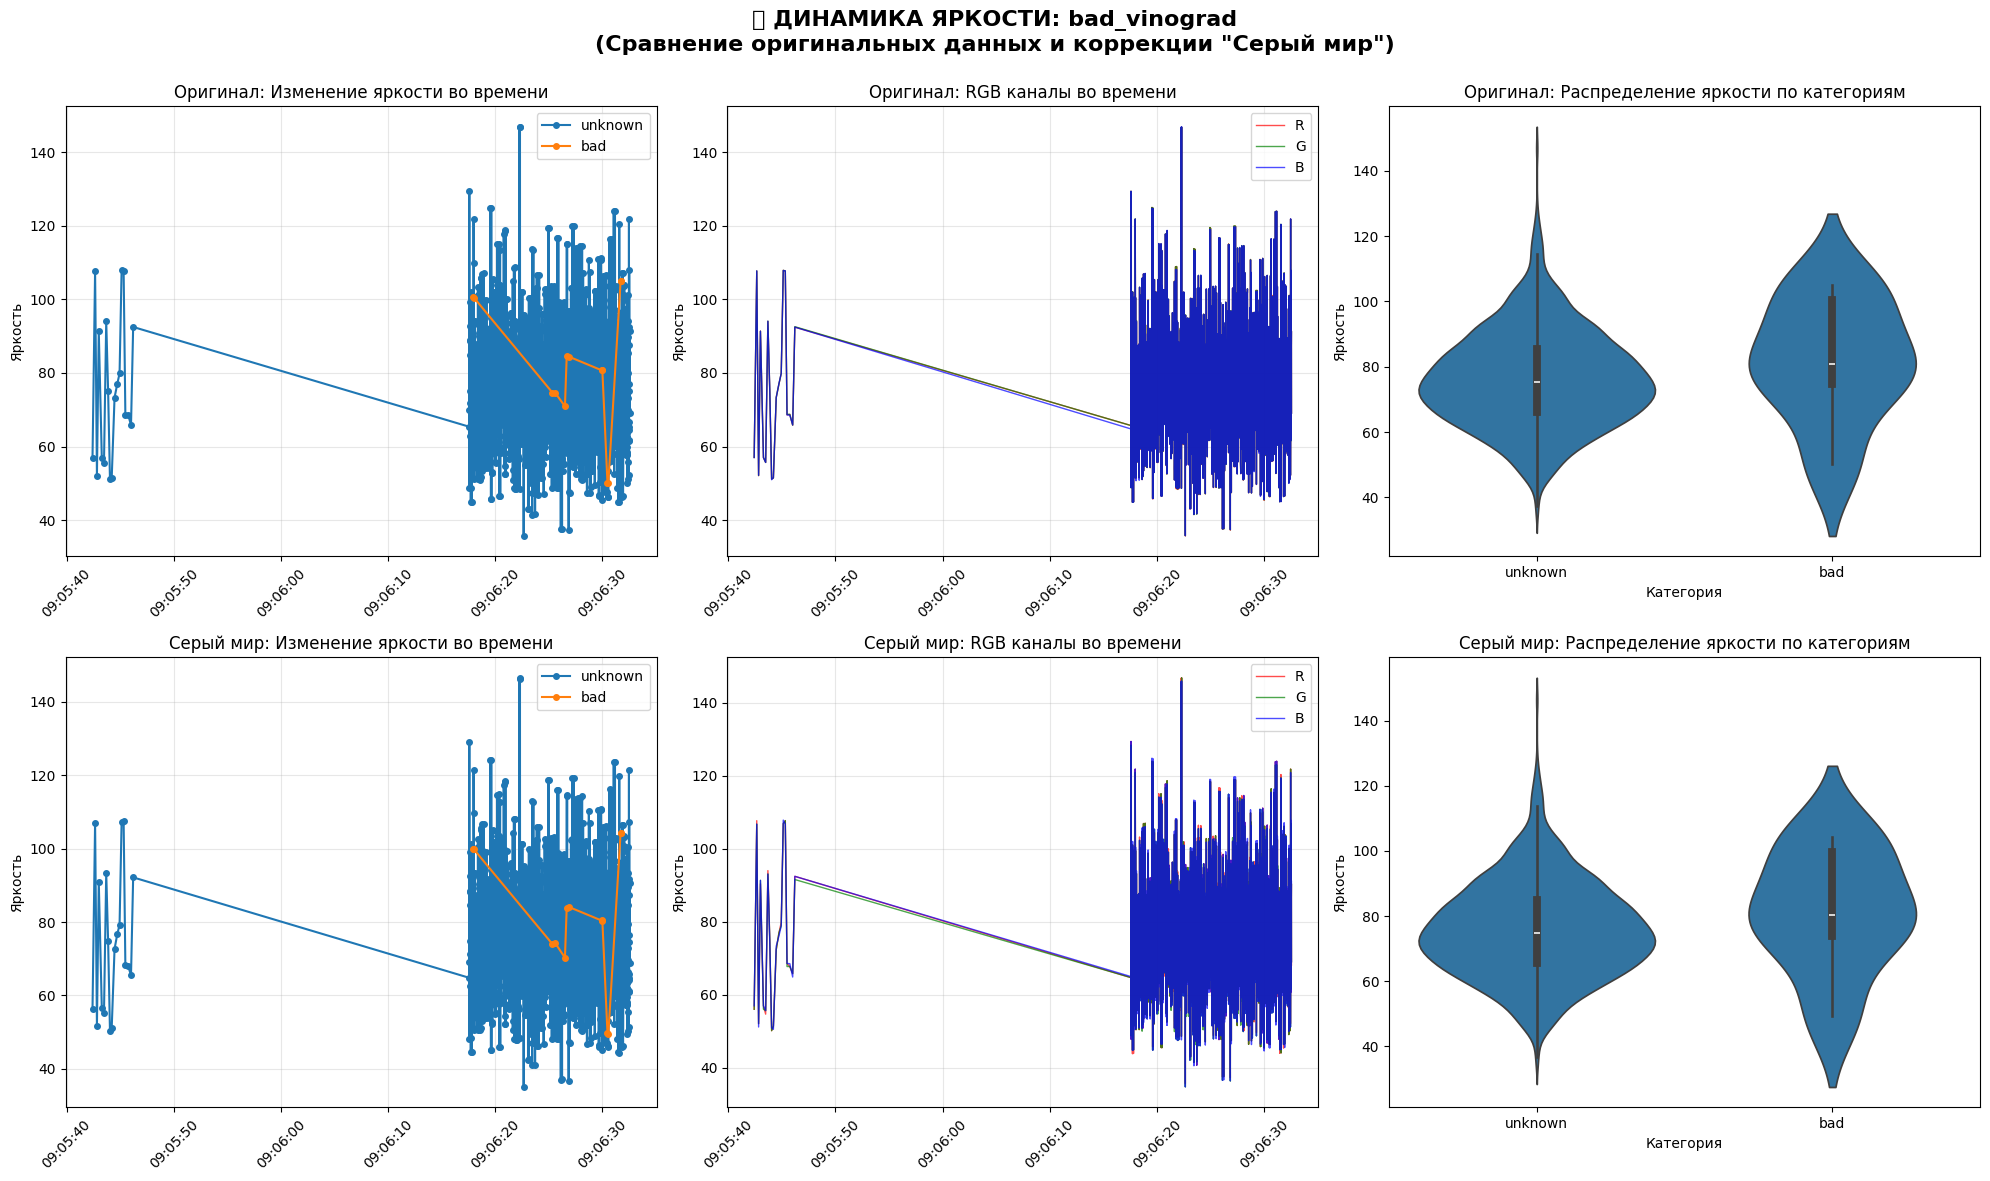

/tmp/ipython-input-2051787455.py:306: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


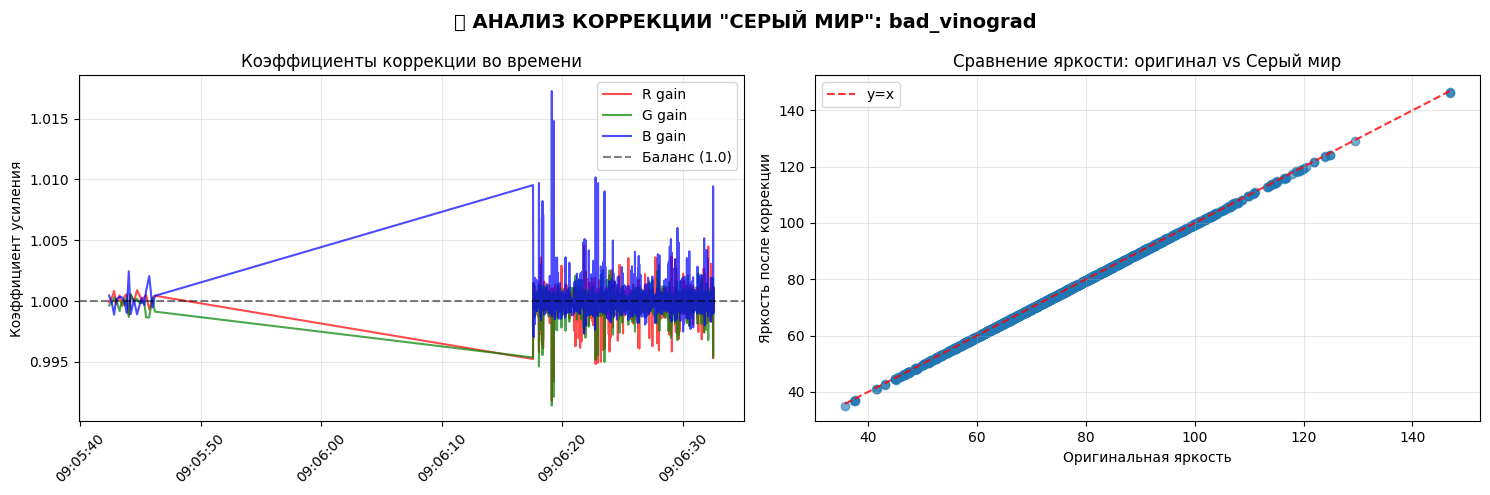


2️⃣  Анализирую папку с ХОРОШИМ виноградом...
🔍 Анализирую 1692 изображений...
   📊 Обработано 10/1692
   📊 Обработано 20/1692
   📊 Обработано 30/1692
   📊 Обработано 40/1692
   📊 Обработано 50/1692
   📊 Обработано 60/1692
   📊 Обработано 70/1692
   📊 Обработано 80/1692
   📊 Обработано 90/1692
   📊 Обработано 100/1692
   📊 Обработано 110/1692
   📊 Обработано 120/1692
   📊 Обработано 130/1692
   📊 Обработано 140/1692
   📊 Обработано 150/1692
   📊 Обработано 160/1692
   📊 Обработано 170/1692
   📊 Обработано 180/1692
   📊 Обработано 190/1692
   📊 Обработано 200/1692
   📊 Обработано 210/1692
   📊 Обработано 220/1692
   📊 Обработано 230/1692
   📊 Обработано 240/1692
   📊 Обработано 250/1692
   📊 Обработано 260/1692
   📊 Обработано 270/1692
   📊 Обработано 280/1692
   📊 Обработано 290/1692
   📊 Обработано 300/1692
   📊 Обработано 310/1692
   📊 Обработано 320/1692
   📊 Обработано 330/1692
   📊 Обработано 340/1692
   📊 Обработано 350/1692
   📊 Обработано 360/1692
   📊 Обработано 370/1692
   📊

/tmp/ipython-input-2051787455.py:275: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


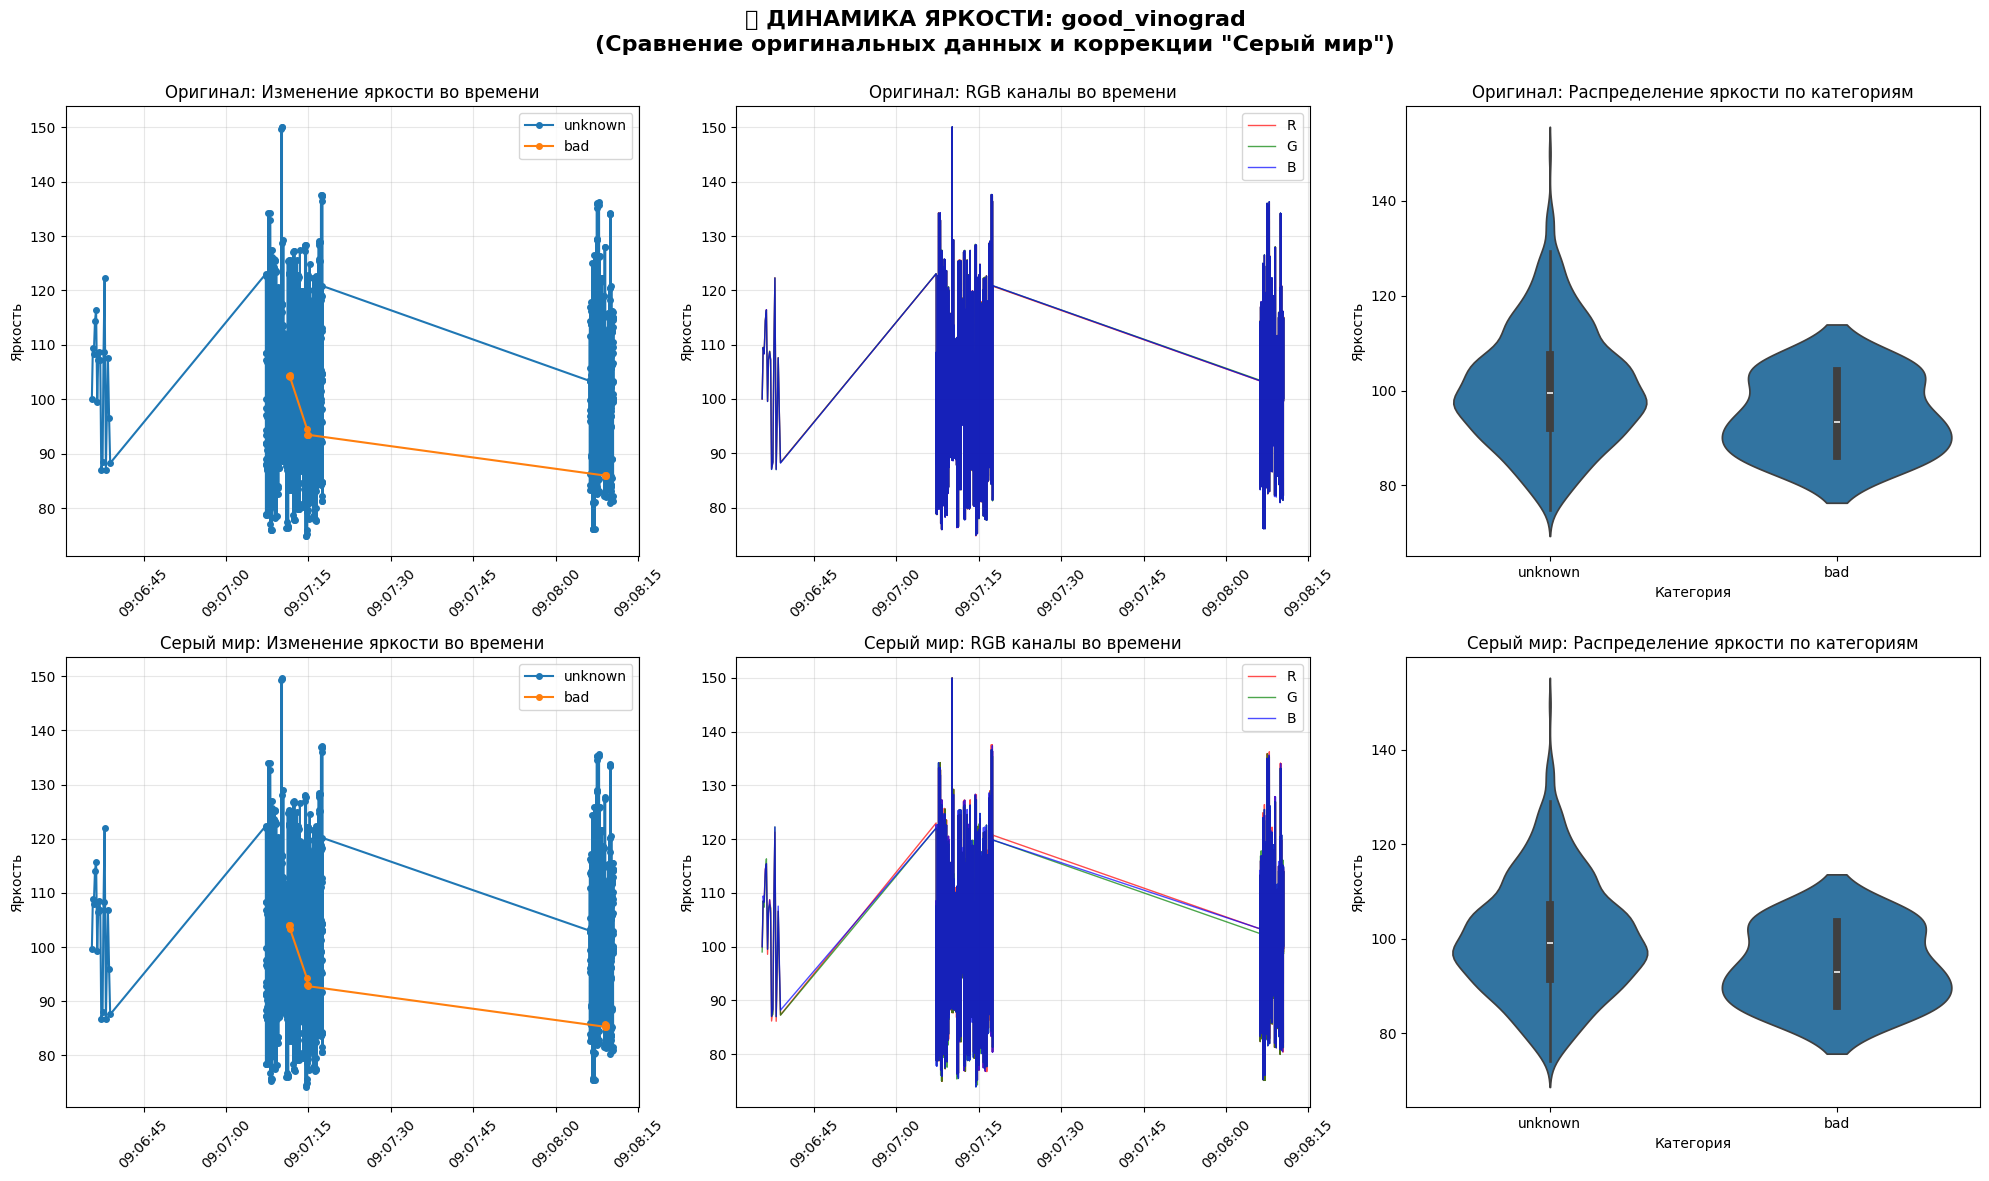

/tmp/ipython-input-2051787455.py:306: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


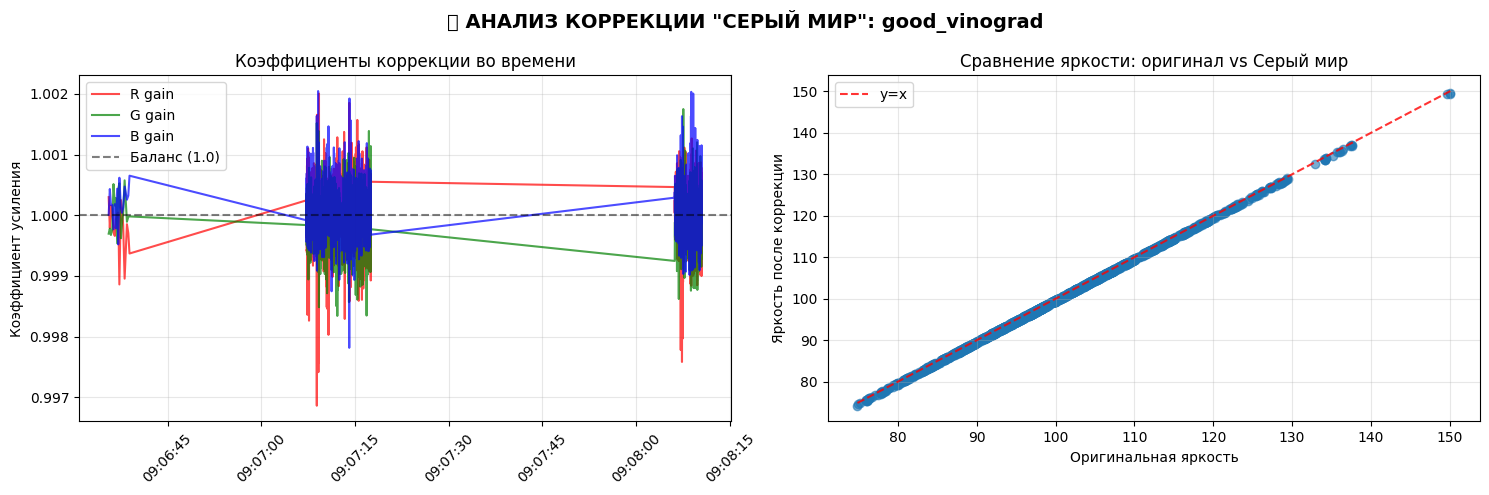


📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
📈 Средняя яркость (оригинал):
   bad_vinograd: 76.40
   good_vinograd: 100.54
   Разница: 24.14

📈 Средняя яркость (Серый мир):
   bad_vinograd: 75.89
   good_vinograd: 100.04
   Разница: 24.15


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def gray_world_correction(image):
    """
    Применяет алгоритм коррекции 'Серый мир' к изображению
    """
    # Конвертируем в float для точных вычислений
    img_float = image.astype(np.float32)

    # Вычисляем средние значения по каналам
    r_mean = np.mean(img_float[:, :, 0])
    g_mean = np.mean(img_float[:, :, 1])
    b_mean = np.mean(img_float[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    avg_mean = (r_mean + g_mean + b_mean) / 3.0

    # Вычисляем коэффициенты коррекции
    r_gain = avg_mean / r_mean if r_mean > 0 else 1.0
    g_gain = avg_mean / g_mean if g_mean > 0 else 1.0
    b_gain = avg_mean / b_mean if b_mean > 0 else 1.0

    # Применяем коррекцию к каждому каналу
    img_corrected = img_float.copy()
    img_corrected[:, :, 0] = img_corrected[:, :, 0] * r_gain
    img_corrected[:, :, 1] = img_corrected[:, :, 1] * g_gain
    img_corrected[:, :, 2] = img_corrected[:, :, 2] * b_gain

    # Ограничиваем значения до [0, 255] и конвертируем обратно в uint8
    img_corrected = np.clip(img_corrected, 0, 255).astype(np.uint8)

    return img_corrected, (r_gain, g_gain, b_gain)

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f"⚠️ Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Применяем коррекцию "Серый мир"
    img_gray_world, correction_gains = gray_world_correction(img_rgb)

    # Вычисляем статистику по оригинальному изображению
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])
    overall_mean_orig = (r_mean_orig + g_mean_orig + b_mean_orig) / 3

    # Вычисляем статистику по изображению после коррекции "Серый мир"
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])
    overall_mean_gw = (r_mean_gw + g_mean_gw + b_mean_gw) / 3

    # Яркость в grayscale (оригинал и после коррекции)
    img_gray_orig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_gw = cv2.cvtColor(img_gray_world, cv2.COLOR_RGB2GRAY)

    gray_mean_orig = np.mean(img_gray_orig)
    gray_mean_gw = np.mean(img_gray_gw)

    # Контрастность
    contrast_orig = np.std(img_gray_orig)
    contrast_gw = np.std(img_gray_gw)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,

        # Оригинальные значения
        'brightness_r_orig': r_mean_orig,
        'brightness_g_orig': g_mean_orig,
        'brightness_b_orig': b_mean_orig,
        'brightness_overall_orig': overall_mean_orig,
        'brightness_gray_orig': gray_mean_orig,
        'contrast_orig': contrast_orig,

        # Значения после коррекции "Серый мир"
        'brightness_r_gw': r_mean_gw,
        'brightness_g_gw': g_mean_gw,
        'brightness_b_gw': b_mean_gw,
        'brightness_overall_gw': overall_mean_gw,
        'brightness_gray_gw': gray_mean_gw,
        'contrast_gw': contrast_gw,

        # Коэффициенты коррекции
        'correction_gain_r': correction_gains[0],
        'correction_gain_g': correction_gains[1],
        'correction_gain_b': correction_gains[2],

        # Метаданные
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    print(f"🔍 Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis(df, folder_name):
    """
    Строит графики временного анализа для оригинальных и скорректированных данных
    """
    if df is None or len(df) == 0:
        return

    # Создаем большую фигуру с двумя рядами графиков
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'📈 ДИНАМИКА ЯРКОСТИ: {folder_name}\n(Сравнение оригинальных данных и коррекции "Серый мир")\n',
                 fontsize=16, fontweight='bold')

    # РЯД 1: Оригинальные данные
    # График 1: Яркость во времени (оригинал)
    ax1 = axes[0, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax1.plot(category_data['timestamp'], category_data['brightness_overall_orig'],
                'o-', label=category, markersize=4)
    ax1.set_title('Оригинал: Изменение яркости во времени')
    ax1.set_ylabel('Яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени (оригинал)
    ax2 = axes[0, 1]
    ax2.plot(df['timestamp'], df['brightness_r_orig'], 'r-', label='R', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_g_orig'], 'g-', label='G', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_b_orig'], 'b-', label='B', alpha=0.7, linewidth=1)
    ax2.set_title('Оригинал: RGB каналы во времени')
    ax2.set_ylabel('Яркость')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Распределение яркости по категориям (оригинал)
    ax3 = axes[0, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_orig', data=df, ax=ax3)
        ax3.set_title('Оригинал: Распределение яркости по категориям')
        ax3.set_xlabel('Категория')
        ax3.set_ylabel('Яркость')

    # РЯД 2: Данные после коррекции "Серый мир"
    # График 4: Яркость во времени (Серый мир)
    ax4 = axes[1, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax4.plot(category_data['timestamp'], category_data['brightness_overall_gw'],
                'o-', label=category, markersize=4)
    ax4.set_title('Серый мир: Изменение яркости во времени')
    ax4.set_ylabel('Яркость')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

    # График 5: RGB каналы во времени (Серый мир)
    ax5 = axes[1, 1]
    ax5.plot(df['timestamp'], df['brightness_r_gw'], 'r-', label='R', alpha=0.7, linewidth=1)
    ax5.plot(df['timestamp'], df['brightness_g_gw'], 'g-', label='G', alpha=0.7, linewidth=1)
    ax5.plot(df['timestamp'], df['brightness_b_gw'], 'b-', label='B', alpha=0.7, linewidth=1)
    ax5.set_title('Серый мир: RGB каналы во времени')
    ax5.set_ylabel('Яркость')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

    # График 6: Распределение яркости по категориям (Серый мир)
    ax6 = axes[1, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_gw', data=df, ax=ax6)
        ax6.set_title('Серый мир: Распределение яркости по категориям')
        ax6.set_xlabel('Категория')
        ax6.set_ylabel('Яркость')

    plt.tight_layout()
    plt.show()

    # Дополнительные графики: сравнение коэффициентов коррекции
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
    fig2.suptitle(f'📊 АНАЛИЗ КОРРЕКЦИИ "СЕРЫЙ МИР": {folder_name}', fontsize=14, fontweight='bold')

    # График коэффициентов коррекции во времени
    ax7 = axes2[0]
    ax7.plot(df['timestamp'], df['correction_gain_r'], 'r-', label='R gain', alpha=0.7)
    ax7.plot(df['timestamp'], df['correction_gain_g'], 'g-', label='G gain', alpha=0.7)
    ax7.plot(df['timestamp'], df['correction_gain_b'], 'b-', label='B gain', alpha=0.7)
    ax7.axhline(y=1.0, color='k', linestyle='--', alpha=0.5, label='Баланс (1.0)')
    ax7.set_title('Коэффициенты коррекции во времени')
    ax7.set_ylabel('Коэффициент усиления')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

    # График сравнения оригинальной и скорректированной яркости
    ax8 = axes2[1]
    ax8.scatter(df['brightness_overall_orig'], df['brightness_overall_gw'], alpha=0.6)
    ax8.plot([df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             [df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             'r--', alpha=0.8, label='y=x')
    ax8.set_title('Сравнение яркости: оригинал vs Серый мир')
    ax8.set_xlabel('Оригинальная яркость')
    ax8.set_ylabel('Яркость после коррекции')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику для оригинальных и скорректированных данных
    """
    if df is None or len(df) == 0:
        return

    print(f"\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА: {folder_name}")
    print("=" * 80)
    print(f"📅 Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"⏱️  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f"📈 Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n📋 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n🎯 СТАТИСТИКА ЯРКОСТИ (ОРИГИНАЛ):")
    print(f"   📊 Средняя яркость: {df['brightness_overall_orig'].mean():.2f}")
    print(f"   📏 Стандартное отклонение: {df['brightness_overall_orig'].std():.2f}")
    print(f"   🔴 Средний R: {df['brightness_r_orig'].mean():.2f}")
    print(f"   🟢 Средний G: {df['brightness_g_orig'].mean():.2f}")
    print(f"   🔵 Средний B: {df['brightness_b_orig'].mean():.2f}")

    print(f"\n🎯 СТАТИСТИКА ЯРКОСТИ (СЕРЫЙ МИР):")
    print(f"   📊 Средняя яркость: {df['brightness_overall_gw'].mean():.2f}")
    print(f"   📏 Стандартное отклонение: {df['brightness_overall_gw'].std():.2f}")
    print(f"   🔴 Средний R: {df['brightness_r_gw'].mean():.2f}")
    print(f"   🟢 Средний G: {df['brightness_g_gw'].mean():.2f}")
    print(f"   🔵 Средний B: {df['brightness_b_gw'].mean():.2f}")

    print(f"\n⚖️  СТАТИСТИКА КОРРЕКЦИИ:")
    print(f"   🔴 Средний коэффициент R: {df['correction_gain_r'].mean():.3f}")
    print(f"   🟢 Средний коэффициент G: {df['correction_gain_g'].mean():.3f}")
    print(f"   🔵 Средний коэффициент B: {df['correction_gain_b'].mean():.3f}")

    # Анализ трендов
    if len(df) > 1:
        time_corr_orig = df['brightness_overall_orig'].corr(df['time_delta'])
        time_corr_gw = df['brightness_overall_gw'].corr(df['time_delta'])

        trend_orig = "↗️ Возрастает" if time_corr_orig > 0.1 else "↘️ Убывает" if time_corr_orig < -0.1 else "➡️ Стабильна"
        trend_gw = "↗️ Возрастает" if time_corr_gw > 0.1 else "↘️ Убывает" if time_corr_gw < -0.1 else "➡️ Стабильна"

        print(f"\n📶 ТРЕНД ЯРКОСТИ:")
        print(f"   Оригинал: {trend_orig} (корреляция: {time_corr_orig:.3f})")
        print(f"   Серый мир: {trend_gw} (корреляция: {time_corr_gw:.3f})")

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ⭐⭐⭐

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/Original Data/train_corrected/BlackRot_corrected"
    FOLDER2 = "/content/drive/MyDrive/Original Data/train_corrected/Healthy_corrected"

    print("🎯 АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'")
    print("=" * 80)

    # Анализируем обе папки
    print("\n1️⃣  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        plot_timeline_analysis(df1, "bad_vinograd")

    print("\n2️⃣  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        plot_timeline_analysis(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*80)
        print("📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
        print("="*80)

        print(f"📈 Средняя яркость (оригинал):")
        print(f"   bad_vinograd: {df1['brightness_overall_orig'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_orig'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_orig'].mean() - df2['brightness_overall_orig'].mean()):.2f}")

        print(f"\n📈 Средняя яркость (Серый мир):")
        print(f"   bad_vinograd: {df1['brightness_overall_gw'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_gw'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_gw'].mean() - df2['brightness_overall_gw'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()

Mounted at /content/drive
🎯 АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'

🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:


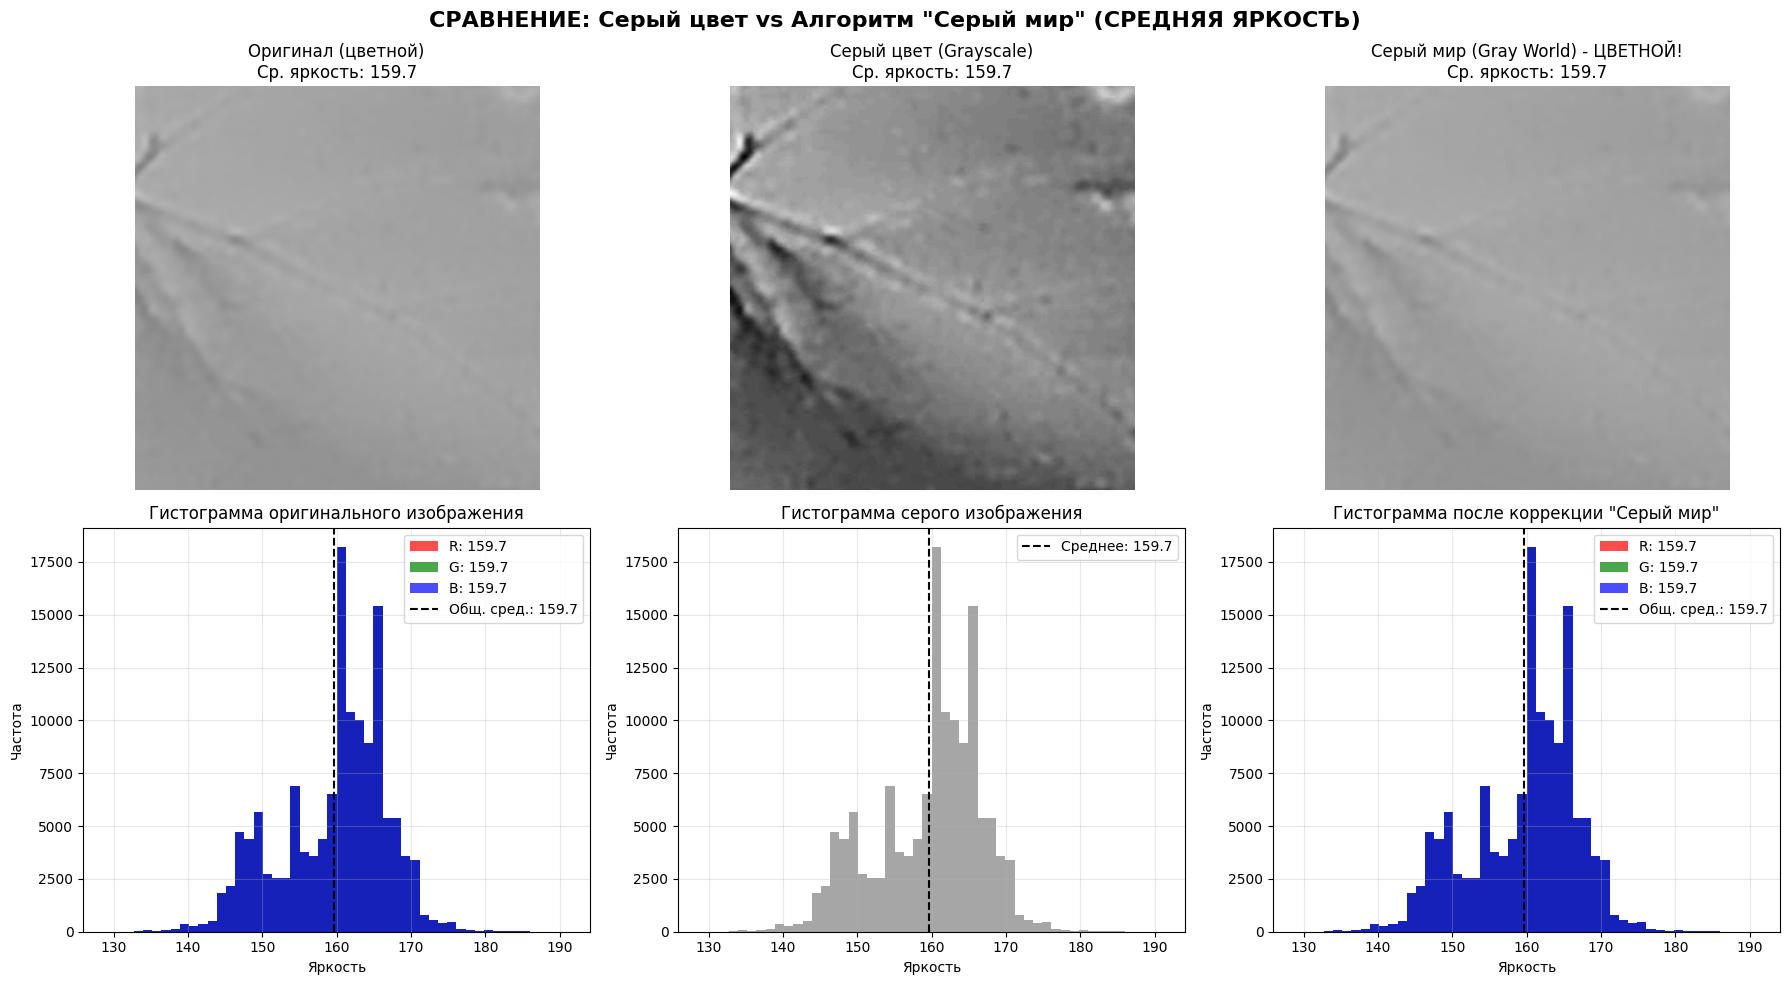

📊 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:
   Оригинал (цветной): 159.7
   Серый цвет: 159.7
   Серый мир (цветной): 159.7

⚖️  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:
   Красный канал (R): ×1.000
   Зеленый канал (G): ×1.000
   Синий канал (B): ×1.000

🎯 АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:
   ОРИГИНАЛ:
     R/G: 1.000, R/B: 1.000, G/B: 1.000
   СЕРЫЙ МИР:
     R/G: 1.000, R/B: 1.000, G/B: 1.000
   ✅ Изображение уже хорошо сбалансировано

1️⃣  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 945 изображений...
   📊 Обработано 10/945
   📊 Обработано 20/945
   📊 Обработано 30/945
   📊 Обработано 40/945
   📊 Обработано 50/945
   📊 Обработано 60/945
   📊 Обработано 70/945
   📊 Обработано 80/945
   📊 Обработано 90/945
   📊 Обработано 100/945
   📊 Обработано 110/945
   📊 Обработано 120/945
   📊 Обработано 130/945
   📊 Обработано 140/945
   📊 Обработано 150/945
   📊 Обработано 160/945
   📊 Обработано 170/945
   📊 Обработано 180/945
   📊 Обработано 190/945
   📊 Обработано 200/945
   📊 Обработано 210/945
   📊 Обработано 220/945


/tmp/ipython-input-4065600017.py:381: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


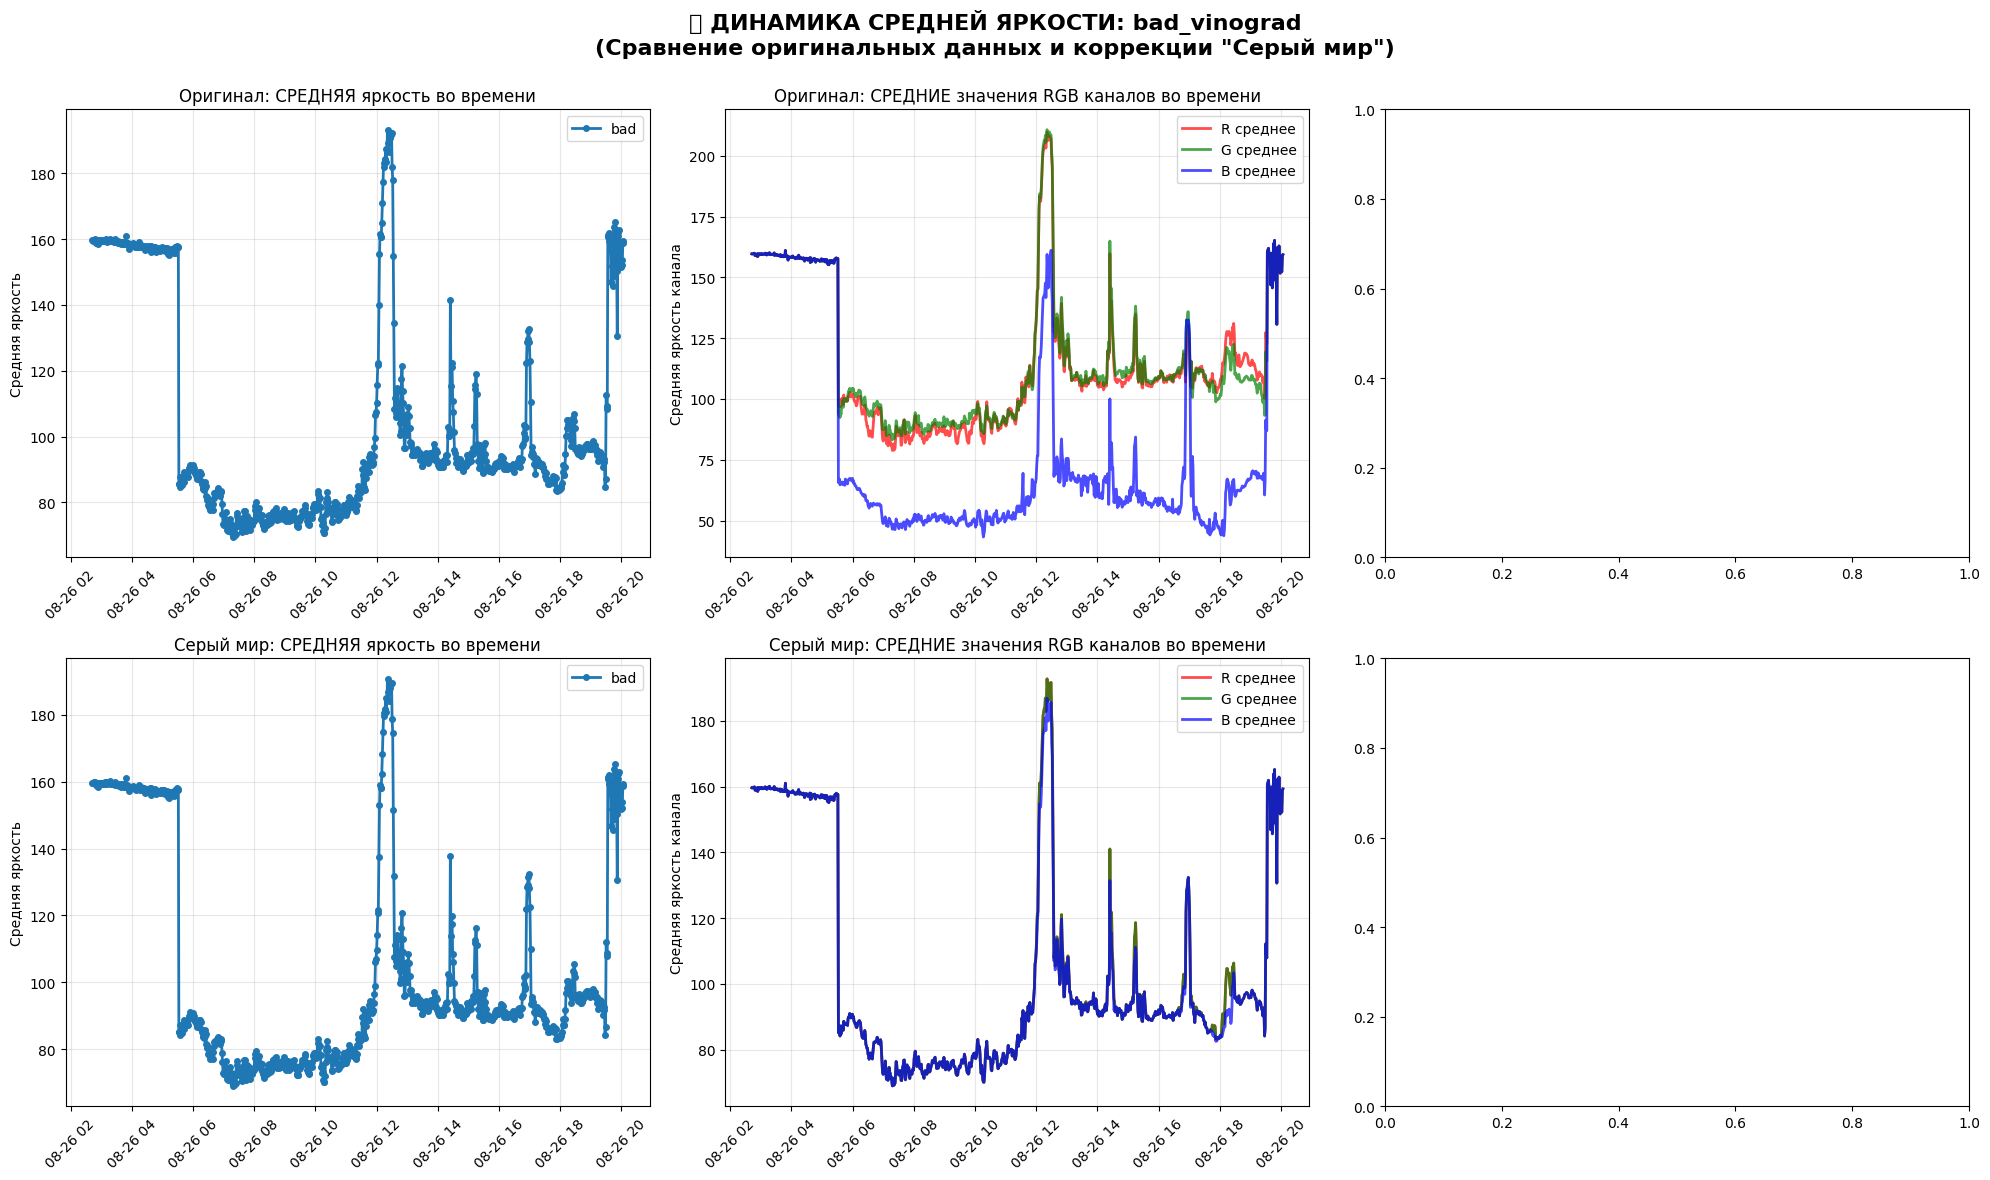

/tmp/ipython-input-4065600017.py:412: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


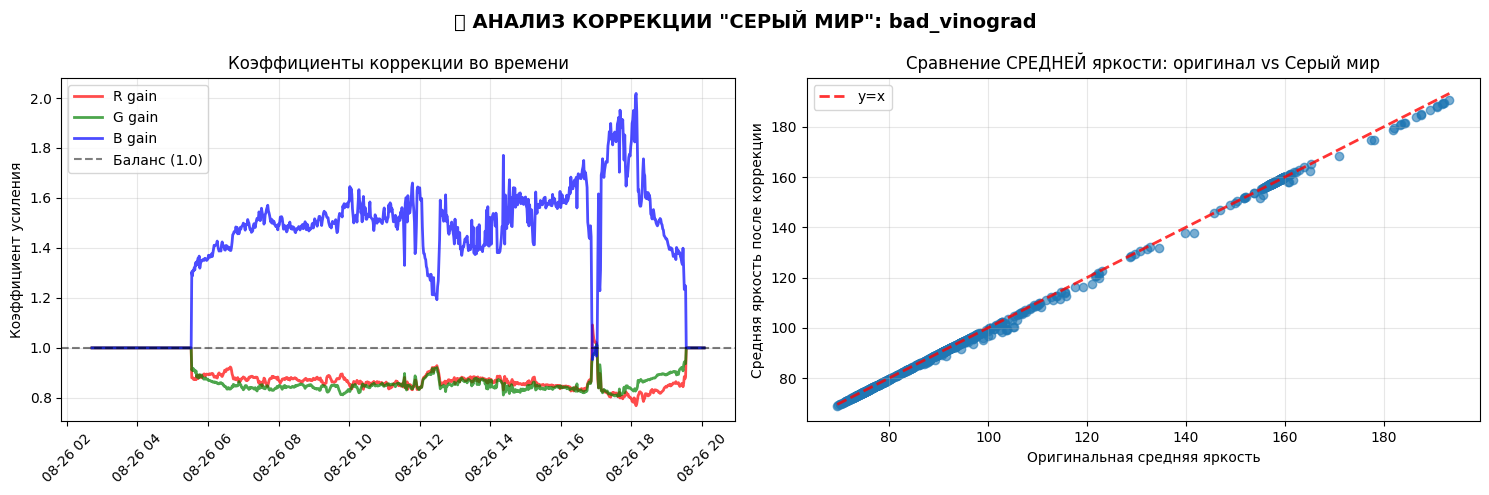


2️⃣  Анализирую папку с ХОРОШИМ виноградом...
🔍 Анализирую 945 изображений...
   📊 Обработано 10/945
   📊 Обработано 20/945
   📊 Обработано 30/945
   📊 Обработано 40/945
   📊 Обработано 50/945
   📊 Обработано 60/945
   📊 Обработано 70/945
   📊 Обработано 80/945
   📊 Обработано 90/945
   📊 Обработано 100/945
   📊 Обработано 110/945
   📊 Обработано 120/945
   📊 Обработано 130/945
   📊 Обработано 140/945
   📊 Обработано 150/945
   📊 Обработано 160/945
   📊 Обработано 170/945
   📊 Обработано 180/945
   📊 Обработано 190/945
   📊 Обработано 200/945
   📊 Обработано 210/945
   📊 Обработано 220/945
   📊 Обработано 230/945
   📊 Обработано 240/945
   📊 Обработано 250/945
   📊 Обработано 260/945
   📊 Обработано 270/945
   📊 Обработано 280/945
   📊 Обработано 290/945
   📊 Обработано 300/945
   📊 Обработано 310/945
   📊 Обработано 320/945
   📊 Обработано 330/945
   📊 Обработано 340/945
   📊 Обработано 350/945
   📊 Обработано 360/945
   📊 Обработано 370/945
   📊 Обработано 380/945
   📊 Обработано 39

/tmp/ipython-input-4065600017.py:381: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


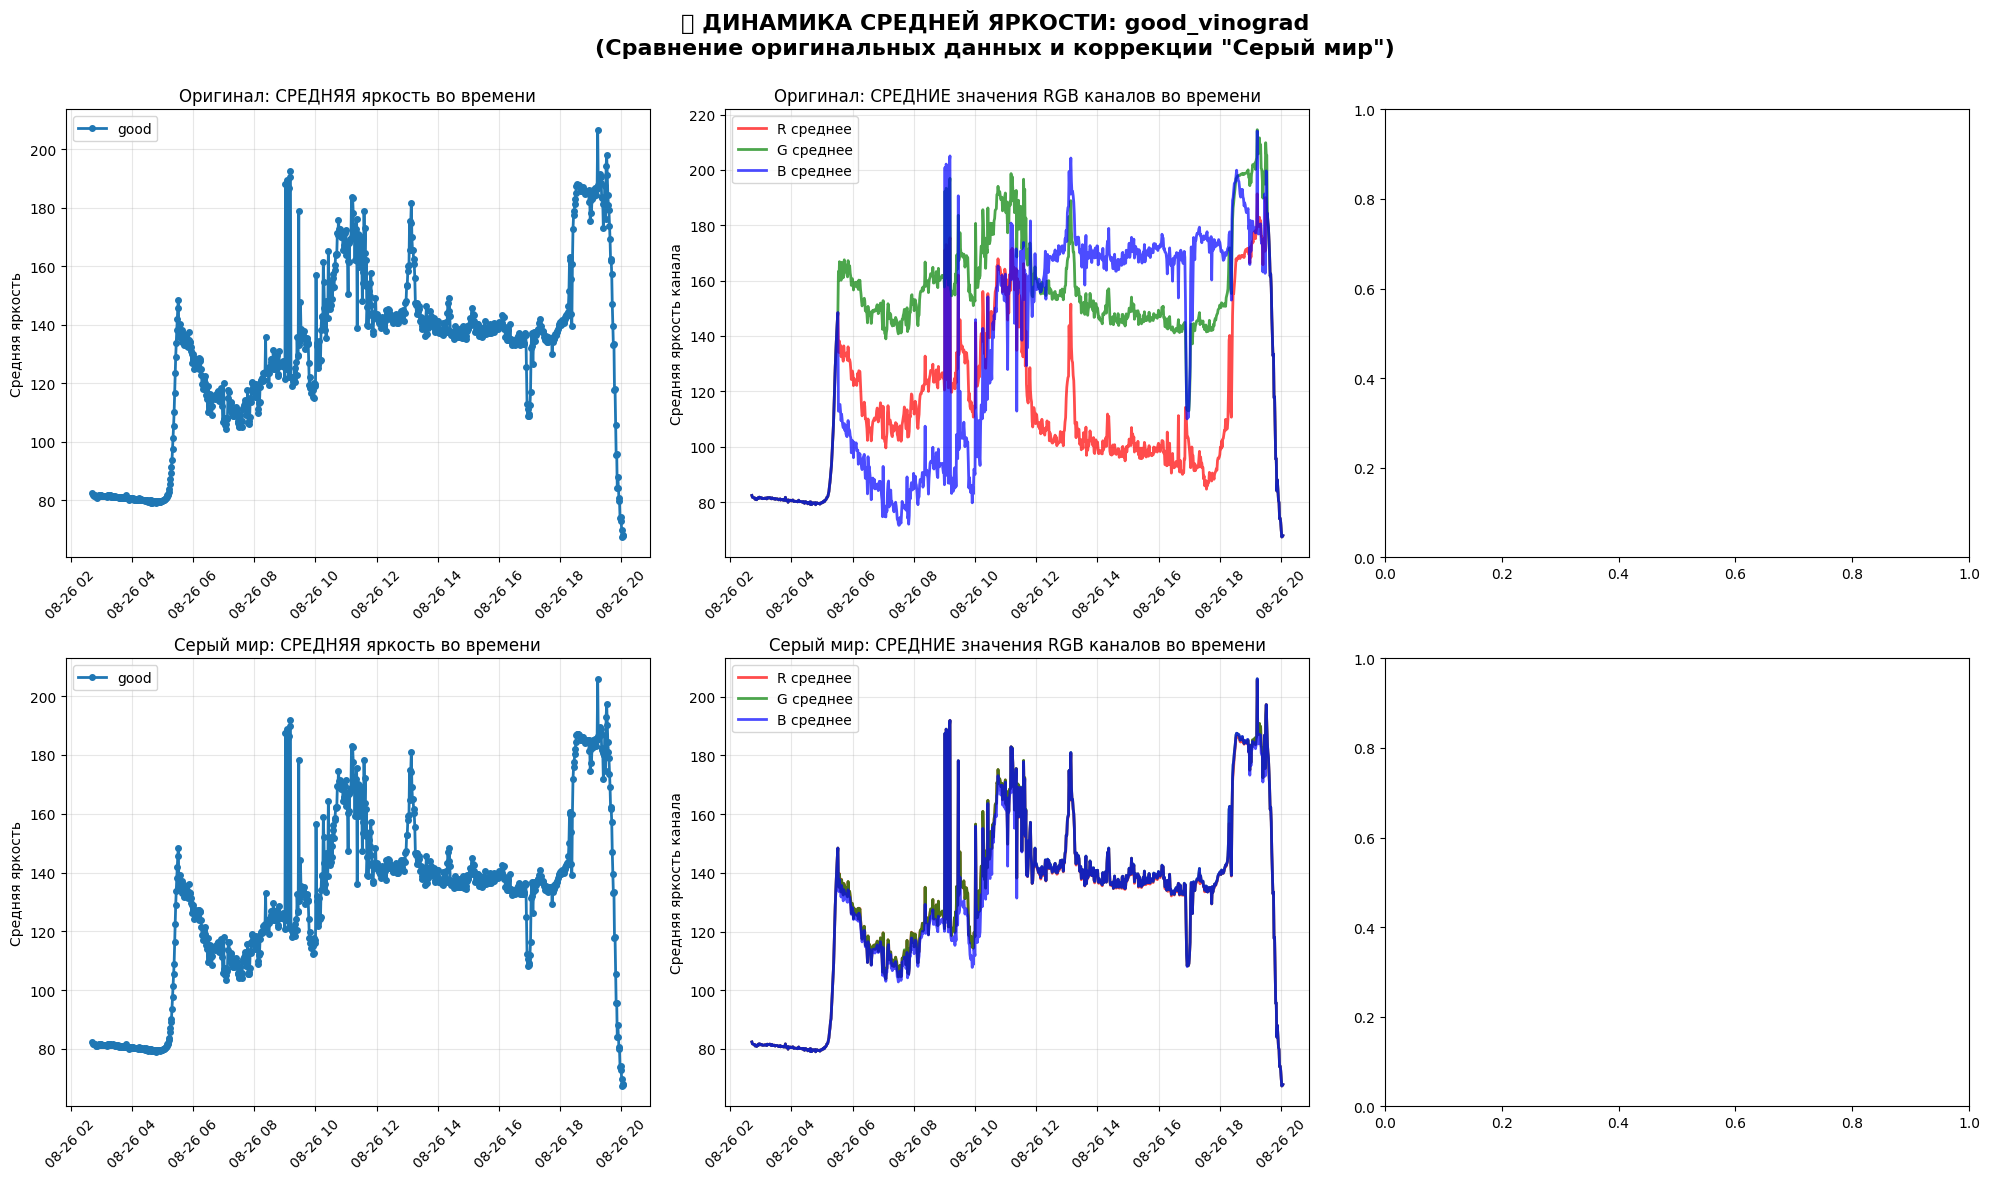

/tmp/ipython-input-4065600017.py:412: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


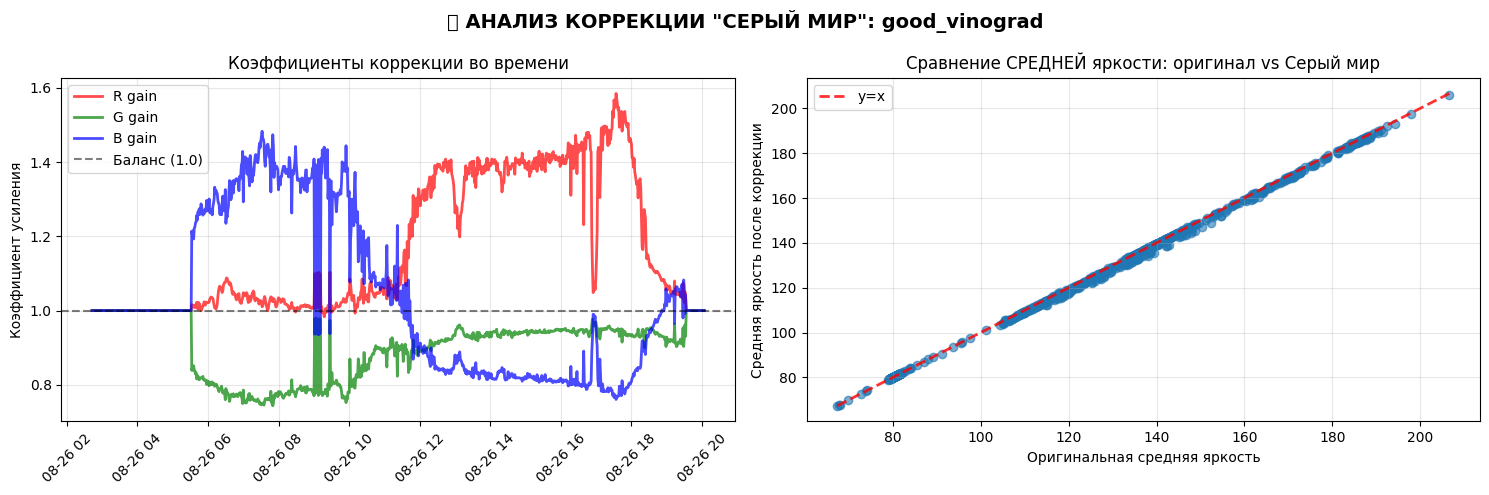


📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):
📈 Средняя яркость (оригинал):
   bad_vinograd: 104.34
   good_vinograd: 130.22
   Разница: 25.88

📈 Средняя яркость (Серый мир):
   bad_vinograd: 103.77
   good_vinograd: 129.43
   Разница: 25.65


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def gray_world_correction(image):
    """
    Применяет алгоритм коррекции 'Серый мир' к изображению
    """
    # Конвертируем в float для точных вычислений
    img_float = image.astype(np.float32)

    # Вычисляем средние значения по каналам
    r_mean = np.mean(img_float[:, :, 0])
    g_mean = np.mean(img_float[:, :, 1])
    b_mean = np.mean(img_float[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    avg_mean = (r_mean + g_mean + b_mean) / 3.0

    # Вычисляем коэффициенты коррекции
    r_gain = avg_mean / r_mean if r_mean > 0 else 1.0
    g_gain = avg_mean / g_mean if g_mean > 0 else 1.0
    b_gain = avg_mean / b_mean if b_mean > 0 else 1.0

    # Применяем коррекцию к каждому каналу
    img_corrected = img_float.copy()
    img_corrected[:, :, 0] = img_corrected[:, :, 0] * r_gain
    img_corrected[:, :, 1] = img_corrected[:, :, 1] * g_gain
    img_corrected[:, :, 2] = img_corrected[:, :, 2] * b_gain

    # Ограничиваем значения до [0, 255] и конвертируем обратно в uint8
    img_corrected = np.clip(img_corrected, 0, 255).astype(np.uint8)

    return img_corrected, (r_gain, g_gain, b_gain)

def demonstrate_gray_world(image_path):
    """
    Наглядно демонстрирует разницу между серым цветом и алгоритмом серый мир
    с акцентом на СРЕДНЮЮ яркость
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Не удалось загрузить изображение: {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем среднюю яркость оригинального изображения
    orig_brightness = np.mean(img_rgb)
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])

    # Серый цвет (grayscale) - вычисляем среднюю яркость
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_brightness = np.mean(img_gray)

    # Серый мир (color correction) - вычисляем среднюю яркость после коррекции
    img_gray_world, gains = gray_world_correction(img_rgb)
    gw_brightness = np.mean(img_gray_world)
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])

    # Визуализация
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('СРАВНЕНИЕ: Серый цвет vs Алгоритм "Серый мир" (СРЕДНЯЯ ЯРКОСТЬ)',
                 fontsize=16, fontweight='bold')

    # Оригинал
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title(f'Оригинал (цветной)\nСр. яркость: {orig_brightness:.1f}')
    axes[0, 0].axis('off')

    # Гистограмма оригинального изображения
    axes[1, 0].hist(img_rgb[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_orig:.1f}')
    axes[1, 0].axvline(orig_brightness, color='black', linestyle='--', label=f'Общ. сред.: {orig_brightness:.1f}')
    axes[1, 0].set_xlabel('Яркость')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].legend()
    axes[1, 0].set_title('Гистограмма оригинального изображения')
    axes[1, 0].grid(True, alpha=0.3)

    # Серый цвет
    axes[0, 1].imshow(img_gray, cmap='gray')
    axes[0, 1].set_title(f'Серый цвет (Grayscale)\nСр. яркость: {gray_brightness:.1f}')
    axes[0, 1].axis('off')

    # Гистограмма серого изображения
    axes[1, 1].hist(img_gray.flatten(), bins=50, alpha=0.7, color='gray')
    axes[1, 1].axvline(gray_brightness, color='black', linestyle='--', label=f'Среднее: {gray_brightness:.1f}')
    axes[1, 1].set_xlabel('Яркость')
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].legend()
    axes[1, 1].set_title('Гистограмма серого изображения')
    axes[1, 1].grid(True, alpha=0.3)

    # Серый мир
    axes[0, 2].imshow(img_gray_world)
    axes[0, 2].set_title(f'Серый мир (Gray World) - ЦВЕТНОЙ!\nСр. яркость: {gw_brightness:.1f}')
    axes[0, 2].axis('off')

    # Гистограмма после коррекции "Серый мир"
    axes[1, 2].hist(img_gray_world[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_gw:.1f}')
    axes[1, 2].axvline(gw_brightness, color='black', linestyle='--', label=f'Общ. сред.: {gw_brightness:.1f}')
    axes[1, 2].set_xlabel('Яркость')
    axes[1, 2].set_ylabel('Частота')
    axes[1, 2].legend()
    axes[1, 2].set_title('Гистограмма после коррекции "Серый мир"')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📊 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:")
    print(f"   Оригинал (цветной): {orig_brightness:.1f}")
    print(f"   Серый цвет: {gray_brightness:.1f}")
    print(f"   Серый мир (цветной): {gw_brightness:.1f}")

    print("\n⚖️  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:")
    print(f"   Красный канал (R): ×{gains[0]:.3f}")
    print(f"   Зеленый канал (G): ×{gains[1]:.3f}")
    print(f"   Синий канал (B): ×{gains[2]:.3f}")

    # Анализ баланса
    print("\n🎯 АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:")
    print("   ОРИГИНАЛ:")
    print(f"     R/G: {r_mean_orig/g_mean_orig:.3f}, R/B: {r_mean_orig/b_mean_orig:.3f}, G/B: {g_mean_orig/b_mean_orig:.3f}")
    print("   СЕРЫЙ МИР:")
    print(f"     R/G: {r_mean_gw/g_mean_gw:.3f}, R/B: {r_mean_gw/b_mean_gw:.3f}, G/B: {g_mean_gw/b_mean_gw:.3f}")

    if abs(gains[0]-1) < 0.1 and abs(gains[1]-1) < 0.1 and abs(gains[2]-1) < 0.1:
        print("   ✅ Изображение уже хорошо сбалансировано")
    else:
        print("   🔄 Была применена значительная цветовая коррекция")

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f"⚠️ Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Применяем коррекцию "Серый мир"
    img_gray_world, correction_gains = gray_world_correction(img_rgb)

    # Вычисляем СРЕДНЮЮ яркость оригинального изображения
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])
    overall_mean_orig = (r_mean_orig + g_mean_orig + b_mean_orig) / 3

    # Вычисляем СРЕДНЮЮ яркость после коррекции "Серый мир"
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])
    overall_mean_gw = (r_mean_gw + g_mean_gw + b_mean_gw) / 3

    # СРЕДНЯЯ яркость в grayscale (оригинал и после коррекции)
    img_gray_orig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_gw = cv2.cvtColor(img_gray_world, cv2.COLOR_RGB2GRAY)

    gray_mean_orig = np.mean(img_gray_orig)
    gray_mean_gw = np.mean(img_gray_gw)

    # Контрастность (стандартное отклонение)
    contrast_orig = np.std(img_gray_orig)
    contrast_gw = np.std(img_gray_gw)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,

        # Оригинальные значения (СРЕДНЯЯ яркость)
        'brightness_r_orig': r_mean_orig,
        'brightness_g_orig': g_mean_orig,
        'brightness_b_orig': b_mean_orig,
        'brightness_overall_orig': overall_mean_orig,
        'brightness_gray_orig': gray_mean_orig,
        'contrast_orig': contrast_orig,

        # Значения после коррекции "Серый мир" (СРЕДНЯЯ яркость)
        'brightness_r_gw': r_mean_gw,
        'brightness_g_gw': g_mean_gw,
        'brightness_b_gw': b_mean_gw,
        'brightness_overall_gw': overall_mean_gw,
        'brightness_gray_gw': gray_mean_gw,
        'contrast_gw': contrast_gw,

        # Коэффициенты коррекции
        'correction_gain_r': correction_gains[0],
        'correction_gain_g': correction_gains[1],
        'correction_gain_b': correction_gains[2],

        # Метаданные
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    print(f"🔍 Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"   📊 Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis(df, folder_name):
    """
    Строит графики временного анализа для оригинальных и скорректированных данных
    с акцентом на СРЕДНЮЮ яркость
    """
    if df is None or len(df) == 0:
        return

    # Создаем большую фигуру с двумя рядами графиков
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'📈 ДИНАМИКА СРЕДНЕЙ ЯРКОСТИ: {folder_name}\n(Сравнение оригинальных данных и коррекции "Серый мир")\n',
                 fontsize=16, fontweight='bold')

    # РЯД 1: Оригинальные данные (СРЕДНЯЯ яркость)
    # График 1: СРЕДНЯЯ яркость во времени (оригинал)
    ax1 = axes[0, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax1.plot(category_data['timestamp'], category_data['brightness_overall_orig'],
                'o-', label=category, markersize=4, linewidth=2)
    ax1.set_title('Оригинал: СРЕДНЯЯ яркость во времени')
    ax1.set_ylabel('Средняя яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени (оригинал) - СРЕДНИЕ значения
    ax2 = axes[0, 1]
    ax2.plot(df['timestamp'], df['brightness_r_orig'], 'r-', label='R среднее', alpha=0.7, linewidth=2)
    ax2.plot(df['timestamp'], df['brightness_g_orig'], 'g-', label='G среднее', alpha=0.7, linewidth=2)
    ax2.plot(df['timestamp'], df['brightness_b_orig'], 'b-', label='B среднее', alpha=0.7, linewidth=2)
    ax2.set_title('Оригинал: СРЕДНИЕ значения RGB каналов во времени')
    ax2.set_ylabel('Средняя яркость канала')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Распределение СРЕДНЕЙ яркости по категориям (оригинал)
    ax3 = axes[0, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_orig', data=df, ax=ax3)
        ax3.set_title('Оригинал: Распределение СРЕДНЕЙ яркости по категориям')
        ax3.set_xlabel('Категория')
        ax3.set_ylabel('Средняя яркость')

    # РЯД 2: Данные после коррекции "Серый мир" (СРЕДНЯЯ яркость)
    # График 4: СРЕДНЯЯ яркость во времени (Серый мир)
    ax4 = axes[1, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax4.plot(category_data['timestamp'], category_data['brightness_overall_gw'],
                'o-', label=category, markersize=4, linewidth=2)
    ax4.set_title('Серый мир: СРЕДНЯЯ яркость во времени')
    ax4.set_ylabel('Средняя яркость')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

    # График 5: RGB каналы во времени (Серый мир) - СРЕДНИЕ значения
    ax5 = axes[1, 1]
    ax5.plot(df['timestamp'], df['brightness_r_gw'], 'r-', label='R среднее', alpha=0.7, linewidth=2)
    ax5.plot(df['timestamp'], df['brightness_g_gw'], 'g-', label='G среднее', alpha=0.7, linewidth=2)
    ax5.plot(df['timestamp'], df['brightness_b_gw'], 'b-', label='B среднее', alpha=0.7, linewidth=2)
    ax5.set_title('Серый мир: СРЕДНИЕ значения RGB каналов во времени')
    ax5.set_ylabel('Средняя яркость канала')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

    # График 6: Распределение СРЕДНЕЙ яркости по категориям (Серый мир)
    ax6 = axes[1, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_gw', data=df, ax=ax6)
        ax6.set_title('Серый мир: Распределение СРЕДНЕЙ яркости по категориям')
        ax6.set_xlabel('Категория')
        ax6.set_ylabel('Средняя яркость')

    plt.tight_layout()
    plt.show()

    # Дополнительные графики: сравнение коэффициентов коррекции
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
    fig2.suptitle(f'📊 АНАЛИЗ КОРРЕКЦИИ "СЕРЫЙ МИР": {folder_name}', fontsize=14, fontweight='bold')

    # График коэффициентов коррекции во времени
    ax7 = axes2[0]
    ax7.plot(df['timestamp'], df['correction_gain_r'], 'r-', label='R gain', alpha=0.7, linewidth=2)
    ax7.plot(df['timestamp'], df['correction_gain_g'], 'g-', label='G gain', alpha=0.7, linewidth=2)
    ax7.plot(df['timestamp'], df['correction_gain_b'], 'b-', label='B gain', alpha=0.7, linewidth=2)
    ax7.axhline(y=1.0, color='k', linestyle='--', alpha=0.5, label='Баланс (1.0)')
    ax7.set_title('Коэффициенты коррекции во времени')
    ax7.set_ylabel('Коэффициент усиления')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

    # График сравнения СРЕДНЕЙ яркости до и после коррекции
    ax8 = axes2[1]
    ax8.scatter(df['brightness_overall_orig'], df['brightness_overall_gw'], alpha=0.6)
    ax8.plot([df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             [df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             'r--', alpha=0.8, linewidth=2, label='y=x')
    ax8.set_title('Сравнение СРЕДНЕЙ яркости: оригинал vs Серый мир')
    ax8.set_xlabel('Оригинальная средняя яркость')
    ax8.set_ylabel('Средняя яркость после коррекции')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику для оригинальных и скорректированных данных
    с акцентом на СРЕДНЮЮ яркость
    """
    if df is None or len(df) == 0:
        return

    print(f"\n📊 ДЕТАЛЬНАЯ СТАТИСТИКА (СРЕДНЯЯ ЯРКОСТЬ): {folder_name}")
    print("=" * 80)
    print(f"📅 Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"⏱️  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f"📈 Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n📋 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n🎯 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (ОРИГИНАЛ):")
    print(f"   📊 Общая средняя яркость: {df['brightness_overall_orig'].mean():.2f}")
    print(f"   📏 Стандартное отклонение: {df['brightness_overall_orig'].std():.2f}")
    print(f"   🔴 Средний R: {df['brightness_r_orig'].mean():.2f}")
    print(f"   🟢 Средний G: {df['brightness_g_orig'].mean():.2f}")
    print(f"   🔵 Средний B: {df['brightness_b_orig'].mean():.2f}")

    print(f"\n🎯 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (СЕРЫЙ МИР):")
    print(f"   📊 Общая средняя яркость: {df['brightness_overall_gw'].mean():.2f}")
    print(f"   📏 Стандартное отклонение: {df['brightness_overall_gw'].std():.2f}")
    print(f"   🔴 Средний R: {df['brightness_r_gw'].mean():.2f}")
    print(f"   🟢 Средний G: {df['brightness_g_gw'].mean():.2f}")
    print(f"   🔵 Средний B: {df['brightness_b_gw'].mean():.2f}")

    print(f"\n⚖️  СТАТИСТИКА КОРРЕКЦИИ:")
    print(f"   🔴 Средний коэффициент R: {df['correction_gain_r'].mean():.3f}")
    print(f"   🟢 Средний коэффициент G: {df['correction_gain_g'].mean():.3f}")
    print(f"   🔵 Средний коэффициент B: {df['correction_gain_b'].mean():.3f}")

    # Анализ трендов СРЕДНЕЙ яркости
    if len(df) > 1:
        time_corr_orig = df['brightness_overall_orig'].corr(df['time_delta'])
        time_corr_gw = df['brightness_overall_gw'].corr(df['time_delta'])

        trend_orig = "↗️ Возрастает" if time_corr_orig > 0.1 else "↘️ Убывает" if time_corr_orig < -0.1 else "➡️ Стабильна"
        trend_gw = "↗️ Возрастает" if time_corr_gw > 0.1 else "↘️ Убывает" if time_corr_gw < -0.1 else "➡️ Стабильна"

        print(f"\n📶 ТРЕНД СРЕДНЕЙ ЯРКОСТИ:")
        print(f"   Оригинал: {trend_orig} (корреляция: {time_corr_orig:.3f})")
        print(f"   Серый мир: {trend_gw} (корреляция: {time_corr_gw:.3f})")

# ⭐⭐⭐ ОСНОВНОЙ СКРИПТ ⭐⭐⭐

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd"

    print("🎯 АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'")
    print("=" * 80)

    # Демонстрация на примере одного изображения
    print("\n🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:")
    print("=" * 50)

    # Найдем первое изображение для демонстрации
    test_image = None
    for folder in [FOLDER1, FOLDER2]:
        if os.path.exists(folder):
            images = glob.glob(os.path.join(folder, "*.jpg")) + glob.glob(os.path.join(folder, "*.png"))
            if images:
                test_image = images[0]
                break

    if test_image:
        demonstrate_gray_world(test_image)
    else:
        print("❌ Не найдено изображений для демонстрации")

    # Анализируем обе папки
    print("\n1️⃣  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        plot_timeline_analysis(df1, "bad_vinograd")

    print("\n2️⃣  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        plot_timeline_analysis(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*80)
        print("📊 СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):")
        print("="*80)

        print(f"📈 Средняя яркость (оригинал):")
        print(f"   bad_vinograd: {df1['brightness_overall_orig'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_orig'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_orig'].mean() - df2['brightness_overall_orig'].mean()):.2f}")

        print(f"\n📈 Средняя яркость (Серый мир):")
        print(f"   bad_vinograd: {df1['brightness_overall_gw'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_gw'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_gw'].mean() - df2['brightness_overall_gw'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()